# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:47:38.271605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:47:41.387661
2025-04-14 23:47:41.387661


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:47:35"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

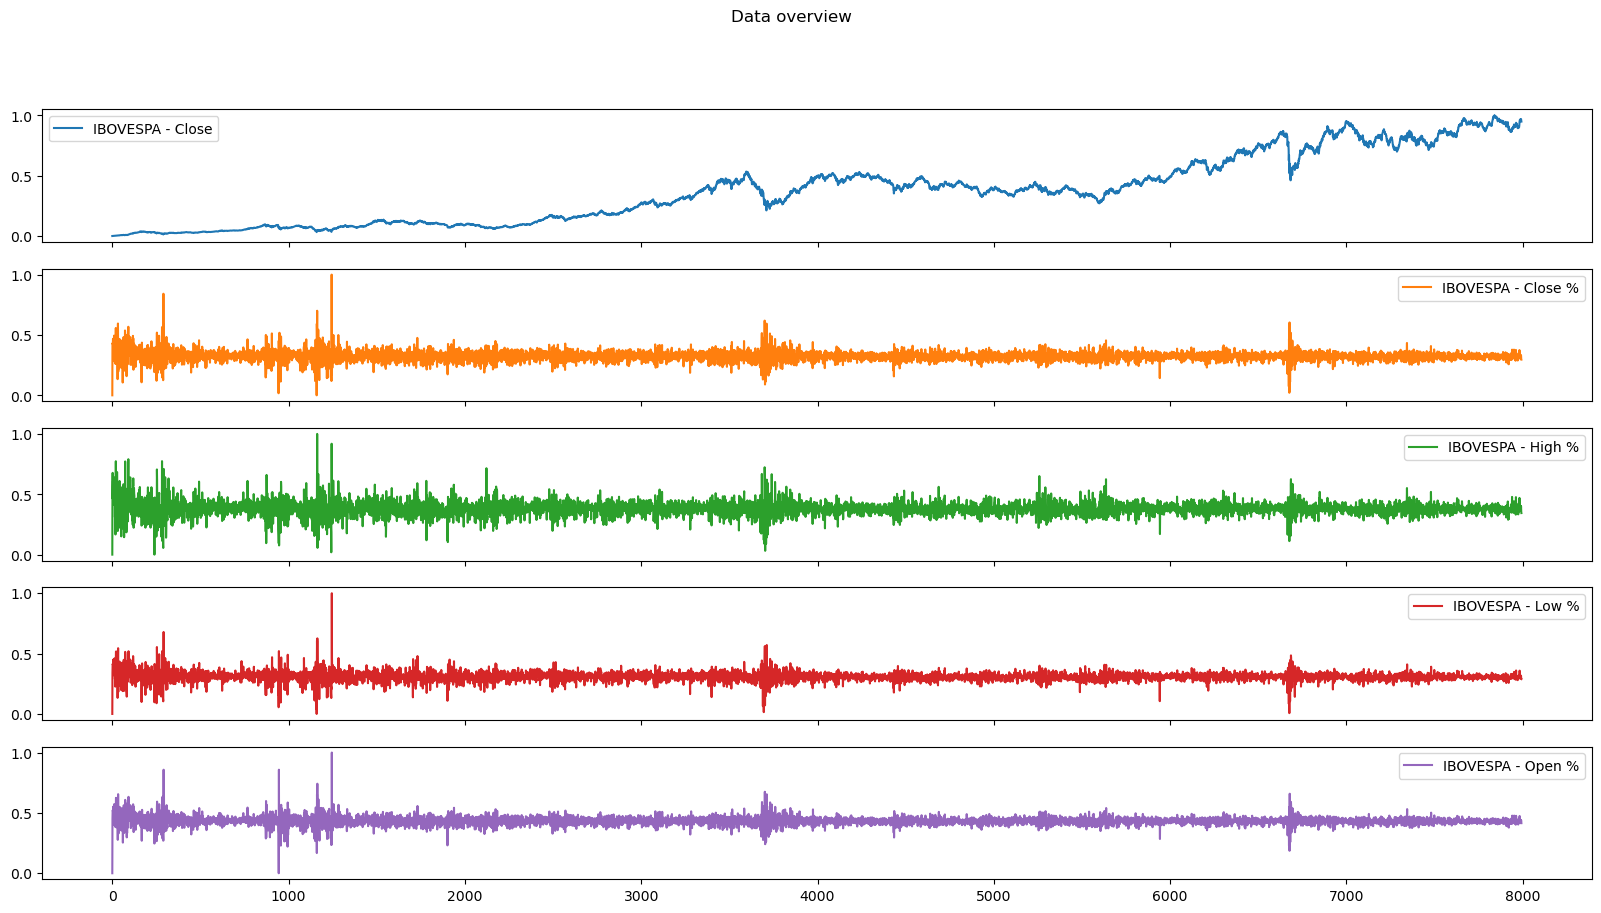

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

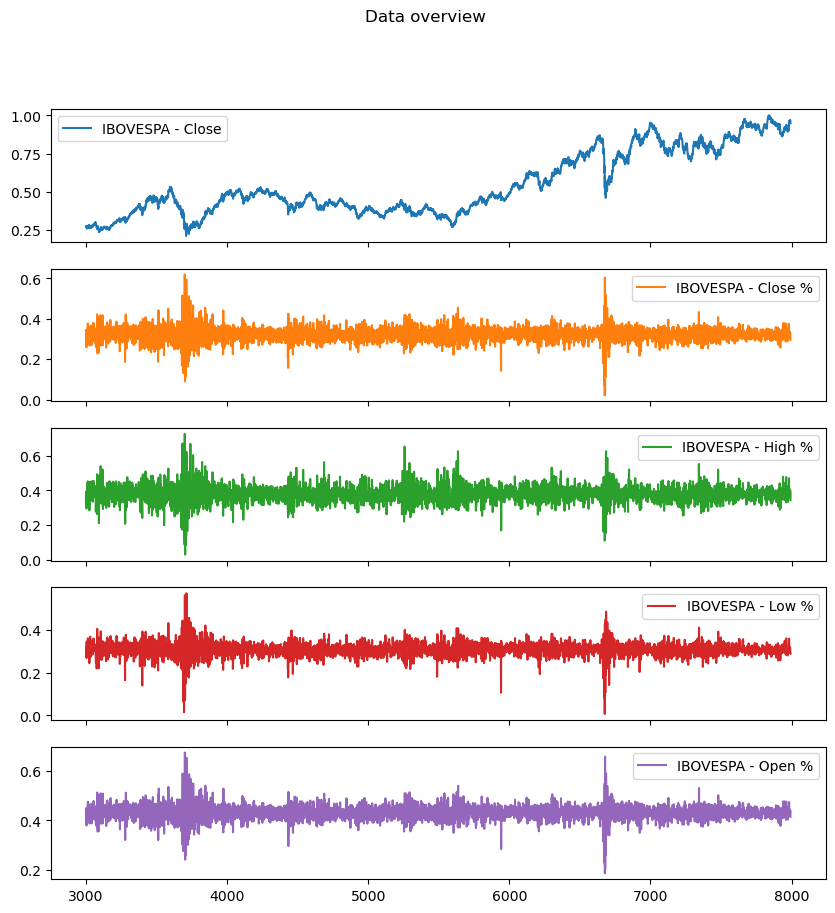

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

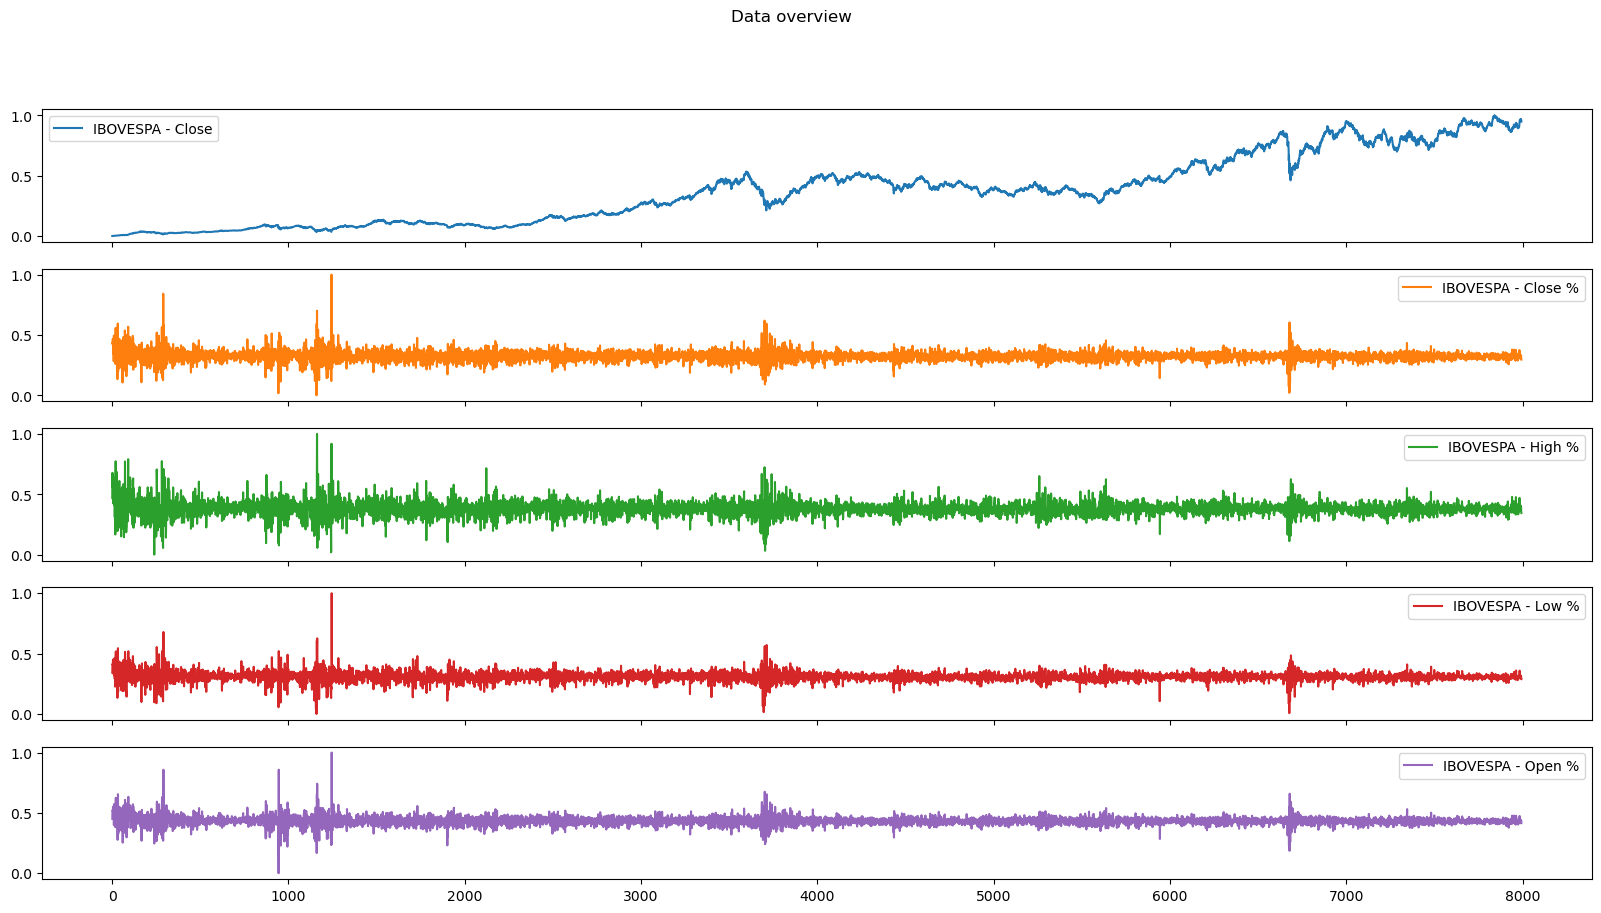

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

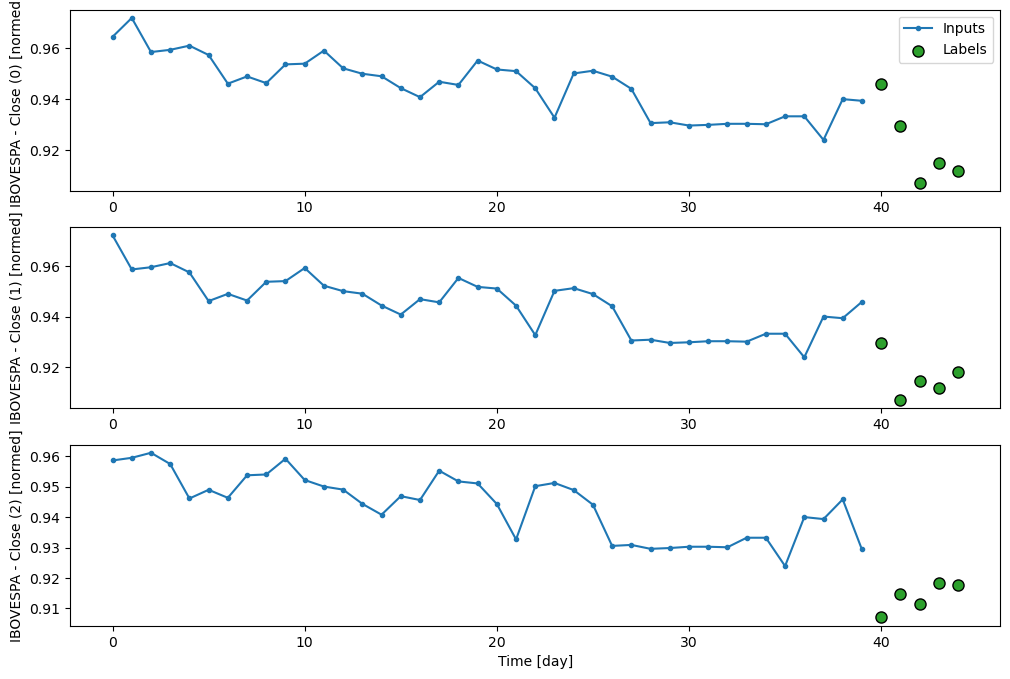

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:00 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 187.9529 - mean_squared_error: 7.4410e-04 - root_mean_squared_error: 0.0244

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 161.2648 - mean_squared_error: 7.0529e-04 - root_mean_squared_error: 0.0251

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 149.4680 - mean_squared_error: 6.8370e-04 - root_mean_squared_error: 0.0250

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 139.0055 - mean_squared_error: 6.4809e-04 - root_mean_squared_error: 0.0245

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 130.2928 - mean_squared_error: 6.1264e-04 - root_mean_squared_error: 0.0239

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 122.8139 - mean_squared_error: 5.7962e-04 - root_mean_squared_error: 0.0233

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 116.2338 - mean_squared_error: 5.4940e-04 - root_mean_squared_error: 0.0227

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 110.3563 - mean_squared_error: 5.2183e-04 - root_mean_squared_error: 0.0221

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 102.6733 - mean_squared_error: 4.8531e-04 - root_mean_squared_error: 0.0213

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 98.2091 - mean_squared_error: 4.6403e-04 - root_mean_squared_error: 0.0208 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 94.2320 - mean_squared_error: 4.4544e-04 - root_mean_squared_error: 0.0203

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 89.0186 - mean_squared_error: 4.2325e-04 - root_mean_squared_error: 0.0198

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 86.0452 - mean_squared_error: 4.1318e-04 - root_mean_squared_error: 0.0196

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 83.3700 - mean_squared_error: 4.0522e-04 - root_mean_squared_error: 0.0194

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 80.9546 - mean_squared_error: 3.9916e-04 - root_mean_squared_error: 0.0193

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.8124 - mean_squared_error: 3.9467e-04 - root_mean_squared_error: 0.0192

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.9090 - mean_squared_error: 3.9149e-04 - root_mean_squared_error: 0.0192

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.1495 - mean_squared_error: 3.8862e-04 - root_mean_squared_error: 0.0191

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.7691 - mean_squared_error: 3.8598e-04 - root_mean_squared_error: 0.0191

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.3082 - mean_squared_error: 3.8452e-04 - root_mean_squared_error: 0.0191

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.3028 - mean_squared_error: 3.8652e-04 - root_mean_squared_error: 0.0192

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.1026 - mean_squared_error: 3.9276e-04 - root_mean_squared_error: 0.0193

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.9450 - mean_squared_error: 3.9784e-04 - root_mean_squared_error: 0.0195

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.2976 - mean_squared_error: 4.0405e-04 - root_mean_squared_error: 0.0196

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.2501 - mean_squared_error: 4.0724e-04 - root_mean_squared_error: 0.0197

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.2571 - mean_squared_error: 4.1011e-04 - root_mean_squared_error: 0.0198

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 62.3107 - mean_squared_error: 4.1263e-04 - root_mean_squared_error: 0.0199

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 61.3999 - mean_squared_error: 4.1462e-04 - root_mean_squared_error: 0.0199

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 60.5235 - mean_squared_error: 4.1615e-04 - root_mean_squared_error: 0.0200

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 59.6953 - mean_squared_error: 4.1751e-04 - root_mean_squared_error: 0.0200

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 58.9009 - mean_squared_error: 4.1855e-04 - root_mean_squared_error: 0.0201

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 58.1359 - mean_squared_error: 4.1931e-04 - root_mean_squared_error: 0.0201

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 57.4067 - mean_squared_error: 4.2008e-04 - root_mean_squared_error: 0.0201

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 56.7114 - mean_squared_error: 4.2109e-04 - root_mean_squared_error: 0.0202

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 56.0514 - mean_squared_error: 4.2317e-04 - root_mean_squared_error: 0.0202

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 55.4176 - mean_squared_error: 4.2563e-04 - root_mean_squared_error: 0.0203

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 54.8024 - mean_squared_error: 4.2783e-04 - root_mean_squared_error: 0.0203

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 54.2020 - mean_squared_error: 4.2967e-04 - root_mean_squared_error: 0.0204

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 53.6167 - mean_squared_error: 4.3125e-04 - root_mean_squared_error: 0.0204

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 53.0470 - mean_squared_error: 4.3265e-04 - root_mean_squared_error: 0.0205

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 52.4937 - mean_squared_error: 4.3397e-04 - root_mean_squared_error: 0.0205

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 51.9554 - mean_squared_error: 4.3523e-04 - root_mean_squared_error: 0.0206

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 51.4351 - mean_squared_error: 4.3712e-04 - root_mean_squared_error: 0.0206

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 50.9316 - mean_squared_error: 4.3971e-04 - root_mean_squared_error: 0.0207

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 50.4440 - mean_squared_error: 4.4281e-04 - root_mean_squared_error: 0.0207

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 49.9711 - mean_squared_error: 4.4637e-04 - root_mean_squared_error: 0.0208

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 49.5103 - mean_squared_error: 4.5007e-04 - root_mean_squared_error: 0.0209

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 49.0632 - mean_squared_error: 4.5450e-04 - root_mean_squared_error: 0.0210

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 48.6298 - mean_squared_error: 4.6025e-04 - root_mean_squared_error: 0.0211

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 48.2054 - mean_squared_error: 4.6587e-04 - root_mean_squared_error: 0.0213

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 47.7915 - mean_squared_error: 4.7211e-04 - root_mean_squared_error: 0.0214

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 47.3872 - mean_squared_error: 4.7865e-04 - root_mean_squared_error: 0.0215

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 46.9929 - mean_squared_error: 4.8610e-04 - root_mean_squared_error: 0.0217

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 46.6106 - mean_squared_error: 4.9484e-04 - root_mean_squared_error: 0.0218

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 46.0697 - mean_squared_error: 5.1383e-04 - root_mean_squared_error: 0.0222

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 45.7209 - mean_squared_error: 5.2670e-04 - root_mean_squared_error: 0.0224

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 45.3834 - mean_squared_error: 5.4154e-04 - root_mean_squared_error: 0.0227

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 45.0596 - mean_squared_error: 5.6274e-04 - root_mean_squared_error: 0.0230

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 44.7491 - mean_squared_error: 5.9127e-04 - root_mean_squared_error: 0.0234

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 44.4494 - mean_squared_error: 6.2399e-04 - root_mean_squared_error: 0.0238

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 44.1570 - mean_squared_error: 6.5673e-04 - root_mean_squared_error: 0.0243

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 43.8697 - mean_squared_error: 6.8836e-04 - root_mean_squared_error: 0.0247

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 43.5887 - mean_squared_error: 7.1990e-04 - root_mean_squared_error: 0.0251

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 43.1789 - mean_squared_error: 7.6667e-04 - root_mean_squared_error: 0.0258

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 42.9124 - mean_squared_error: 7.9680e-04 - root_mean_squared_error: 0.0261

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 42.6500 - mean_squared_error: 8.2574e-04 - root_mean_squared_error: 0.0265

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 42.3938 - mean_squared_error: 8.5503e-04 - root_mean_squared_error: 0.0269

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 42.1424 - mean_squared_error: 8.8375e-04 - root_mean_squared_error: 0.0273

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 41.8943 - mean_squared_error: 9.1125e-04 - root_mean_squared_error: 0.0277

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 41.6494 - mean_squared_error: 9.3758e-04 - root_mean_squared_error: 0.0280

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 41.4081 - mean_squared_error: 9.6291e-04 - root_mean_squared_error: 0.0283

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 41.1713 - mean_squared_error: 9.8754e-04 - root_mean_squared_error: 0.0287

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 40.8234 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291    

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 40.5948 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 40.3691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 40.1474 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 39.9300 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 39.7153 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 39.5031 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 39.2934 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 39.0875 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 38.8860 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 38.6882 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 38.4929 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 38.3015 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 38.1141 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 37.9309 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 37.7509 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 37.5740 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 37.3999 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 37.1430 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 36.9757 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 36.8115 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 36.6492 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 36.4886 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 36.3299 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 36.1728 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 36.0172 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 35.8665 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 35.7198 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 35.5755 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 35.3625 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 35.2234 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 35.0867 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 34.8838 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 34.6835 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 34.5517 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 34.3559 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 34.1625 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 34.0352 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 33.9098 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394 - val_loss: 0.1002 - val_mean_absolute_error: 0.1002 - val_mean_absolute_percentage_error: 10.6418 - val_mean_squared_error: 0.0107 - val_root_mean_squared_error: 0.1037 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.7079 - mean_absolute_error: 0.7079 - mean_absolute_percentage_error: 9402.8691 - mean_squared_error: 0.5013 - root_mean_squared_error: 0.7080

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7100 - mean_absolute_error: 0.7100 - mean_absolute_percentage_error: 7864.2808 - mean_squared_error: 0.5043 - root_mean_squared_error: 0.7102 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7059 - mean_absolute_error: 0.7059 - mean_absolute_percentage_error: 6680.8301 - mean_squared_error: 0.4986 - root_mean_squared_error: 0.7061

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6993 - mean_absolute_error: 0.6993 - mean_absolute_percentage_error: 5922.1182 - mean_squared_error: 0.4896 - root_mean_squared_error: 0.6996

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6907 - mean_absolute_error: 0.6907 - mean_absolute_percentage_error: 5432.5996 - mean_squared_error: 0.4784 - root_mean_squared_error: 0.6914

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6799 - mean_absolute_error: 0.6799 - mean_absolute_percentage_error: 5064.2529 - mean_squared_error: 0.4649 - root_mean_squared_error: 0.6813

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6654 - mean_absolute_error: 0.6654 - mean_absolute_percentage_error: 4755.3398 - mean_squared_error: 0.4488 - root_mean_squared_error: 0.6688

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6740 - mean_absolute_error: 0.6740 - mean_absolute_percentage_error: 4578.2036 - mean_squared_error: 0.5030 - root_mean_squared_error: 0.7029

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6742 - mean_absolute_error: 0.6742 - mean_absolute_percentage_error: 4405.7168 - mean_squared_error: 0.5353 - root_mean_squared_error: 0.7240

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6681 - mean_absolute_error: 0.6681 - mean_absolute_percentage_error: 4237.6987 - mean_squared_error: 0.5521 - root_mean_squared_error: 0.7355

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6523 - mean_absolute_error: 0.6523 - mean_absolute_percentage_error: 4000.4497 - mean_squared_error: 0.5605 - root_mean_squared_error: 0.7420

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6395 - mean_absolute_error: 0.6395 - mean_absolute_percentage_error: 3853.8188 - mean_squared_error: 0.5595 - root_mean_squared_error: 0.7419

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6259 - mean_absolute_error: 0.6259 - mean_absolute_percentage_error: 3716.5356 - mean_squared_error: 0.5554 - root_mean_squared_error: 0.7395

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6051 - mean_absolute_error: 0.6051 - mean_absolute_percentage_error: 3527.4294 - mean_squared_error: 0.5456 - root_mean_squared_error: 0.7332

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 3356.9280 - mean_squared_error: 0.5334 - root_mean_squared_error: 0.7250

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5712 - mean_absolute_error: 0.5712 - mean_absolute_percentage_error: 3252.5381 - mean_squared_error: 0.5247 - root_mean_squared_error: 0.7188

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5583 - mean_absolute_error: 0.5583 - mean_absolute_percentage_error: 3154.9336 - mean_squared_error: 0.5157 - root_mean_squared_error: 0.7124

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5458 - mean_absolute_error: 0.5458 - mean_absolute_percentage_error: 3063.5371 - mean_squared_error: 0.5067 - root_mean_squared_error: 0.7057

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5281 - mean_absolute_error: 0.5281 - mean_absolute_percentage_error: 2936.8828 - mean_squared_error: 0.4932 - root_mean_squared_error: 0.6956

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5169 - mean_absolute_error: 0.5169 - mean_absolute_percentage_error: 2858.6814 - mean_squared_error: 0.4844 - root_mean_squared_error: 0.6889

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5062 - mean_absolute_error: 0.5062 - mean_absolute_percentage_error: 2784.9792 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6822

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4959 - mean_absolute_error: 0.4959 - mean_absolute_percentage_error: 2715.3970 - mean_squared_error: 0.4673 - root_mean_squared_error: 0.6756

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4861 - mean_absolute_error: 0.4861 - mean_absolute_percentage_error: 2649.5815 - mean_squared_error: 0.4591 - root_mean_squared_error: 0.6691

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4720 - mean_absolute_error: 0.4720 - mean_absolute_percentage_error: 2557.2627 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.6595

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4588 - mean_absolute_error: 0.4588 - mean_absolute_percentage_error: 2471.8699 - mean_squared_error: 0.4359 - root_mean_squared_error: 0.6502

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 2418.4067 - mean_squared_error: 0.4286 - root_mean_squared_error: 0.6442

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4385 - mean_absolute_error: 0.4385 - mean_absolute_percentage_error: 2342.9199 - mean_squared_error: 0.4181 - root_mean_squared_error: 0.6353

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 2295.5024 - mean_squared_error: 0.4114 - root_mean_squared_error: 0.6296

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 2250.2124 - mean_squared_error: 0.4049 - root_mean_squared_error: 0.6240

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4133 - mean_absolute_error: 0.4133 - mean_absolute_percentage_error: 2186.0034 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6159

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 2125.8486 - mean_squared_error: 0.3866 - root_mean_squared_error: 0.6080

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2087.8057 - mean_squared_error: 0.3809 - root_mean_squared_error: 0.6030

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 2033.5543 - mean_squared_error: 0.3726 - root_mean_squared_error: 0.5956

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3827 - mean_absolute_error: 0.3827 - mean_absolute_percentage_error: 1999.1183 - mean_squared_error: 0.3673 - root_mean_squared_error: 0.5908

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3771 - mean_absolute_error: 0.3771 - mean_absolute_percentage_error: 1965.9790 - mean_squared_error: 0.3622 - root_mean_squared_error: 0.5861

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3692 - mean_absolute_error: 0.3692 - mean_absolute_percentage_error: 1918.5438 - mean_squared_error: 0.3548 - root_mean_squared_error: 0.5793

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3642 - mean_absolute_error: 0.3642 - mean_absolute_percentage_error: 1888.3345 - mean_squared_error: 0.3500 - root_mean_squared_error: 0.5748

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1859.1857 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5705

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1831.0372 - mean_squared_error: 0.3409 - root_mean_squared_error: 0.5663

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1803.8374 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5621

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 1777.5348 - mean_squared_error: 0.3323 - root_mean_squared_error: 0.5581

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 1752.0870 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5541

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1727.4501 - mean_squared_error: 0.3241 - root_mean_squared_error: 0.5503

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1703.5857 - mean_squared_error: 0.3202 - root_mean_squared_error: 0.5465

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1669.1533 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5409

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1647.0579 - mean_squared_error: 0.3109 - root_mean_squared_error: 0.5373

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1615.1287 - mean_squared_error: 0.3056 - root_mean_squared_error: 0.5320

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1584.5675 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5269

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1564.9078 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5236

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1536.4330 - mean_squared_error: 0.2924 - root_mean_squared_error: 0.5187

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1518.1111 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.5156

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1500.2927 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.5125

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1482.9459 - mean_squared_error: 0.2834 - root_mean_squared_error: 0.5095

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1466.0461 - mean_squared_error: 0.2805 - root_mean_squared_error: 0.5066

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1449.5802 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.5037

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1433.5326 - mean_squared_error: 0.2750 - root_mean_squared_error: 0.5008

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2835 - mean_absolute_error: 0.2835 - mean_absolute_percentage_error: 1410.2086 - mean_squared_error: 0.2710 - root_mean_squared_error: 0.4967

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1395.1334 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.4940

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1380.4197 - mean_squared_error: 0.2659 - root_mean_squared_error: 0.4913

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1366.0515 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4887

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1352.0173 - mean_squared_error: 0.2610 - root_mean_squared_error: 0.4861

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1338.3096 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4836

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2698 - mean_absolute_error: 0.2698 - mean_absolute_percentage_error: 1324.9161 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4811

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1311.8230 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4787

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1299.0204 - mean_squared_error: 0.2518 - root_mean_squared_error: 0.4763

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1286.4972 - mean_squared_error: 0.2497 - root_mean_squared_error: 0.4739

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1274.2426 - mean_squared_error: 0.2475 - root_mean_squared_error: 0.4716

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1262.2480 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4693

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1250.5049 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4671

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1239.0050 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4649

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1227.7402 - mean_squared_error: 0.2394 - root_mean_squared_error: 0.4627

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1216.7034 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4605

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1200.5599 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4574

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1190.0629 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4553

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1174.6990 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4522

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1164.7015 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4502

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1154.8937 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4482

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1145.2705 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4463

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1135.8269 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4444

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1126.5574 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4425

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1117.4579 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4406

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1104.1187 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4378

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1095.4258 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4360

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1086.8868 - mean_squared_error: 0.2143 - root_mean_squared_error: 0.4342

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1078.4979 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4325

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1070.2546 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4308

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1062.1532 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4291

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1054.1888 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4274

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1046.3572 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4257

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1038.6547 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4241

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1027.3365 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4216

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1016.2908 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4193

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1009.0734 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4177

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1001.9706 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4162

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 994.9819 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4146 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 984.7029 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4124

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 977.9818 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4109

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 971.3629 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4095

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 961.6214 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4073

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 955.2479 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4059

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 945.8633 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4038

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 939.7209 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4025

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 933.6672 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.4011

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 927.7000 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.3998

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 921.8174 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.3984

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 916.0179 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3971

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 907.4811 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3952 - val_loss: 0.1152 - val_mean_absolute_error: 0.1152 - val_mean_absolute_percentage_error: 12.2447 - val_mean_squared_error: 0.0140 - val_root_mean_squared_error: 0.1183 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.7140 - mean_absolute_error: 0.7140 - mean_absolute_percentage_error: 9480.4258 - mean_squared_error: 0.5100 - root_mean_squared_error: 0.7142

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7116 - mean_absolute_error: 0.7116 - mean_absolute_percentage_error: 7898.7383 - mean_squared_error: 0.5066 - root_mean_squared_error: 0.7117 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7059 - mean_absolute_error: 0.7059 - mean_absolute_percentage_error: 6288.0391 - mean_squared_error: 0.4986 - root_mean_squared_error: 0.7061

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7014 - mean_absolute_error: 0.7014 - mean_absolute_percentage_error: 5692.9370 - mean_squared_error: 0.4924 - root_mean_squared_error: 0.7017

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6960 - mean_absolute_error: 0.6960 - mean_absolute_percentage_error: 5291.4688 - mean_squared_error: 0.4851 - root_mean_squared_error: 0.6964

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6894 - mean_absolute_error: 0.6894 - mean_absolute_percentage_error: 4979.6157 - mean_squared_error: 0.4766 - root_mean_squared_error: 0.6901

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6776 - mean_absolute_error: 0.6776 - mean_absolute_percentage_error: 4607.8877 - mean_squared_error: 0.4618 - root_mean_squared_error: 0.6790

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6685 - mean_absolute_error: 0.6685 - mean_absolute_percentage_error: 4400.5107 - mean_squared_error: 0.4510 - root_mean_squared_error: 0.6706

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6584 - mean_absolute_error: 0.6584 - mean_absolute_percentage_error: 4214.5903 - mean_squared_error: 0.4396 - root_mean_squared_error: 0.6617

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6475 - mean_absolute_error: 0.6475 - mean_absolute_percentage_error: 4045.2434 - mean_squared_error: 0.4279 - root_mean_squared_error: 0.6523

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6355 - mean_absolute_error: 0.6355 - mean_absolute_percentage_error: 3889.1404 - mean_squared_error: 0.4160 - root_mean_squared_error: 0.6425

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6159 - mean_absolute_error: 0.6159 - mean_absolute_percentage_error: 3675.3323 - mean_squared_error: 0.3984 - root_mean_squared_error: 0.6275

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6030 - mean_absolute_error: 0.6030 - mean_absolute_percentage_error: 3545.9702 - mean_squared_error: 0.3871 - root_mean_squared_error: 0.6177

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5901 - mean_absolute_error: 0.5901 - mean_absolute_percentage_error: 3425.7839 - mean_squared_error: 0.3763 - root_mean_squared_error: 0.6082

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5773 - mean_absolute_error: 0.5773 - mean_absolute_percentage_error: 3313.8281 - mean_squared_error: 0.3659 - root_mean_squared_error: 0.5988

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5648 - mean_absolute_error: 0.5648 - mean_absolute_percentage_error: 3209.5217 - mean_squared_error: 0.3560 - root_mean_squared_error: 0.5898

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5528 - mean_absolute_error: 0.5528 - mean_absolute_percentage_error: 3112.2903 - mean_squared_error: 0.3466 - root_mean_squared_error: 0.5810

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 3021.3364 - mean_squared_error: 0.3377 - root_mean_squared_error: 0.5726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5298 - mean_absolute_error: 0.5298 - mean_absolute_percentage_error: 2936.1282 - mean_squared_error: 0.3292 - root_mean_squared_error: 0.5645

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5190 - mean_absolute_error: 0.5190 - mean_absolute_percentage_error: 2856.1699 - mean_squared_error: 0.3212 - root_mean_squared_error: 0.5566

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 2780.9341 - mean_squared_error: 0.3136 - root_mean_squared_error: 0.5491

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4986 - mean_absolute_error: 0.4986 - mean_absolute_percentage_error: 2709.9626 - mean_squared_error: 0.3063 - root_mean_squared_error: 0.5419

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4889 - mean_absolute_error: 0.4889 - mean_absolute_percentage_error: 2642.9229 - mean_squared_error: 0.2994 - root_mean_squared_error: 0.5349

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 2579.5259 - mean_squared_error: 0.2928 - root_mean_squared_error: 0.5282

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 2519.4771 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5217

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4624 - mean_absolute_error: 0.4624 - mean_absolute_percentage_error: 2462.5022 - mean_squared_error: 0.2805 - root_mean_squared_error: 0.5154

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4542 - mean_absolute_error: 0.4542 - mean_absolute_percentage_error: 2408.3440 - mean_squared_error: 0.2747 - root_mean_squared_error: 0.5094

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2356.8079 - mean_squared_error: 0.2693 - root_mean_squared_error: 0.5036

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 2307.7019 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.4979

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 2260.8489 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4925

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4243 - mean_absolute_error: 0.4243 - mean_absolute_percentage_error: 2216.0942 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4872

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 2173.3198 - mean_squared_error: 0.2496 - root_mean_squared_error: 0.4821

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 2132.3911 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4772

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 2093.1697 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4724

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3985 - mean_absolute_error: 0.3985 - mean_absolute_percentage_error: 2055.5583 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4678

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3926 - mean_absolute_error: 0.3926 - mean_absolute_percentage_error: 2019.4562 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4633

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3869 - mean_absolute_error: 0.3869 - mean_absolute_percentage_error: 1984.7675 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4589

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 1951.4021 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4547

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 1919.2839 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4505

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1888.3466 - mean_squared_error: 0.2184 - root_mean_squared_error: 0.4465

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 1858.5193 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4426

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - mean_absolute_percentage_error: 1829.7368 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4388

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1801.9419 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4351

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3519 - mean_absolute_error: 0.3519 - mean_absolute_percentage_error: 1775.0844 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4315

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 1749.1187 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4280

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3432 - mean_absolute_error: 0.3432 - mean_absolute_percentage_error: 1724.0013 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4246

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1699.6877 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4213

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1676.1346 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4180

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3312 - mean_absolute_error: 0.3312 - mean_absolute_percentage_error: 1653.3054 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4149

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1631.1663 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4118

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1609.6863 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4087

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1588.8359 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4058

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1568.5876 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.4029

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1548.9131 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.4000

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1529.7870 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3973

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1502.0851 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3933

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1484.2589 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3907

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 1458.4216 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3869

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1441.7592 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3845

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1425.5204 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3821

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1409.6886 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3797

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1394.2483 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3775

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1379.1837 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3752

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1364.4817 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3730

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1350.1281 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3708

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1336.1097 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3687

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1322.4171 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3666

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1309.0398 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3646

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1295.9647 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3625

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1283.1801 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3606

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1270.6769 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3586

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1258.4442 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3567

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1246.4733 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3548

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1234.7552 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3530

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1223.2827 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3512

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1212.0470 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3494

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1195.6210 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3467

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1184.9453 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3450

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1174.4824 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3433

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1164.2252 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3417

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1154.1670 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3400

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1139.4398 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3376

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1129.8542 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3360

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1120.4496 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3345

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1111.2201 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3329

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1102.1593 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3314

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1093.2637 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3299

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1084.5291 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3285

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1075.9510 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3270

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1067.5249 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3256

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1055.1621 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3235

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1047.0988 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3221

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1035.2616 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3201

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1023.7205 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3181

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1016.1854 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3168

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1008.7734 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3156

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1001.4813 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3143

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 994.3060 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3130 

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 987.2449 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3118

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 980.2969 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3106

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 973.4586 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3094

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 966.7264 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3082

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 960.0980 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3071

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 953.5710 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3059

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 947.1432 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3048

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 940.8119 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3037

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 934.5746 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3026

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 928.4290 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3015

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 922.3734 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.3004

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 916.4053 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2993

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 910.5229 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2983

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 904.7242 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2973

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 896.1794 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2957

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 890.5930 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2947 - val_loss: 0.0889 - val_mean_absolute_error: 0.0889 - val_mean_absolute_percentage_error: 9.4484 - val_mean_squared_error: 0.0084 - val_root_mean_squared_error: 0.0918 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.5553 - mean_absolute_error: 0.5553 - mean_absolute_percentage_error: 7375.7725 - mean_squared_error: 0.3084 - root_mean_squared_error: 0.5553

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.5552 - mean_absolute_error: 0.5552 - mean_absolute_percentage_error: 6157.0615 - mean_squared_error: 0.3084 - root_mean_squared_error: 0.5553 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5527 - mean_absolute_error: 0.5527 - mean_absolute_percentage_error: 5231.0439 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5527

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5497 - mean_absolute_error: 0.5497 - mean_absolute_percentage_error: 4644.0205 - mean_squared_error: 0.3023 - root_mean_squared_error: 0.5498

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_absolute_percentage_error: 4275.6689 - mean_squared_error: 0.2988 - root_mean_squared_error: 0.5466

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5403 - mean_absolute_error: 0.5403 - mean_absolute_percentage_error: 3892.4744 - mean_squared_error: 0.2924 - root_mean_squared_error: 0.5406

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5352 - mean_absolute_error: 0.5352 - mean_absolute_percentage_error: 3695.0237 - mean_squared_error: 0.2873 - root_mean_squared_error: 0.5357

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5292 - mean_absolute_error: 0.5292 - mean_absolute_percentage_error: 3525.3335 - mean_squared_error: 0.2816 - root_mean_squared_error: 0.5302

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5223 - mean_absolute_error: 0.5223 - mean_absolute_percentage_error: 3374.6323 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5240

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5142 - mean_absolute_error: 0.5142 - mean_absolute_percentage_error: 3237.1121 - mean_squared_error: 0.2684 - root_mean_squared_error: 0.5170

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5005 - mean_absolute_error: 0.5005 - mean_absolute_percentage_error: 3051.2256 - mean_squared_error: 0.2580 - root_mean_squared_error: 0.5062

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4906 - mean_absolute_error: 0.4906 - mean_absolute_percentage_error: 2938.4824 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4989

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4801 - mean_absolute_error: 0.4801 - mean_absolute_percentage_error: 2833.4409 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4914

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - mean_absolute_percentage_error: 2735.6348 - mean_squared_error: 0.2375 - root_mean_squared_error: 0.4840

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 2644.6174 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4767

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 2559.7732 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4696

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4338 - mean_absolute_error: 0.4338 - mean_absolute_percentage_error: 2443.0896 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4594

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4243 - mean_absolute_error: 0.4243 - mean_absolute_percentage_error: 2371.6235 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4528

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 2272.7539 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4434

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4023 - mean_absolute_error: 0.4023 - mean_absolute_percentage_error: 2211.7686 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4375

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - mean_absolute_percentage_error: 2154.3245 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4317

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3861 - mean_absolute_error: 0.3861 - mean_absolute_percentage_error: 2100.1001 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4261

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 2048.8330 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4208

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3712 - mean_absolute_error: 0.3712 - mean_absolute_percentage_error: 2000.2823 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.4156

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3642 - mean_absolute_error: 0.3642 - mean_absolute_percentage_error: 1954.2406 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.4106

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1910.5168 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.4058

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1868.9347 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.4011

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1829.3402 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3966

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 1791.5995 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3923

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1755.5803 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3881

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1721.1694 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3840

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1688.2709 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3801

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1641.5184 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3744

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1611.9526 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3707

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1583.5673 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1543.0428 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3621

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1517.3020 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3588

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1492.5151 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3556

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1468.6257 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3524

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1445.5857 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3494

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1423.3475 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3465

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1401.8721 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3436

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1381.1158 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3408

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1361.0431 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3380

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1332.1414 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3341

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1313.6307 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3315

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1295.6909 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3290

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1269.7937 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3253

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1245.0381 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3218

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1229.1298 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3195

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1206.1088 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3162

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1191.2943 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3140

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1176.8904 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.3119

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1156.0244 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.3088

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1142.5743 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.3069

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1129.4733 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3049

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1116.7097 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3030

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1104.2710 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.3011

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1092.1434 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2993

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1080.3135 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2975

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1068.7692 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2958

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1057.4990 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2941

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1046.4944 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2924

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1035.7473 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2907

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 1025.2491 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2891

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1014.9891 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2875

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 1000.0246 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2852

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 990.3208 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2836 

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 980.8271 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2821

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 971.5367 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2807

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 962.4421 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2792

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 953.5370 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2778

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 944.8147 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2764

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 936.2701 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2750

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 923.7737 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2730

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 919.6913 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2723

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 915.6492 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2716

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 907.6834 - mean_squared_error: 0.0858 - root_mean_squared_error: 0.2703

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 899.8717 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2690

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 892.2092 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2678

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 888.4329 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2671

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 880.9870 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2659

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 873.6808 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2647

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 866.5096 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2635

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 859.4701 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2623

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 852.5590 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2611

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 845.7726 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2600

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 842.4250 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2594

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 839.1071 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2588

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 832.5585 - mean_squared_error: 0.0789 - root_mean_squared_error: 0.2577

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 826.1237 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2566

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 819.7992 - mean_squared_error: 0.0778 - root_mean_squared_error: 0.2555

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 816.6774 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2550

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1732 - mean_absolute_error: 0.1732 - mean_absolute_percentage_error: 810.5135 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2539

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 804.4538 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2529

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 798.4949 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2518

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 792.6340 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2508

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1692 - mean_absolute_error: 0.1692 - mean_absolute_percentage_error: 786.8687 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2498

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 784.0212 - mean_squared_error: 0.0745 - root_mean_squared_error: 0.2493

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1682 - mean_absolute_error: 0.1682 - mean_absolute_percentage_error: 781.1967 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2488

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 775.6154 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2478

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 770.1232 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2469

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 764.7195 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2459

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1645 - mean_absolute_error: 0.1645 - mean_absolute_percentage_error: 759.4009 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2450

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 754.1651 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2440

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 749.0093 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2431

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 746.4609 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2427

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 741.4221 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2418

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 736.4589 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2409

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1602 - mean_absolute_error: 0.1602 - mean_absolute_percentage_error: 734.0052 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2405

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1594 - mean_absolute_error: 0.1594 - mean_absolute_percentage_error: 729.1523 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2396

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 724.3707 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2387

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 719.6587 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2379

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 717.3284 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2375

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 712.7180 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2367

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 708.1734 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2358

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 703.6931 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2350

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 699.2781 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2342

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 697.0982 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2338 - val_loss: 0.0162 - val_mean_absolute_error: 0.0162 - val_mean_absolute_percentage_error: 1.7086 - val_mean_squared_error: 4.2383e-04 - val_root_mean_squared_error: 0.0206 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 5224.0327 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3934

  2/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_absolute_percentage_error: 4795.5273 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3930

  4/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.3892 - mean_absolute_error: 0.3892 - mean_absolute_percentage_error: 3978.0515 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3893

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 3447.7109 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3845 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - mean_absolute_percentage_error: 3107.9763 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3791

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 2981.7974 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3761

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 2871.4614 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3729

 11/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 2773.0417 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3695

 13/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.3600 - mean_absolute_error: 0.3600 - mean_absolute_percentage_error: 2600.2844 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3621

 15/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 2450.5317 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3540

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 2316.4116 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3457 

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 2198.3928 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3376

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.3190 - mean_absolute_error: 0.3190 - mean_absolute_percentage_error: 2094.3274 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3301

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.3099 - mean_absolute_error: 0.3099 - mean_absolute_percentage_error: 2001.1224 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.3230

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1876.9253 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.3130

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1803.1882 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.3067

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1735.7953 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.3008

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1644.6763 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2925

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1589.6868 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2873

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1538.7952 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2824

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1469.0481 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2754

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1426.3741 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2711

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1386.4205 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2669

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2316 - mean_absolute_error: 0.2316 - mean_absolute_percentage_error: 1348.9150 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2630

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1313.6366 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2592

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1280.3762 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2556

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1248.9694 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2521

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1219.2576 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2488

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 1191.0994 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2456

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1164.3713 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2425

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 1151.5121 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2410

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 1126.7341 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2381

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 1103.1332 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2354

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 1091.7474 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2340

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 1069.7606 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2313

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 1048.7579 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2288

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 1038.6060 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2276

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 1028.6748 - mean_squared_error: 0.0571 - root_mean_squared_error: 0.2263

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1819 - mean_absolute_error: 0.1819 - mean_absolute_percentage_error: 1009.4434 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2239

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 1000.1307 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2228

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 982.0756 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2205 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 973.3221 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2194

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 964.7435 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2183

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 956.3340 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2172

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 940.0040 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2151

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 924.2919 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2131

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 909.1616 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2111

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 894.5798 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2092

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 880.5167 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2073

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 866.9435 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2055

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 847.4465 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2029

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 834.9882 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2012

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 822.9374 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1995

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 811.2734 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1979

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 799.9755 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1964

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 789.0268 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1948

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 778.4109 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1933

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 768.1116 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1919

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 758.1147 - mean_squared_error: 0.0424 - root_mean_squared_error: 0.1905

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 743.6570 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1884

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 729.8087 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1864

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 720.8971 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1851

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 707.9808 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1832

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 699.6585 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1820

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 691.5565 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1808

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 683.6649 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1796

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 675.9739 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1785

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 664.7950 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1768

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 657.5707 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1758

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 647.0594 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1742

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 640.2587 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1731

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 633.6167 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1721

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 627.1285 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1711

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 620.7889 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1702

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 614.5916 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1692

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 608.5313 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1683

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 602.6035 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1674

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 596.8041 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1665

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 591.1297 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1656

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 582.8413 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1643

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 577.4586 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1634

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 572.1865 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1626

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 567.0221 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1617

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 561.9614 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1609

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 557.0009 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1601

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 552.1373 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1594

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 545.0181 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1582

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 540.3857 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 535.8411 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1567

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 531.3818 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1560

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 527.0060 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1553

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 520.5933 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1542

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 516.4149 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1535

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 512.3107 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1528

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 508.2788 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1522

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 502.3620 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1512

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 496.5976 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1502

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 492.8362 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1496

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 489.1382 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1489

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 485.5021 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1483

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 480.1599 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1474

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 476.6707 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1468

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 473.2380 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1462

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 468.1930 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1454

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 464.8958 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1448

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 460.0472 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1440

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 456.8778 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1435

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 453.7571 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1429

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 449.1647 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1422

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 446.1607 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1417

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 443.2014 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1412

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 440.2856 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1407

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 437.4126 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1402

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 434.5812 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1397

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 430.4098 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1390

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 427.6829 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1385 - val_loss: 0.0158 - val_mean_absolute_error: 0.0158 - val_mean_absolute_percentage_error: 1.7136 - val_mean_squared_error: 3.7700e-04 - val_root_mean_squared_error: 0.0194 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 3587.7656 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2704

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 2734.5352 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2677 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 2365.3574 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2630

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 2032.3595 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2545

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1877.9985 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2480

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1747.7197 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2409

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1634.8531 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2339

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1538.6532 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2273

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1455.8590 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2214

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 1383.1827 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2158

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 1318.1539 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2106

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 1259.6085 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.2058

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 1206.7052 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.2012

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 1158.6414 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1970

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1114.7144 - mean_squared_error: 0.0393 - root_mean_squared_error: 0.1930

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 1074.4061 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1892

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 1037.2985 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1857

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 1003.0416 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1823

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 971.3010 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1791 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 941.7527 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1761

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 901.0546 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 876.0546 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1692

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 841.3621 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1655

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 809.6360 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1620

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 789.9437 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1598

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 762.3521 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1566

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 745.1351 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1546

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 728.7766 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1527

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 705.7057 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1499

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 691.2219 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1482

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 677.3982 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1465

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 664.1875 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1449

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 651.5469 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1433

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 639.4380 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1418

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 627.8260 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1403

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 616.6804 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1389

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 600.7750 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1369

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 585.7672 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1349

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 576.2225 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1337

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 562.5451 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1319

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 549.5804 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1301

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 541.3044 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1290

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 533.3051 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1279

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 525.5680 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1268

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 518.0797 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1258

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 510.8281 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1248

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 503.8013 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1238

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 496.9888 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1229

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 490.3803 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1219

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 480.8307 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1206

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 474.6930 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1197

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 468.7303 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1188

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 462.9352 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1180

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 457.2993 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1172

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 449.1315 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1160

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 443.8677 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1152

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 438.7410 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1145

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 433.7457 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1137

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 428.8774 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1130

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 421.8012 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1119

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 417.2272 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1113

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 412.7631 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1106

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 408.4048 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1099

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 404.1486 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1093

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 399.9906 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1087

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 393.9308 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1077

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 390.0039 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1071

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 384.2750 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1062

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 380.5591 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1057

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 375.1339 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1048

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 371.6121 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1042

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 368.1635 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1037

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 364.7859 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1032

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 361.4769 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1026

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 356.6382 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1019

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 353.4922 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1014

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 350.4075 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1009

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 347.3824 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1004

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 344.4154 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0999

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 341.5049 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0994

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 338.6492 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0989

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 334.4646 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0983

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 330.3941 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0976

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 327.7416 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0971

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 323.8508 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0965

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 321.3139 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0961

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 318.8211 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0957

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 316.3714 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0952

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 313.9634 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0948

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 311.5959 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0944

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 309.2680 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0940

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 305.8480 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0935

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 303.6143 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0931

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 301.4174 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0927

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 299.2558 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0923

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 297.1285 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0920

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 295.0350 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0916

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 292.9742 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0913

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 290.9453 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0909

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 288.9478 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0906

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 286.9807 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0903

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 285.0434 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0899

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 283.1351 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0896

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 281.2551 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0893

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 279.4028 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0890

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 277.5776 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0886

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 275.7788 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0883

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 273.1317 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0879 - val_loss: 0.0195 - val_mean_absolute_error: 0.0195 - val_mean_absolute_percentage_error: 2.0629 - val_mean_squared_error: 5.3145e-04 - val_root_mean_squared_error: 0.0231 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 2156.0959 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1632

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 1793.5068 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1622 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 1508.7198 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1572

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 1318.7384 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1513

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1124.4951 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1419

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 1028.2223 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1361

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 952.1965 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1312 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 862.3699 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1249

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 812.6061 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1211

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 769.2412 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1177

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 731.1710 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1146

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 697.2083 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1117

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 666.6476 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1090

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 639.0648 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1066

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 614.0040 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1043

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 591.0892 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1021

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 570.0901 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1001

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 550.7833 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0982

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 532.9502 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0965

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 508.5698 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0940

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 493.6825 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0924

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 479.7531 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0910

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 466.6871 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0896

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 454.4033 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0882

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 442.8324 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0870

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 431.9131 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0857

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 421.5878 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0846

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 411.8080 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0835

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 402.5325 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0824

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 393.7222 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0814

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 381.3068 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 373.5179 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0790

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 366.0896 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0781

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 358.9913 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0772

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 352.2021 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0764

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 345.6984 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0756

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 339.4621 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0748

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 333.4764 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0740

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 327.7259 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0733

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 322.1953 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0726

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 316.8718 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0719

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 311.7441 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0712

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 304.3955 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 299.7102 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 292.9798 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0687

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 288.6800 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0681

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 284.5204 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0676

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 280.4941 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 276.5943 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0665

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 272.8149 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0660

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 269.1503 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 265.5952 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0650

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 262.1445 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0645

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 258.7935 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 255.5387 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 252.3761 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0631

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 249.3009 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0627

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 244.8439 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 241.9711 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 239.1733 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 236.4478 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 233.7913 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 231.2011 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0601

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 228.6747 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0597

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 224.9993 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0592

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 221.4549 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0587

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 219.1610 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0584

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 216.9201 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0580

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 214.7301 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0577

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 212.5892 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0574

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 210.4956 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0571

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 208.4477 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 206.4441 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0565

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 204.4833 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0562

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 201.6192 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0557

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 199.7593 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0554

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 197.9374 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 196.1527 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0549

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 194.4038 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 192.6895 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 191.0088 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 189.3607 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0538

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 187.7443 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0536

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 186.1587 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 184.6031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0531

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 183.0763 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0529

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 181.5777 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 180.1064 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0524

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 178.6616 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0521

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 177.2427 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0519

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 175.8488 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 173.8037 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0514

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 172.4698 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0512

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 171.1587 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0509

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 169.8699 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 168.6026 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0505

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 167.3564 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0503

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 166.1305 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 164.9248 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0500

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 163.7388 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0498

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 162.5718 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0496

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 160.8558 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 159.7342 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 158.6300 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0490

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 157.5428 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0488

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 156.4721 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0486

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 155.4177 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0484

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 154.3792 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 153.3561 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0481

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 152.3481 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0480

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 151.3547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0478

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 150.3758 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0476

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 148.9353 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1569 - val_mean_squared_error: 1.7695e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1306.6814 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1083.3695 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 903.4380 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0944 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 779.0797 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 691.5828 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 628.5916 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0804

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 580.2274 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0774

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 540.3051 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0747

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 506.4011 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0723

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 464.6670 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0691

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 441.1025 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0673

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 410.5597 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0648

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 392.7841 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0632

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 376.6935 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0618

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 362.0902 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 348.7196 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0593

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 336.4473 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0582

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 325.1437 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0571

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 309.7446 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 295.9157 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 287.4493 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0533

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 279.5180 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0525

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 272.0736 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 265.0667 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 255.2945 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 249.2234 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 240.7079 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 232.8306 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 227.8971 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 220.9292 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 216.5483 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 212.3614 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 206.4155 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 202.6565 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 199.0502 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 193.9074 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 190.6433 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 185.9743 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 183.0037 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 180.1395 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 176.0294 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 173.4058 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 169.6339 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 166.0441 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 163.7454 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 161.5177 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 159.3579 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 157.2628 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 154.2349 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 152.2889 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 149.4749 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 147.6642 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 145.9035 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 144.1906 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 142.5231 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 140.8988 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 139.3167 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 137.7746 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 136.2705 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 134.8032 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.3712 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 131.9734 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.6085 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 129.2753 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.9726 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.0732 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 124.8418 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 123.6373 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.4588 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 121.3056 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.1765 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 119.0710 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 117.9881 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.9274 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 115.8883 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.8699 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 113.8715 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.8926 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 111.9325 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 110.9910 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.0673 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.7142 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 107.8329 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 106.9677 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 106.1181 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 105.2837 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 104.4642 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 103.6590 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.8679 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.0905 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 101.3263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 100.5750 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 99.8361 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303 

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.1094 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 98.3945 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 97.6916 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.0000 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 96.3194 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 95.6496 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 94.9902 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 94.3410 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 93.7018 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 93.0723 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 92.4525 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 91.8419 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 91.2404 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.6477 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 90.0637 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 89.4882 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 88.6412 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2142 - val_mean_squared_error: 1.9156e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 1430.3251 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1089

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 1184.3975 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1074 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 990.6698 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1028 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 857.8233 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0975

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 760.9963 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0923

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 690.3543 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 636.4395 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0848

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 592.6023 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0819

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 555.1350 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0792

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 523.0728 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0768

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 495.1786 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0746

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 470.4731 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0726

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 448.4866 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0707

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 428.7233 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0690

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 410.8687 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0674

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 394.6539 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0660

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 379.8329 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0646

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 366.2368 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0633

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 353.7417 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0621

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 342.2004 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 331.4961 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0599

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 321.5326 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0588

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 312.2303 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0579

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 303.5226 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0570

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 295.3508 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 283.9883 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 276.9514 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 270.3005 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 264.0027 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 258.0317 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0520

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 252.3604 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 246.9659 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 241.8287 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 236.9303 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 232.2531 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 227.7813 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 221.4275 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 217.4098 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 213.5549 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 209.8522 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 206.2921 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 201.2007 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 197.9617 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 193.3189 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 190.3581 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 187.4983 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 183.3864 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 180.7565 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 178.2103 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 175.7438 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 173.3533 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 169.9025 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 167.6870 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 165.5360 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 163.4475 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 161.4186 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 159.4464 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 157.5284 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 155.6620 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 153.8449 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 151.2076 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 148.6705 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 147.0318 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 144.6487 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 143.1080 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 141.6042 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 139.4146 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 137.9971 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 136.6117 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 135.2573 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.9327 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 132.6370 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 131.3694 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 130.1288 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 128.9144 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 127.7251 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.5604 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 125.4195 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 124.3017 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.6664 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 121.0789 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 120.0462 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 119.0334 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 118.0399 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 117.5501 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 117.0649 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 116.1081 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 114.7056 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 113.7917 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 112.8943 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 112.0127 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 111.1466 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 110.2958 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.4595 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 108.6374 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 107.8291 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 107.0343 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 106.2526 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 105.4837 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 104.3540 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.6159 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.8895 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.1745 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.4706 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.7775 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 100.0950 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.4229 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311 

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.7609 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.7864 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.1486 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 96.5202 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 95.5948 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 95.2913 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0721 - val_mean_squared_error: 1.5746e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 1311.6322 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 983.0774 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 835.9478 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 690.1805 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 600.6456 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 537.9907 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 504.1525 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0711

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 475.3958 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0690

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 450.5032 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0671

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 428.4445 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0653

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 408.8178 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0637

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 391.2222 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0623

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 375.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0609

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 360.8282 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0597

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 347.6248 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0585

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 335.4847 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 324.3127 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0564

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 313.9805 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 304.3784 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0545

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 295.4343 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 287.0766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0527

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 279.2485 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 271.8948 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 264.9706 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 258.4380 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 252.2665 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 246.4225 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 240.8826 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 235.6238 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 230.6235 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 225.8634 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 221.3258 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 216.9966 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 212.8577 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 208.8972 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 205.1016 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 201.4605 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 196.2694 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 192.9753 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 189.8050 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 186.7512 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 183.8078 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 180.9682 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 178.2268 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 175.5782 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 173.0180 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 170.5420 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 168.1451 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 164.6904 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 161.3931 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 159.2770 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 157.2233 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 155.2288 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 153.2912 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 150.4883 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 148.6840 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 146.9292 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 145.2216 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 143.5587 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 141.9386 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 140.3602 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 138.0661 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 136.5833 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 135.1362 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 133.7234 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 132.3439 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 130.9963 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 129.6796 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 128.3925 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 127.1340 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 125.9030 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 124.6986 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.5201 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 122.3666 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 121.2372 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 120.1311 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 119.0476 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 117.9860 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 116.4338 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 115.4244 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 114.4346 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 113.4638 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 112.5117 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 111.5777 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 110.6612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.7618 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 108.8787 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 108.0118 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 107.1603 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.3240 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 105.5025 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 104.6953 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 103.9022 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 103.1227 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 102.3564 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 101.6028 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 100.8617 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 100.1328 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 99.4156 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301 

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 98.7103 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 98.0163 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 97.3333 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 96.6610 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 95.9993 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 95.3476 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 94.7059 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 94.0740 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 93.4516 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 92.8385 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 92.2345 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 91.3449 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 90.7626 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 90.1887 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 89.6239 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1402 - val_mean_squared_error: 1.7636e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 1419.8715 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1176.0000 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1061 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 915.1260 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0996 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 804.1262 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0946

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 688.6730 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0880

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 634.5197 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0846

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 590.8406 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0817

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 553.5401 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0790

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 521.7391 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0767

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 482.0525 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0736

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 459.3553 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0718

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 438.9836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0701

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 420.6281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0686

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 403.9559 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0671

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 381.6032 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0651

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 368.2090 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0639

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 355.8842 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0627

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 344.4940 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0616

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 328.9055 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0601

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 314.8621 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0586

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 306.2390 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0578

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 298.1380 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 290.5096 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 283.3138 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0553

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 273.2513 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 266.9818 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 261.0332 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 255.3789 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 247.4020 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 242.3936 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 237.6115 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 230.8281 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 226.5446 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 222.4374 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 218.4959 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 212.8731 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 207.5683 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 204.1950 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 199.3619 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 194.7812 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 191.8575 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 189.0317 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 186.2988 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 183.6537 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 181.0922 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 178.6101 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 175.0281 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 172.7293 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 170.4979 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 168.3309 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 166.2262 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 163.1802 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 161.2193 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 159.3111 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 157.4533 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 155.6439 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 153.8810 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 152.1626 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 150.4871 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 148.8526 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 147.2578 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 145.7012 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 144.1815 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 142.6974 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 141.2475 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 139.8306 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 137.7645 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 135.7658 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 134.4694 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 132.5763 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 131.3472 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 130.1436 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 128.9646 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 127.8096 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 126.6778 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 125.5684 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 124.4807 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 123.4141 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 122.3680 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 121.3419 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 120.3351 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 119.3471 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.3772 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.4249 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 116.4899 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 115.5715 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 114.6693 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 113.7829 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 112.9120 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 112.0561 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 111.2147 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.9791 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 108.7740 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 107.9869 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 107.2130 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 106.4515 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.7020 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.9645 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 104.2384 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.5236 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 102.8197 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 102.1266 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 101.4440 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 100.7716 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 100.1092 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 99.1338 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314 

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.4953 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.1796 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 97.5551 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 97.2468 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1166 - val_mean_squared_error: 1.6846e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 1047.5701 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0804

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 859.7392 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0781  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 714.8154 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0740

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 614.7457 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 518.1331 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 475.2489 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 440.7747 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0593

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 411.6669 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 387.1357 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 356.3541 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 338.8777 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 323.3511 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 309.3747 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0494

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 296.7489 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 279.9306 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0469

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 269.8948 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 260.6635 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 252.1389 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 244.2320 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 233.3745 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 226.7253 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 220.4956 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 211.8549 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 206.5110 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 199.0485 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 192.1759 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 187.8883 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 183.8137 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 179.9358 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 178.0662 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 174.4578 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 172.7158 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 169.3487 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 167.7209 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 164.5698 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.0442 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 161.5504 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 158.6544 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 155.8748 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 153.2045 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 150.6361 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 148.1637 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 146.9619 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 144.6237 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 142.3689 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 141.2713 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 139.1326 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 137.0663 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.0689 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 133.1365 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 131.2658 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 129.4538 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 127.6977 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 125.9949 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.3432 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 122.7401 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.1833 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 120.4219 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 118.9326 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 117.4851 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.0777 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 114.7086 - mean_squared_error: 9.9852e-04 - root_mean_squared_error: 0.0286

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 113.3757 - mean_squared_error: 9.8775e-04 - root_mean_squared_error: 0.0285

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.0777 - mean_squared_error: 9.7728e-04 - root_mean_squared_error: 0.0283

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 111.4414 - mean_squared_error: 9.7218e-04 - root_mean_squared_error: 0.0282

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 110.1933 - mean_squared_error: 9.6221e-04 - root_mean_squared_error: 0.0281

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.9764 - mean_squared_error: 9.5249e-04 - root_mean_squared_error: 0.0279

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 107.7898 - mean_squared_error: 9.4304e-04 - root_mean_squared_error: 0.0278

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 106.6321 - mean_squared_error: 9.3382e-04 - root_mean_squared_error: 0.0276

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.5023 - mean_squared_error: 9.2483e-04 - root_mean_squared_error: 0.0275

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 104.3997 - mean_squared_error: 9.1610e-04 - root_mean_squared_error: 0.0273

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.3230 - mean_squared_error: 9.0759e-04 - root_mean_squared_error: 0.0272

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.7942 - mean_squared_error: 9.0343e-04 - root_mean_squared_error: 0.0271

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.7549 - mean_squared_error: 8.9526e-04 - root_mean_squared_error: 0.0270

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.7392 - mean_squared_error: 8.8728e-04 - root_mean_squared_error: 0.0269

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.7462 - mean_squared_error: 8.7947e-04 - root_mean_squared_error: 0.0267 

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.7750 - mean_squared_error: 8.7183e-04 - root_mean_squared_error: 0.0266

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.8251 - mean_squared_error: 8.6435e-04 - root_mean_squared_error: 0.0265

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.8957 - mean_squared_error: 8.5702e-04 - root_mean_squared_error: 0.0264

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.9862 - mean_squared_error: 8.4986e-04 - root_mean_squared_error: 0.0263

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.5386 - mean_squared_error: 8.4633e-04 - root_mean_squared_error: 0.0262

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 94.6576 - mean_squared_error: 8.3938e-04 - root_mean_squared_error: 0.0261

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.2239 - mean_squared_error: 8.3596e-04 - root_mean_squared_error: 0.0260

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.7947 - mean_squared_error: 8.3257e-04 - root_mean_squared_error: 0.0260

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.3699 - mean_squared_error: 8.2921e-04 - root_mean_squared_error: 0.0259

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.5334 - mean_squared_error: 8.2261e-04 - root_mean_squared_error: 0.0258

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.7139 - mean_squared_error: 8.1616e-04 - root_mean_squared_error: 0.0257

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.9107 - mean_squared_error: 8.0983e-04 - root_mean_squared_error: 0.0256

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.1233 - mean_squared_error: 8.0362e-04 - root_mean_squared_error: 0.0255

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.3512 - mean_squared_error: 7.9753e-04 - root_mean_squared_error: 0.0254

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.5940 - mean_squared_error: 7.9155e-04 - root_mean_squared_error: 0.0253

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.8515 - mean_squared_error: 7.8571e-04 - root_mean_squared_error: 0.0252

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.1232 - mean_squared_error: 7.8000e-04 - root_mean_squared_error: 0.0251

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.4085 - mean_squared_error: 7.7440e-04 - root_mean_squared_error: 0.0250

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.7071 - mean_squared_error: 7.6891e-04 - root_mean_squared_error: 0.0249

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.0186 - mean_squared_error: 7.6354e-04 - root_mean_squared_error: 0.0248

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.3425 - mean_squared_error: 7.5828e-04 - root_mean_squared_error: 0.0247

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.6787 - mean_squared_error: 7.5312e-04 - root_mean_squared_error: 0.0246

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.7050 - mean_squared_error: 7.4560e-04 - root_mean_squared_error: 0.0245

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.0700 - mean_squared_error: 7.4073e-04 - root_mean_squared_error: 0.0244

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.4463 - mean_squared_error: 7.3599e-04 - root_mean_squared_error: 0.0244

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8333 - mean_squared_error: 7.3135e-04 - root_mean_squared_error: 0.0243

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.2307 - mean_squared_error: 7.2681e-04 - root_mean_squared_error: 0.0242

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.6382 - mean_squared_error: 7.2237e-04 - root_mean_squared_error: 0.0241

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.0556 - mean_squared_error: 7.1802e-04 - root_mean_squared_error: 0.0241

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.4825 - mean_squared_error: 7.1375e-04 - root_mean_squared_error: 0.0240

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.9188 - mean_squared_error: 7.0956e-04 - root_mean_squared_error: 0.0239

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.6405 - mean_squared_error: 7.0760e-04 - root_mean_squared_error: 0.0239

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.0908 - mean_squared_error: 7.0376e-04 - root_mean_squared_error: 0.0238

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.5497 - mean_squared_error: 6.9998e-04 - root_mean_squared_error: 0.0238

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.2825 - mean_squared_error: 6.9812e-04 - root_mean_squared_error: 0.0237

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.0173 - mean_squared_error: 6.9630e-04 - root_mean_squared_error: 0.0237

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.7543 - mean_squared_error: 6.9448e-04 - root_mean_squared_error: 0.0237

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.2343 - mean_squared_error: 6.9092e-04 - root_mean_squared_error: 0.0236

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.9774 - mean_squared_error: 6.8916e-04 - root_mean_squared_error: 0.0236

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.4694 - mean_squared_error: 6.8570e-04 - root_mean_squared_error: 0.0235

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.9692 - mean_squared_error: 6.8230e-04 - root_mean_squared_error: 0.0235

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.7219 - mean_squared_error: 6.8063e-04 - root_mean_squared_error: 0.0235

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.2331 - mean_squared_error: 6.7738e-04 - root_mean_squared_error: 0.0234

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.7516 - mean_squared_error: 6.7418e-04 - root_mean_squared_error: 0.0234

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.5135 - mean_squared_error: 6.7261e-04 - root_mean_squared_error: 0.0233

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.0427 - mean_squared_error: 6.6952e-04 - root_mean_squared_error: 0.0233

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.5787 - mean_squared_error: 6.6647e-04 - root_mean_squared_error: 0.0232

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.1215 - mean_squared_error: 6.6349e-04 - root_mean_squared_error: 0.0232

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.6709 - mean_squared_error: 6.6057e-04 - root_mean_squared_error: 0.0231

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.2274 - mean_squared_error: 6.5769e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1135 - val_mean_squared_error: 1.6512e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 1093.1191 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0831

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 898.1060 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0809  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 747.9094 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0767

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 644.0298 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 570.5729 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 518.6006 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 478.9449 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 446.1813 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 418.3938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 384.3548 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 365.1999 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0549

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 356.4171 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 340.2899 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0530

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 325.7865 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 312.6300 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 300.6830 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 289.7426 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 279.6909 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 270.4351 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 261.8651 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 250.1185 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 242.9390 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 236.2171 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 229.9146 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 223.9882 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 218.4019 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 213.1284 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 205.7472 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 201.1449 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 194.6782 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 188.6767 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 184.9098 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 181.3159 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 177.8793 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 174.5902 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 171.4377 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 168.4133 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 165.5097 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 162.7193 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 160.0343 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 157.4488 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 154.9572 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 152.5543 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 150.2349 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 147.9945 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 145.8290 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 142.7137 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 140.7195 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 137.8445 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 136.0008 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 134.2125 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 132.4771 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 130.7922 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 129.1554 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 127.5654 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 126.0206 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 124.5181 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 123.0564 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 120.9362 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 119.5684 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 118.2357 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 116.2989 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 115.0473 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 113.8259 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 112.6336 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 111.4697 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 110.3329 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 109.2223 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 108.1367 - mean_squared_error: 9.9610e-04 - root_mean_squared_error: 0.0287

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 107.0754 - mean_squared_error: 9.8734e-04 - root_mean_squared_error: 0.0285

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 106.0375 - mean_squared_error: 9.7876e-04 - root_mean_squared_error: 0.0284

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 105.0220 - mean_squared_error: 9.7035e-04 - root_mean_squared_error: 0.0283

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 104.0284 - mean_squared_error: 9.6212e-04 - root_mean_squared_error: 0.0281

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 103.0559 - mean_squared_error: 9.5407e-04 - root_mean_squared_error: 0.0280

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 101.6353 - mean_squared_error: 9.4229e-04 - root_mean_squared_error: 0.0278

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 100.7126 - mean_squared_error: 9.3462e-04 - root_mean_squared_error: 0.0277

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 99.8087 - mean_squared_error: 9.2711e-04 - root_mean_squared_error: 0.0276 

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 98.9231 - mean_squared_error: 9.1976e-04 - root_mean_squared_error: 0.0275

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 98.0553 - mean_squared_error: 9.1256e-04 - root_mean_squared_error: 0.0273

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.7856 - mean_squared_error: 9.0203e-04 - root_mean_squared_error: 0.0272

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 95.9596 - mean_squared_error: 8.9517e-04 - root_mean_squared_error: 0.0271

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 95.1495 - mean_squared_error: 8.8844e-04 - root_mean_squared_error: 0.0270

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 93.9634 - mean_squared_error: 8.7859e-04 - root_mean_squared_error: 0.0268

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.8106 - mean_squared_error: 8.6905e-04 - root_mean_squared_error: 0.0266

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 92.0599 - mean_squared_error: 8.6284e-04 - root_mean_squared_error: 0.0265

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 90.9593 - mean_squared_error: 8.5376e-04 - root_mean_squared_error: 0.0264

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 90.2421 - mean_squared_error: 8.4785e-04 - root_mean_squared_error: 0.0263

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 89.5377 - mean_squared_error: 8.4205e-04 - root_mean_squared_error: 0.0262

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 88.8457 - mean_squared_error: 8.3637e-04 - root_mean_squared_error: 0.0261

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 88.1657 - mean_squared_error: 8.3079e-04 - root_mean_squared_error: 0.0260

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 87.4976 - mean_squared_error: 8.2536e-04 - root_mean_squared_error: 0.0259

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 86.8410 - mean_squared_error: 8.2004e-04 - root_mean_squared_error: 0.0258

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 85.8769 - mean_squared_error: 8.1228e-04 - root_mean_squared_error: 0.0257

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 84.9368 - mean_squared_error: 8.0476e-04 - root_mean_squared_error: 0.0256

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 84.3230 - mean_squared_error: 7.9987e-04 - root_mean_squared_error: 0.0255

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 83.7190 - mean_squared_error: 7.9506e-04 - root_mean_squared_error: 0.0254

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 83.1250 - mean_squared_error: 7.9046e-04 - root_mean_squared_error: 0.0254

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 82.5407 - mean_squared_error: 7.8605e-04 - root_mean_squared_error: 0.0253

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 81.9656 - mean_squared_error: 7.8172e-04 - root_mean_squared_error: 0.0252

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 81.3997 - mean_squared_error: 7.7749e-04 - root_mean_squared_error: 0.0252

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 80.8425 - mean_squared_error: 7.7335e-04 - root_mean_squared_error: 0.0251

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 80.2939 - mean_squared_error: 7.6929e-04 - root_mean_squared_error: 0.0250

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 79.7537 - mean_squared_error: 7.6530e-04 - root_mean_squared_error: 0.0250

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 79.2217 - mean_squared_error: 7.6138e-04 - root_mean_squared_error: 0.0249

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 78.4387 - mean_squared_error: 7.5570e-04 - root_mean_squared_error: 0.0248

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 77.9265 - mean_squared_error: 7.5201e-04 - root_mean_squared_error: 0.0248

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 77.4218 - mean_squared_error: 7.4839e-04 - root_mean_squared_error: 0.0247

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 76.9244 - mean_squared_error: 7.4484e-04 - root_mean_squared_error: 0.0247

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 76.4343 - mean_squared_error: 7.4134e-04 - root_mean_squared_error: 0.0246

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 75.7123 - mean_squared_error: 7.3623e-04 - root_mean_squared_error: 0.0245

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 75.2403 - mean_squared_error: 7.3289e-04 - root_mean_squared_error: 0.0245 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0414 - val_mean_squared_error: 1.5067e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 1019.5957 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0777

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 837.7629 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0756  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 697.1293 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0717

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 599.7727 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 531.4640 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0636

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 463.7405 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 430.4690 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 389.8727 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 367.9495 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 348.9333 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 332.0346 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 316.9796 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 303.4314 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0482

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 291.1450 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 279.9803 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 264.9478 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 255.9197 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 243.6369 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 236.1686 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 229.2030 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 219.5884 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 213.6749 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 205.4571 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 200.3678 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 195.5584 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 188.8182 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 184.6125 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 180.6155 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 176.8111 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 173.1860 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 169.7276 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 166.4237 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 163.2635 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 160.2368 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.3349 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 154.5506 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 151.8771 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 149.3069 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 146.8335 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 144.4517 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 142.1564 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 139.9428 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 137.8064 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 135.7427 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 133.7484 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 131.8197 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 129.9532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 128.1458 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 126.3944 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.6967 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.0501 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.4525 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.9013 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 118.3949 - mean_squared_error: 9.9785e-04 - root_mean_squared_error: 0.0287

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 116.2167 - mean_squared_error: 9.8055e-04 - root_mean_squared_error: 0.0285

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 114.8150 - mean_squared_error: 9.6946e-04 - root_mean_squared_error: 0.0283

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 113.4518 - mean_squared_error: 9.5872e-04 - root_mean_squared_error: 0.0281

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 112.1251 - mean_squared_error: 9.4833e-04 - root_mean_squared_error: 0.0279

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 110.8333 - mean_squared_error: 9.3822e-04 - root_mean_squared_error: 0.0278

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.9580 - mean_squared_error: 9.2364e-04 - root_mean_squared_error: 0.0275

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 107.7475 - mean_squared_error: 9.1426e-04 - root_mean_squared_error: 0.0274

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.9878 - mean_squared_error: 9.0065e-04 - root_mean_squared_error: 0.0272

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.8504 - mean_squared_error: 8.9186e-04 - root_mean_squared_error: 0.0270

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 103.7404 - mean_squared_error: 8.8328e-04 - root_mean_squared_error: 0.0269

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.6571 - mean_squared_error: 8.7495e-04 - root_mean_squared_error: 0.0268

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 101.5992 - mean_squared_error: 8.6682e-04 - root_mean_squared_error: 0.0266

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 100.0582 - mean_squared_error: 8.5503e-04 - root_mean_squared_error: 0.0264

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.0601 - mean_squared_error: 8.4740e-04 - root_mean_squared_error: 0.0263 

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 98.0843 - mean_squared_error: 8.3993e-04 - root_mean_squared_error: 0.0262

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.1300 - mean_squared_error: 8.3263e-04 - root_mean_squared_error: 0.0261

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 96.1964 - mean_squared_error: 8.2547e-04 - root_mean_squared_error: 0.0259

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 95.2831 - mean_squared_error: 8.1847e-04 - root_mean_squared_error: 0.0258

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 94.3892 - mean_squared_error: 8.1162e-04 - root_mean_squared_error: 0.0257

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 93.5141 - mean_squared_error: 8.0491e-04 - root_mean_squared_error: 0.0256

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 92.6572 - mean_squared_error: 7.9833e-04 - root_mean_squared_error: 0.0255

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 91.8179 - mean_squared_error: 7.9188e-04 - root_mean_squared_error: 0.0254

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.9957 - mean_squared_error: 7.8557e-04 - root_mean_squared_error: 0.0253

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.7937 - mean_squared_error: 7.7637e-04 - root_mean_squared_error: 0.0251

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.0121 - mean_squared_error: 7.7038e-04 - root_mean_squared_error: 0.0250

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 88.2458 - mean_squared_error: 7.6450e-04 - root_mean_squared_error: 0.0249

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.1241 - mean_squared_error: 7.5590e-04 - root_mean_squared_error: 0.0248

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.3943 - mean_squared_error: 7.5032e-04 - root_mean_squared_error: 0.0247

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.6784 - mean_squared_error: 7.4486e-04 - root_mean_squared_error: 0.0246

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.9758 - mean_squared_error: 7.3950e-04 - root_mean_squared_error: 0.0245

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.2863 - mean_squared_error: 7.3425e-04 - root_mean_squared_error: 0.0244

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.6094 - mean_squared_error: 7.2910e-04 - root_mean_squared_error: 0.0243

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.9448 - mean_squared_error: 7.2406e-04 - root_mean_squared_error: 0.0242

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.2921 - mean_squared_error: 7.1912e-04 - root_mean_squared_error: 0.0241

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.6509 - mean_squared_error: 7.1427e-04 - root_mean_squared_error: 0.0240

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.0210 - mean_squared_error: 7.0952e-04 - root_mean_squared_error: 0.0240

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.4022 - mean_squared_error: 7.0490e-04 - root_mean_squared_error: 0.0239

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.7941 - mean_squared_error: 7.0038e-04 - root_mean_squared_error: 0.0238

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.1964 - mean_squared_error: 6.9596e-04 - root_mean_squared_error: 0.0237

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.6089 - mean_squared_error: 6.9165e-04 - root_mean_squared_error: 0.0236

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.0312 - mean_squared_error: 6.8743e-04 - root_mean_squared_error: 0.0236

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.4630 - mean_squared_error: 6.8330e-04 - root_mean_squared_error: 0.0235

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.6281 - mean_squared_error: 6.7724e-04 - root_mean_squared_error: 0.0234

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.0831 - mean_squared_error: 6.7351e-04 - root_mean_squared_error: 0.0233

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.5468 - mean_squared_error: 6.6986e-04 - root_mean_squared_error: 0.0233

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.0191 - mean_squared_error: 6.6629e-04 - root_mean_squared_error: 0.0232

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.4997 - mean_squared_error: 6.6280e-04 - root_mean_squared_error: 0.0232

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.9884 - mean_squared_error: 6.5939e-04 - root_mean_squared_error: 0.0231

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.4850 - mean_squared_error: 6.5605e-04 - root_mean_squared_error: 0.0230

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.9893 - mean_squared_error: 6.5277e-04 - root_mean_squared_error: 0.0230

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.5012 - mean_squared_error: 6.4956e-04 - root_mean_squared_error: 0.0229

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.7829 - mean_squared_error: 6.4492e-04 - root_mean_squared_error: 0.0229

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.3129 - mean_squared_error: 6.4189e-04 - root_mean_squared_error: 0.0228

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.8499 - mean_squared_error: 6.3894e-04 - root_mean_squared_error: 0.0228

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.3937 - mean_squared_error: 6.3603e-04 - root_mean_squared_error: 0.0227

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.9441 - mean_squared_error: 6.3319e-04 - root_mean_squared_error: 0.0227

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.2821 - mean_squared_error: 6.2903e-04 - root_mean_squared_error: 0.0226

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.0649 - mean_squared_error: 6.2766e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0352 - val_mean_squared_error: 1.4996e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 991.6636 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0756

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 813.8283 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0734 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 676.9815 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 582.2515 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 516.1388 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 469.6549 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 434.1471 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 404.6761 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 379.6578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 358.4035 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 339.9017 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 323.4748 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 308.8491 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 295.6788 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 278.1923 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 267.8064 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0447

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 253.7977 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 245.3627 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 237.5540 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 230.2913 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 223.5174 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 217.1832 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 211.2468 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 205.6718 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 200.4235 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 193.1004 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 188.5492 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 184.2361 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 178.1753 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 174.3815 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 170.7682 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 167.3235 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 164.0345 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 160.8905 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 157.8810 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 154.9971 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 152.2305 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 149.5751 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 147.0236 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 143.3765 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 141.0575 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 137.7350 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 134.5863 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 132.5764 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 130.6339 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 128.7553 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 126.9370 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 125.1762 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 123.4698 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.8158 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 120.2114 - mean_squared_error: 9.8727e-04 - root_mean_squared_error: 0.0287

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 118.6546 - mean_squared_error: 9.7493e-04 - root_mean_squared_error: 0.0285

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.1430 - mean_squared_error: 9.6298e-04 - root_mean_squared_error: 0.0283

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 115.6749 - mean_squared_error: 9.5145e-04 - root_mean_squared_error: 0.0281

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 114.2496 - mean_squared_error: 9.4043e-04 - root_mean_squared_error: 0.0279

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.8641 - mean_squared_error: 9.2974e-04 - root_mean_squared_error: 0.0278

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 110.8569 - mean_squared_error: 9.1434e-04 - root_mean_squared_error: 0.0275

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 109.5636 - mean_squared_error: 9.0446e-04 - root_mean_squared_error: 0.0273

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.3041 - mean_squared_error: 8.9486e-04 - root_mean_squared_error: 0.0272

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 107.0772 - mean_squared_error: 8.8555e-04 - root_mean_squared_error: 0.0270

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 105.8817 - mean_squared_error: 8.7651e-04 - root_mean_squared_error: 0.0269

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.7161 - mean_squared_error: 8.6771e-04 - root_mean_squared_error: 0.0267

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 103.5792 - mean_squared_error: 8.5913e-04 - root_mean_squared_error: 0.0266

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 102.4700 - mean_squared_error: 8.5076e-04 - root_mean_squared_error: 0.0264

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.3875 - mean_squared_error: 8.4261e-04 - root_mean_squared_error: 0.0263

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 100.3309 - mean_squared_error: 8.3468e-04 - root_mean_squared_error: 0.0262

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.2991 - mean_squared_error: 8.2696e-04 - root_mean_squared_error: 0.0260 

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.2914 - mean_squared_error: 8.1945e-04 - root_mean_squared_error: 0.0259

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.3067 - mean_squared_error: 8.1211e-04 - root_mean_squared_error: 0.0258

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.8709 - mean_squared_error: 8.0142e-04 - root_mean_squared_error: 0.0256

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.9400 - mean_squared_error: 7.9448e-04 - root_mean_squared_error: 0.0255

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 94.0294 - mean_squared_error: 7.8768e-04 - root_mean_squared_error: 0.0254

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 93.1385 - mean_squared_error: 7.8104e-04 - root_mean_squared_error: 0.0253

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 92.2666 - mean_squared_error: 7.7453e-04 - root_mean_squared_error: 0.0252

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 91.4129 - mean_squared_error: 7.6815e-04 - root_mean_squared_error: 0.0250

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.5770 - mean_squared_error: 7.6190e-04 - root_mean_squared_error: 0.0249

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.7582 - mean_squared_error: 7.5578e-04 - root_mean_squared_error: 0.0248

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.9562 - mean_squared_error: 7.4979e-04 - root_mean_squared_error: 0.0247

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.7834 - mean_squared_error: 7.4105e-04 - root_mean_squared_error: 0.0246

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.0208 - mean_squared_error: 7.3536e-04 - root_mean_squared_error: 0.0245

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.2732 - mean_squared_error: 7.2978e-04 - root_mean_squared_error: 0.0244

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.1787 - mean_squared_error: 7.2161e-04 - root_mean_squared_error: 0.0242

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.4666 - mean_squared_error: 7.1631e-04 - root_mean_squared_error: 0.0241

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.7681 - mean_squared_error: 7.1112e-04 - root_mean_squared_error: 0.0240

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.0826 - mean_squared_error: 7.0603e-04 - root_mean_squared_error: 0.0240

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.4097 - mean_squared_error: 7.0105e-04 - root_mean_squared_error: 0.0239

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.7492 - mean_squared_error: 6.9616e-04 - root_mean_squared_error: 0.0238

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.1006 - mean_squared_error: 6.9137e-04 - root_mean_squared_error: 0.0237

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.1494 - mean_squared_error: 6.8437e-04 - root_mean_squared_error: 0.0236

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.2233 - mean_squared_error: 6.7757e-04 - root_mean_squared_error: 0.0234

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.6194 - mean_squared_error: 6.7319e-04 - root_mean_squared_error: 0.0234

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.0259 - mean_squared_error: 6.6890e-04 - root_mean_squared_error: 0.0233

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.4426 - mean_squared_error: 6.6471e-04 - root_mean_squared_error: 0.0232

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.8692 - mean_squared_error: 6.6063e-04 - root_mean_squared_error: 0.0231

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.3054 - mean_squared_error: 6.5662e-04 - root_mean_squared_error: 0.0231

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.7508 - mean_squared_error: 6.5270e-04 - root_mean_squared_error: 0.0230

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.9359 - mean_squared_error: 6.4696e-04 - root_mean_squared_error: 0.0229

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.4039 - mean_squared_error: 6.4344e-04 - root_mean_squared_error: 0.0228

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.8805 - mean_squared_error: 6.3999e-04 - root_mean_squared_error: 0.0228

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.3653 - mean_squared_error: 6.3661e-04 - root_mean_squared_error: 0.0227

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.6079 - mean_squared_error: 6.3171e-04 - root_mean_squared_error: 0.0227

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.1127 - mean_squared_error: 6.2852e-04 - root_mean_squared_error: 0.0226

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.6251 - mean_squared_error: 6.2540e-04 - root_mean_squared_error: 0.0225

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.1449 - mean_squared_error: 6.2234e-04 - root_mean_squared_error: 0.0225

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.6721 - mean_squared_error: 6.1938e-04 - root_mean_squared_error: 0.0224

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.9762 - mean_squared_error: 6.1506e-04 - root_mean_squared_error: 0.0224

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.2957 - mean_squared_error: 6.1088e-04 - root_mean_squared_error: 0.0223

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.8504 - mean_squared_error: 6.0817e-04 - root_mean_squared_error: 0.0223

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.4115 - mean_squared_error: 6.0550e-04 - root_mean_squared_error: 0.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.7652 - mean_squared_error: 6.0162e-04 - root_mean_squared_error: 0.0222

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.5533 - mean_squared_error: 6.0035e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0566 - val_mean_squared_error: 1.5288e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 975.1371 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0744

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 800.2318 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0723 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 615.5811 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 537.2902 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 483.3196 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 443.9939 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 412.6371 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 386.0023 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 363.6119 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 344.5396 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0507

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 327.8305 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 312.8795 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 299.4827 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 287.3597 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 276.3291 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 266.2550 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 256.9958 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 248.4600 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 236.8533 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 226.4401 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 220.0646 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 214.0910 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 211.2408 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 205.7951 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 200.6596 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 195.8086 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 191.2189 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 184.7773 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 178.8147 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 175.0782 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 169.7978 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 166.4765 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 163.3010 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 160.2614 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 157.3481 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 154.5528 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 151.8688 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 148.0374 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 145.6030 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 143.2580 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 139.8978 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 137.7560 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 135.6875 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 133.6886 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 131.7559 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 129.8860 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 128.0754 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 126.3213 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 124.6209 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 122.9721 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 120.5900 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 119.0597 - mean_squared_error: 9.9105e-04 - root_mean_squared_error: 0.0290

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 117.5731 - mean_squared_error: 9.7928e-04 - root_mean_squared_error: 0.0288

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 115.4228 - mean_squared_error: 9.6250e-04 - root_mean_squared_error: 0.0285

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 114.0391 - mean_squared_error: 9.5177e-04 - root_mean_squared_error: 0.0283

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 112.6932 - mean_squared_error: 9.4137e-04 - root_mean_squared_error: 0.0282

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.3833 - mean_squared_error: 9.3129e-04 - root_mean_squared_error: 0.0280

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.1076 - mean_squared_error: 9.2149e-04 - root_mean_squared_error: 0.0278

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 108.8648 - mean_squared_error: 9.1197e-04 - root_mean_squared_error: 0.0277

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.6538 - mean_squared_error: 9.0273e-04 - root_mean_squared_error: 0.0275

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 106.4730 - mean_squared_error: 8.9373e-04 - root_mean_squared_error: 0.0274

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.3213 - mean_squared_error: 8.8497e-04 - root_mean_squared_error: 0.0272

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 104.1976 - mean_squared_error: 8.7642e-04 - root_mean_squared_error: 0.0271

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.1007 - mean_squared_error: 8.6807e-04 - root_mean_squared_error: 0.0269

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 102.0299 - mean_squared_error: 8.5994e-04 - root_mean_squared_error: 0.0268

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.9844 - mean_squared_error: 8.5203e-04 - root_mean_squared_error: 0.0267

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 99.9630 - mean_squared_error: 8.4432e-04 - root_mean_squared_error: 0.0265 

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 98.9650 - mean_squared_error: 8.3680e-04 - root_mean_squared_error: 0.0264

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.9894 - mean_squared_error: 8.2945e-04 - root_mean_squared_error: 0.0263

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 97.0355 - mean_squared_error: 8.2227e-04 - root_mean_squared_error: 0.0262

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 96.1023 - mean_squared_error: 8.1523e-04 - root_mean_squared_error: 0.0261

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 95.1893 - mean_squared_error: 8.0834e-04 - root_mean_squared_error: 0.0259

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 94.2959 - mean_squared_error: 8.0160e-04 - root_mean_squared_error: 0.0258

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.4214 - mean_squared_error: 7.9499e-04 - root_mean_squared_error: 0.0257

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.1435 - mean_squared_error: 7.8533e-04 - root_mean_squared_error: 0.0255

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 91.3134 - mean_squared_error: 7.7905e-04 - root_mean_squared_error: 0.0254

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.5001 - mean_squared_error: 7.7289e-04 - root_mean_squared_error: 0.0253

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.7033 - mean_squared_error: 7.6688e-04 - root_mean_squared_error: 0.0252

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 88.9224 - mean_squared_error: 7.6099e-04 - root_mean_squared_error: 0.0251

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.1568 - mean_squared_error: 7.5520e-04 - root_mean_squared_error: 0.0250

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.4060 - mean_squared_error: 7.4953e-04 - root_mean_squared_error: 0.0249

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.6697 - mean_squared_error: 7.4396e-04 - root_mean_squared_error: 0.0248

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.9474 - mean_squared_error: 7.3851e-04 - root_mean_squared_error: 0.0247

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.2389 - mean_squared_error: 7.3317e-04 - root_mean_squared_error: 0.0246

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.5437 - mean_squared_error: 7.2795e-04 - root_mean_squared_error: 0.0245

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 83.8612 - mean_squared_error: 7.2282e-04 - root_mean_squared_error: 0.0244

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 82.8608 - mean_squared_error: 7.1532e-04 - root_mean_squared_error: 0.0243

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 81.8873 - mean_squared_error: 7.0804e-04 - root_mean_squared_error: 0.0242

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.2526 - mean_squared_error: 7.0330e-04 - root_mean_squared_error: 0.0241

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.6290 - mean_squared_error: 6.9866e-04 - root_mean_squared_error: 0.0240

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.0163 - mean_squared_error: 6.9412e-04 - root_mean_squared_error: 0.0239

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.4142 - mean_squared_error: 6.8969e-04 - root_mean_squared_error: 0.0238

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.8223 - mean_squared_error: 6.8536e-04 - root_mean_squared_error: 0.0238

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.2405 - mean_squared_error: 6.8113e-04 - root_mean_squared_error: 0.0237

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.6684 - mean_squared_error: 6.7699e-04 - root_mean_squared_error: 0.0236

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 77.1057 - mean_squared_error: 6.7293e-04 - root_mean_squared_error: 0.0235

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.5522 - mean_squared_error: 6.6895e-04 - root_mean_squared_error: 0.0235

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 76.0076 - mean_squared_error: 6.6505e-04 - root_mean_squared_error: 0.0234

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.4721 - mean_squared_error: 6.6143e-04 - root_mean_squared_error: 0.0233

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.9452 - mean_squared_error: 6.5789e-04 - root_mean_squared_error: 0.0233

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 74.4265 - mean_squared_error: 6.5441e-04 - root_mean_squared_error: 0.0232

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.9160 - mean_squared_error: 6.5103e-04 - root_mean_squared_error: 0.0232

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 73.4135 - mean_squared_error: 6.4772e-04 - root_mean_squared_error: 0.0231

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.9186 - mean_squared_error: 6.4447e-04 - root_mean_squared_error: 0.0231

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 72.1903 - mean_squared_error: 6.3971e-04 - root_mean_squared_error: 0.0230

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 71.4785 - mean_squared_error: 6.3515e-04 - root_mean_squared_error: 0.0229

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 71.0129 - mean_squared_error: 6.3220e-04 - root_mean_squared_error: 0.0228

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 70.5541 - mean_squared_error: 6.2930e-04 - root_mean_squared_error: 0.0228

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 70.1020 - mean_squared_error: 6.2646e-04 - root_mean_squared_error: 0.0228

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 69.6564 - mean_squared_error: 6.2367e-04 - root_mean_squared_error: 0.0227

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 69.2173 - mean_squared_error: 6.2095e-04 - root_mean_squared_error: 0.0227

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 68.5710 - mean_squared_error: 6.1696e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0371 - val_mean_squared_error: 1.4994e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 950.8777 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 707.1899 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0686 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 599.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0646

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 523.1147 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 470.4229 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0578

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 432.0230 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 401.4334 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 375.4684 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0521

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 353.5959 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0506

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 334.9273 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 318.5424 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0481

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 303.9088 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 290.8238 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 278.9960 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 268.2416 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 258.4260 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 249.4095 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 241.0965 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 229.8009 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 222.9290 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 216.5221 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 207.6724 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 202.2213 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 197.0880 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 192.2441 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 187.6680 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 181.2534 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 177.2500 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 173.4464 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 169.8262 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 164.7121 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 161.4972 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 158.4242 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 155.4826 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 152.6635 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 149.9588 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 147.3620 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 144.8668 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 142.4666 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 140.1553 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 137.9284 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 135.7812 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 133.7093 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 131.7085 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 129.7748 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 127.9052 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 126.0964 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 124.3449 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 122.6480 - mean_squared_error: 9.8878e-04 - root_mean_squared_error: 0.0290

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 121.0029 - mean_squared_error: 9.7599e-04 - root_mean_squared_error: 0.0288

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 119.4076 - mean_squared_error: 9.6364e-04 - root_mean_squared_error: 0.0286

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 117.8596 - mean_squared_error: 9.5168e-04 - root_mean_squared_error: 0.0284

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 116.3569 - mean_squared_error: 9.4015e-04 - root_mean_squared_error: 0.0282

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 114.1831 - mean_squared_error: 9.2354e-04 - root_mean_squared_error: 0.0280

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 112.7856 - mean_squared_error: 9.1299e-04 - root_mean_squared_error: 0.0278

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.4276 - mean_squared_error: 9.0283e-04 - root_mean_squared_error: 0.0276

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 110.1067 - mean_squared_error: 8.9297e-04 - root_mean_squared_error: 0.0274

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 108.8214 - mean_squared_error: 8.8342e-04 - root_mean_squared_error: 0.0273

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.5701 - mean_squared_error: 8.7415e-04 - root_mean_squared_error: 0.0271

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 106.3512 - mean_squared_error: 8.6514e-04 - root_mean_squared_error: 0.0270

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.1634 - mean_squared_error: 8.5639e-04 - root_mean_squared_error: 0.0268

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 104.0057 - mean_squared_error: 8.4791e-04 - root_mean_squared_error: 0.0267

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 102.8766 - mean_squared_error: 8.3963e-04 - root_mean_squared_error: 0.0265

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 101.7751 - mean_squared_error: 8.3157e-04 - root_mean_squared_error: 0.0264

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.7000 - mean_squared_error: 8.2370e-04 - root_mean_squared_error: 0.0263

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 99.6505 - mean_squared_error: 8.1602e-04 - root_mean_squared_error: 0.0261 

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.6259 - mean_squared_error: 8.0856e-04 - root_mean_squared_error: 0.0260

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.6250 - mean_squared_error: 8.0128e-04 - root_mean_squared_error: 0.0259

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 96.6472 - mean_squared_error: 7.9419e-04 - root_mean_squared_error: 0.0258

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 95.6915 - mean_squared_error: 7.8726e-04 - root_mean_squared_error: 0.0256

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.7570 - mean_squared_error: 7.8049e-04 - root_mean_squared_error: 0.0255

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.3935 - mean_squared_error: 7.7059e-04 - root_mean_squared_error: 0.0254

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 92.5089 - mean_squared_error: 7.6416e-04 - root_mean_squared_error: 0.0252

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 91.6433 - mean_squared_error: 7.5787e-04 - root_mean_squared_error: 0.0251

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 90.7959 - mean_squared_error: 7.5171e-04 - root_mean_squared_error: 0.0250

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.9661 - mean_squared_error: 7.4567e-04 - root_mean_squared_error: 0.0249

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 89.1534 - mean_squared_error: 7.3974e-04 - root_mean_squared_error: 0.0248

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 88.3571 - mean_squared_error: 7.3394e-04 - root_mean_squared_error: 0.0247

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 87.5770 - mean_squared_error: 7.2825e-04 - root_mean_squared_error: 0.0246

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.4361 - mean_squared_error: 7.1996e-04 - root_mean_squared_error: 0.0245

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.6940 - mean_squared_error: 7.1456e-04 - root_mean_squared_error: 0.0244

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 84.9664 - mean_squared_error: 7.0926e-04 - root_mean_squared_error: 0.0243

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.2527 - mean_squared_error: 7.0406e-04 - root_mean_squared_error: 0.0242

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 83.2076 - mean_squared_error: 6.9646e-04 - root_mean_squared_error: 0.0240

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 82.5273 - mean_squared_error: 6.9153e-04 - root_mean_squared_error: 0.0239

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 81.8596 - mean_squared_error: 6.8670e-04 - root_mean_squared_error: 0.0239

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 81.2041 - mean_squared_error: 6.8195e-04 - root_mean_squared_error: 0.0238

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 80.5605 - mean_squared_error: 6.7730e-04 - root_mean_squared_error: 0.0237

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 79.9285 - mean_squared_error: 6.7275e-04 - root_mean_squared_error: 0.0236

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.0013 - mean_squared_error: 6.6607e-04 - root_mean_squared_error: 0.0235

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.3967 - mean_squared_error: 6.6173e-04 - root_mean_squared_error: 0.0234

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 77.8026 - mean_squared_error: 6.5749e-04 - root_mean_squared_error: 0.0233

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.2187 - mean_squared_error: 6.5335e-04 - root_mean_squared_error: 0.0232

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.6448 - mean_squared_error: 6.4929e-04 - root_mean_squared_error: 0.0232

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.0806 - mean_squared_error: 6.4534e-04 - root_mean_squared_error: 0.0231

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.5258 - mean_squared_error: 6.4147e-04 - root_mean_squared_error: 0.0230

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 74.9801 - mean_squared_error: 6.3768e-04 - root_mean_squared_error: 0.0230

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.4433 - mean_squared_error: 6.3396e-04 - root_mean_squared_error: 0.0229

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.9151 - mean_squared_error: 6.3030e-04 - root_mean_squared_error: 0.0228

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.3957 - mean_squared_error: 6.2693e-04 - root_mean_squared_error: 0.0228

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.8846 - mean_squared_error: 6.2363e-04 - root_mean_squared_error: 0.0227

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.3815 - mean_squared_error: 6.2040e-04 - root_mean_squared_error: 0.0227

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 71.6417 - mean_squared_error: 6.1570e-04 - root_mean_squared_error: 0.0226

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 71.1580 - mean_squared_error: 6.1265e-04 - root_mean_squared_error: 0.0225

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 70.6816 - mean_squared_error: 6.0966e-04 - root_mean_squared_error: 0.0225

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 69.9805 - mean_squared_error: 6.0529e-04 - root_mean_squared_error: 0.0224

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 69.5219 - mean_squared_error: 6.0249e-04 - root_mean_squared_error: 0.0223

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 69.0702 - mean_squared_error: 5.9975e-04 - root_mean_squared_error: 0.0223

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 68.6251 - mean_squared_error: 5.9706e-04 - root_mean_squared_error: 0.0223

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 67.9696 - mean_squared_error: 5.9313e-04 - root_mean_squared_error: 0.0222

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 67.5405 - mean_squared_error: 5.9058e-04 - root_mean_squared_error: 0.0221

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 67.1175 - mean_squared_error: 5.8808e-04 - root_mean_squared_error: 0.0221

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 66.7012 - mean_squared_error: 5.8563e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0410 - val_mean_squared_error: 1.5037e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 914.0958 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0698

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 749.8309 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 623.8336 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0642

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 536.7736 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 475.7729 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 432.8173 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 400.0318 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0526

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 372.8656 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0509

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 349.8351 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 321.6428 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 305.7657 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 285.0881 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 267.4225 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 256.9975 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 247.4805 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 238.7391 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 230.7022 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 223.2808 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 216.3954 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 209.9836 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 203.9995 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 198.3991 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 193.1432 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 188.1983 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 183.5343 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 179.1295 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 172.9598 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 169.1102 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 165.4551 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 161.9771 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 158.6658 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 155.5087 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 152.4960 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.6148 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 146.8558 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.2114 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 141.6735 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 139.2374 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 136.8957 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 134.6427 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 132.4730 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 130.3824 - mean_squared_error: 9.9658e-04 - root_mean_squared_error: 0.0293

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 128.3663 - mean_squared_error: 9.8155e-04 - root_mean_squared_error: 0.0290

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 126.4203 - mean_squared_error: 9.6704e-04 - root_mean_squared_error: 0.0288

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 123.6245 - mean_squared_error: 9.4619e-04 - root_mean_squared_error: 0.0284

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 121.8380 - mean_squared_error: 9.3291e-04 - root_mean_squared_error: 0.0282

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 119.2665 - mean_squared_error: 9.1382e-04 - root_mean_squared_error: 0.0279

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.6197 - mean_squared_error: 9.0159e-04 - root_mean_squared_error: 0.0276

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 116.0240 - mean_squared_error: 8.8976e-04 - root_mean_squared_error: 0.0274

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 114.4768 - mean_squared_error: 8.7831e-04 - root_mean_squared_error: 0.0272

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.9761 - mean_squared_error: 8.6725e-04 - root_mean_squared_error: 0.0270

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 111.5198 - mean_squared_error: 8.5657e-04 - root_mean_squared_error: 0.0269

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 110.1059 - mean_squared_error: 8.4626e-04 - root_mean_squared_error: 0.0267

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 108.7324 - mean_squared_error: 8.3628e-04 - root_mean_squared_error: 0.0265

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.3983 - mean_squared_error: 8.2672e-04 - root_mean_squared_error: 0.0263

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 106.1020 - mean_squared_error: 8.1751e-04 - root_mean_squared_error: 0.0262

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 104.8413 - mean_squared_error: 8.0858e-04 - root_mean_squared_error: 0.0260

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 103.6146 - mean_squared_error: 7.9992e-04 - root_mean_squared_error: 0.0259

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 102.4202 - mean_squared_error: 7.9151e-04 - root_mean_squared_error: 0.0257

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.2569 - mean_squared_error: 7.8334e-04 - root_mean_squared_error: 0.0256

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.1234 - mean_squared_error: 7.7540e-04 - root_mean_squared_error: 0.0254

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.0186 - mean_squared_error: 7.6770e-04 - root_mean_squared_error: 0.0253 

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.4123 - mean_squared_error: 7.5651e-04 - root_mean_squared_error: 0.0251

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.3739 - mean_squared_error: 7.4928e-04 - root_mean_squared_error: 0.0250

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 95.3604 - mean_squared_error: 7.4221e-04 - root_mean_squared_error: 0.0249

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 93.8851 - mean_squared_error: 7.3198e-04 - root_mean_squared_error: 0.0247

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.9303 - mean_squared_error: 7.2537e-04 - root_mean_squared_error: 0.0246

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.9974 - mean_squared_error: 7.1894e-04 - root_mean_squared_error: 0.0244

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.0857 - mean_squared_error: 7.1266e-04 - root_mean_squared_error: 0.0243

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.1943 - mean_squared_error: 7.0653e-04 - root_mean_squared_error: 0.0242

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.3225 - mean_squared_error: 7.0052e-04 - root_mean_squared_error: 0.0241

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.4697 - mean_squared_error: 6.9464e-04 - root_mean_squared_error: 0.0240

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.6351 - mean_squared_error: 6.8888e-04 - root_mean_squared_error: 0.0239

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.8184 - mean_squared_error: 6.8324e-04 - root_mean_squared_error: 0.0238

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.0188 - mean_squared_error: 6.7772e-04 - root_mean_squared_error: 0.0237

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.2357 - mean_squared_error: 6.7231e-04 - root_mean_squared_error: 0.0236

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.4687 - mean_squared_error: 6.6700e-04 - root_mean_squared_error: 0.0235

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.7172 - mean_squared_error: 6.6180e-04 - root_mean_squared_error: 0.0234

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.9810 - mean_squared_error: 6.5673e-04 - root_mean_squared_error: 0.0233

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.2595 - mean_squared_error: 6.5176e-04 - root_mean_squared_error: 0.0232

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.5521 - mean_squared_error: 6.4688e-04 - root_mean_squared_error: 0.0231

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8585 - mean_squared_error: 6.4210e-04 - root_mean_squared_error: 0.0230

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.8429 - mean_squared_error: 6.3509e-04 - root_mean_squared_error: 0.0229

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.8563 - mean_squared_error: 6.2831e-04 - root_mean_squared_error: 0.0228

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.2140 - mean_squared_error: 6.2391e-04 - root_mean_squared_error: 0.0227

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.5835 - mean_squared_error: 6.1960e-04 - root_mean_squared_error: 0.0226

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.9646 - mean_squared_error: 6.1537e-04 - root_mean_squared_error: 0.0225

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.3568 - mean_squared_error: 6.1122e-04 - root_mean_squared_error: 0.0224

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.7598 - mean_squared_error: 6.0715e-04 - root_mean_squared_error: 0.0224

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.1734 - mean_squared_error: 6.0316e-04 - root_mean_squared_error: 0.0223

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.3130 - mean_squared_error: 5.9733e-04 - root_mean_squared_error: 0.0222

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.7518 - mean_squared_error: 5.9356e-04 - root_mean_squared_error: 0.0221

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.2002 - mean_squared_error: 5.8987e-04 - root_mean_squared_error: 0.0220

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.6580 - mean_squared_error: 5.8626e-04 - root_mean_squared_error: 0.0220

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.1249 - mean_squared_error: 5.8274e-04 - root_mean_squared_error: 0.0219

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.6007 - mean_squared_error: 5.7930e-04 - root_mean_squared_error: 0.0218

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.0850 - mean_squared_error: 5.7592e-04 - root_mean_squared_error: 0.0218

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.5777 - mean_squared_error: 5.7260e-04 - root_mean_squared_error: 0.0217

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.0787 - mean_squared_error: 5.6946e-04 - root_mean_squared_error: 0.0216

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.5879 - mean_squared_error: 5.6649e-04 - root_mean_squared_error: 0.0216

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.1049 - mean_squared_error: 5.6358e-04 - root_mean_squared_error: 0.0215

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.3946 - mean_squared_error: 5.5936e-04 - root_mean_squared_error: 0.0215

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.9302 - mean_squared_error: 5.5663e-04 - root_mean_squared_error: 0.0214

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.4730 - mean_squared_error: 5.5394e-04 - root_mean_squared_error: 0.0214

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.0227 - mean_squared_error: 5.5132e-04 - root_mean_squared_error: 0.0213

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.5792 - mean_squared_error: 5.4876e-04 - root_mean_squared_error: 0.0213

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.1425 - mean_squared_error: 5.4628e-04 - root_mean_squared_error: 0.0212

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 65.7122 - mean_squared_error: 5.4384e-04 - root_mean_squared_error: 0.0212

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 65.0787 - mean_squared_error: 5.4030e-04 - root_mean_squared_error: 0.0211

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 64.6640 - mean_squared_error: 5.3799e-04 - root_mean_squared_error: 0.0211

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 64.2553 - mean_squared_error: 5.3574e-04 - root_mean_squared_error: 0.0211

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 63.8525 - mean_squared_error: 5.3355e-04 - root_mean_squared_error: 0.0210

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 63.4561 - mean_squared_error: 5.3139e-04 - root_mean_squared_error: 0.0210 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0208 - val_mean_squared_error: 1.4844e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 887.8690 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0678

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 727.6107 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0658 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 605.2255 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 488.3432 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 438.9563 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 402.9177 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 374.2329 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 349.9220 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 329.4403 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0472

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 304.0742 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 282.9338 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 270.6962 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 259.6346 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 249.5843 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 240.4155 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 231.9958 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 224.2381 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 217.0819 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 210.4350 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 204.2495 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 198.4681 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 193.0535 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 187.9674 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 183.1790 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 178.6606 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 174.3917 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 170.3502 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 166.5172 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 161.1268 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 157.7501 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 154.5331 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 151.4648 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 148.5343 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 145.7326 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 143.0495 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 140.4775 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 138.0090 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 135.6388 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 132.2536 - mean_squared_error: 9.8793e-04 - root_mean_squared_error: 0.0293

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 130.1017 - mean_squared_error: 9.7227e-04 - root_mean_squared_error: 0.0290

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 127.0202 - mean_squared_error: 9.4984e-04 - root_mean_squared_error: 0.0286

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 125.0569 - mean_squared_error: 9.3555e-04 - root_mean_squared_error: 0.0284

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 123.1622 - mean_squared_error: 9.2175e-04 - root_mean_squared_error: 0.0281

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 121.3318 - mean_squared_error: 9.0843e-04 - root_mean_squared_error: 0.0279

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 119.5625 - mean_squared_error: 8.9556e-04 - root_mean_squared_error: 0.0277

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 117.0170 - mean_squared_error: 8.7710e-04 - root_mean_squared_error: 0.0274

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 115.3876 - mean_squared_error: 8.6528e-04 - root_mean_squared_error: 0.0272

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 113.8091 - mean_squared_error: 8.5384e-04 - root_mean_squared_error: 0.0269

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 112.2789 - mean_squared_error: 8.4276e-04 - root_mean_squared_error: 0.0267

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.7952 - mean_squared_error: 8.3206e-04 - root_mean_squared_error: 0.0266

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 109.3556 - mean_squared_error: 8.2172e-04 - root_mean_squared_error: 0.0264

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 107.9583 - mean_squared_error: 8.1174e-04 - root_mean_squared_error: 0.0262

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 106.6012 - mean_squared_error: 8.0210e-04 - root_mean_squared_error: 0.0260

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 105.2828 - mean_squared_error: 7.9279e-04 - root_mean_squared_error: 0.0259

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.0025 - mean_squared_error: 7.8392e-04 - root_mean_squared_error: 0.0257

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 102.7577 - mean_squared_error: 7.7531e-04 - root_mean_squared_error: 0.0255

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 101.5468 - mean_squared_error: 7.6697e-04 - root_mean_squared_error: 0.0254

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 100.3683 - mean_squared_error: 7.5889e-04 - root_mean_squared_error: 0.0252

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.2207 - mean_squared_error: 7.5105e-04 - root_mean_squared_error: 0.0251 

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.1027 - mean_squared_error: 7.4343e-04 - root_mean_squared_error: 0.0250

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.0132 - mean_squared_error: 7.3604e-04 - root_mean_squared_error: 0.0248

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 95.9510 - mean_squared_error: 7.2885e-04 - root_mean_squared_error: 0.0247

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.9149 - mean_squared_error: 7.2185e-04 - root_mean_squared_error: 0.0246

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 93.9039 - mean_squared_error: 7.1502e-04 - root_mean_squared_error: 0.0245

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.9172 - mean_squared_error: 7.0835e-04 - root_mean_squared_error: 0.0243

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.9538 - mean_squared_error: 7.0186e-04 - root_mean_squared_error: 0.0242

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.0132 - mean_squared_error: 6.9555e-04 - root_mean_squared_error: 0.0241

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.0944 - mean_squared_error: 6.8939e-04 - root_mean_squared_error: 0.0240

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.7551 - mean_squared_error: 6.8043e-04 - root_mean_squared_error: 0.0238

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.8872 - mean_squared_error: 6.7463e-04 - root_mean_squared_error: 0.0237

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.0383 - mean_squared_error: 6.6894e-04 - root_mean_squared_error: 0.0236

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.2078 - mean_squared_error: 6.6338e-04 - root_mean_squared_error: 0.0235

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.3952 - mean_squared_error: 6.5793e-04 - root_mean_squared_error: 0.0234

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.6000 - mean_squared_error: 6.5260e-04 - root_mean_squared_error: 0.0233

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.8214 - mean_squared_error: 6.4738e-04 - root_mean_squared_error: 0.0232

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.0588 - mean_squared_error: 6.4226e-04 - root_mean_squared_error: 0.0231

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.3119 - mean_squared_error: 6.3723e-04 - root_mean_squared_error: 0.0230

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.5802 - mean_squared_error: 6.3232e-04 - root_mean_squared_error: 0.0229

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8633 - mean_squared_error: 6.2751e-04 - root_mean_squared_error: 0.0228

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.1608 - mean_squared_error: 6.2281e-04 - root_mean_squared_error: 0.0227

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.4719 - mean_squared_error: 6.1820e-04 - root_mean_squared_error: 0.0226

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.7965 - mean_squared_error: 6.1367e-04 - root_mean_squared_error: 0.0226

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.8076 - mean_squared_error: 6.0704e-04 - root_mean_squared_error: 0.0224

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.1640 - mean_squared_error: 6.0274e-04 - root_mean_squared_error: 0.0223

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.5326 - mean_squared_error: 5.9853e-04 - root_mean_squared_error: 0.0223

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.9129 - mean_squared_error: 5.9440e-04 - root_mean_squared_error: 0.0222

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.3046 - mean_squared_error: 5.9036e-04 - root_mean_squared_error: 0.0221

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.7073 - mean_squared_error: 5.8639e-04 - root_mean_squared_error: 0.0220

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.1208 - mean_squared_error: 5.8250e-04 - root_mean_squared_error: 0.0220

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.2603 - mean_squared_error: 5.7680e-04 - root_mean_squared_error: 0.0218

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.6993 - mean_squared_error: 5.7310e-04 - root_mean_squared_error: 0.0218

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.8758 - mean_squared_error: 5.6769e-04 - root_mean_squared_error: 0.0217

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.0735 - mean_squared_error: 5.6247e-04 - root_mean_squared_error: 0.0216

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.5499 - mean_squared_error: 5.5910e-04 - root_mean_squared_error: 0.0215

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.0351 - mean_squared_error: 5.5581e-04 - root_mean_squared_error: 0.0214

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.5287 - mean_squared_error: 5.5257e-04 - root_mean_squared_error: 0.0214

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.0306 - mean_squared_error: 5.4940e-04 - root_mean_squared_error: 0.0213

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.5405 - mean_squared_error: 5.4629e-04 - root_mean_squared_error: 0.0213

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.0586 - mean_squared_error: 5.4345e-04 - root_mean_squared_error: 0.0212

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.3501 - mean_squared_error: 5.3931e-04 - root_mean_squared_error: 0.0211

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.8871 - mean_squared_error: 5.3663e-04 - root_mean_squared_error: 0.0211

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.4313 - mean_squared_error: 5.3402e-04 - root_mean_squared_error: 0.0210

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.9826 - mean_squared_error: 5.3145e-04 - root_mean_squared_error: 0.0210

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.5406 - mean_squared_error: 5.2895e-04 - root_mean_squared_error: 0.0209

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.1054 - mean_squared_error: 5.2650e-04 - root_mean_squared_error: 0.0209

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.6768 - mean_squared_error: 5.2412e-04 - root_mean_squared_error: 0.0208

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.2546 - mean_squared_error: 5.2181e-04 - root_mean_squared_error: 0.0208

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.8387 - mean_squared_error: 5.1954e-04 - root_mean_squared_error: 0.0208

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.4288 - mean_squared_error: 5.1732e-04 - root_mean_squared_error: 0.0207

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.0250 - mean_squared_error: 5.1516e-04 - root_mean_squared_error: 0.0207

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.6269 - mean_squared_error: 5.1304e-04 - root_mean_squared_error: 0.0207

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.0408 - mean_squared_error: 5.0995e-04 - root_mean_squared_error: 0.0206

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 61.8486 - mean_squared_error: 5.0894e-04 - root_mean_squared_error: 0.0206 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0284 - val_mean_squared_error: 1.4774e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 871.9369 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0665

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 714.3785 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 594.2955 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0611

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 511.4945 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0574

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 453.1987 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 395.7259 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0510

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 367.7548 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 344.0622 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 324.0309 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 299.2357 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 285.0857 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 272.4189 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 261.0208 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 250.6723 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 241.2505 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 232.6239 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 220.9470 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 210.5947 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 204.2971 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 198.4286 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 192.9359 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 187.7834 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 182.9369 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 178.3683 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 171.9866 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 168.0156 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 164.2497 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 160.6747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 157.2745 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 154.0359 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 150.9480 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 148.0008 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 145.1838 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 142.4874 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 139.9036 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 136.2230 - mean_squared_error: 9.9864e-04 - root_mean_squared_error: 0.0295

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 133.8913 - mean_squared_error: 9.8203e-04 - root_mean_squared_error: 0.0293

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.6494 - mean_squared_error: 9.6606e-04 - root_mean_squared_error: 0.0290

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 129.4920 - mean_squared_error: 9.5067e-04 - root_mean_squared_error: 0.0287

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 127.4138 - mean_squared_error: 9.3584e-04 - root_mean_squared_error: 0.0285

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 125.4111 - mean_squared_error: 9.2155e-04 - root_mean_squared_error: 0.0282

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 123.4794 - mean_squared_error: 9.0777e-04 - root_mean_squared_error: 0.0280

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 120.7064 - mean_squared_error: 8.8798e-04 - root_mean_squared_error: 0.0276

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 118.9354 - mean_squared_error: 8.7535e-04 - root_mean_squared_error: 0.0274

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 117.2231 - mean_squared_error: 8.6316e-04 - root_mean_squared_error: 0.0272

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 115.5665 - mean_squared_error: 8.5139e-04 - root_mean_squared_error: 0.0270

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 113.9623 - mean_squared_error: 8.3999e-04 - root_mean_squared_error: 0.0268

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 111.6490 - mean_squared_error: 8.2356e-04 - root_mean_squared_error: 0.0265

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 110.1654 - mean_squared_error: 8.1305e-04 - root_mean_squared_error: 0.0263

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 108.7263 - mean_squared_error: 8.0289e-04 - root_mean_squared_error: 0.0261

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 107.3296 - mean_squared_error: 7.9310e-04 - root_mean_squared_error: 0.0259

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 105.9735 - mean_squared_error: 7.8364e-04 - root_mean_squared_error: 0.0258

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 104.6560 - mean_squared_error: 7.7450e-04 - root_mean_squared_error: 0.0256

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 103.3763 - mean_squared_error: 7.6573e-04 - root_mean_squared_error: 0.0254

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 102.1328 - mean_squared_error: 7.5730e-04 - root_mean_squared_error: 0.0253

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 100.9233 - mean_squared_error: 7.4912e-04 - root_mean_squared_error: 0.0251

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.1695 - mean_squared_error: 7.3729e-04 - root_mean_squared_error: 0.0249 

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.0385 - mean_squared_error: 7.2969e-04 - root_mean_squared_error: 0.0248

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 96.9365 - mean_squared_error: 7.2230e-04 - root_mean_squared_error: 0.0246

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 95.8626 - mean_squared_error: 7.1513e-04 - root_mean_squared_error: 0.0245

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.8154 - mean_squared_error: 7.0814e-04 - root_mean_squared_error: 0.0244

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 93.7939 - mean_squared_error: 7.0133e-04 - root_mean_squared_error: 0.0243

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 92.7971 - mean_squared_error: 6.9469e-04 - root_mean_squared_error: 0.0241

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 91.8242 - mean_squared_error: 6.8820e-04 - root_mean_squared_error: 0.0240

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 90.8743 - mean_squared_error: 6.8188e-04 - root_mean_squared_error: 0.0239

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 89.9467 - mean_squared_error: 6.7574e-04 - root_mean_squared_error: 0.0238

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.0406 - mean_squared_error: 6.6975e-04 - root_mean_squared_error: 0.0237

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.1550 - mean_squared_error: 6.6391e-04 - root_mean_squared_error: 0.0236

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.2894 - mean_squared_error: 6.5821e-04 - root_mean_squared_error: 0.0235

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.4430 - mean_squared_error: 6.5263e-04 - root_mean_squared_error: 0.0234

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 85.6149 - mean_squared_error: 6.4717e-04 - root_mean_squared_error: 0.0232

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.4062 - mean_squared_error: 6.3919e-04 - root_mean_squared_error: 0.0231

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.6217 - mean_squared_error: 6.3401e-04 - root_mean_squared_error: 0.0230

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.8537 - mean_squared_error: 6.2893e-04 - root_mean_squared_error: 0.0229

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.1016 - mean_squared_error: 6.2396e-04 - root_mean_squared_error: 0.0228

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.3648 - mean_squared_error: 6.1908e-04 - root_mean_squared_error: 0.0227

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.6430 - mean_squared_error: 6.1430e-04 - root_mean_squared_error: 0.0226

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.9358 - mean_squared_error: 6.0964e-04 - root_mean_squared_error: 0.0225

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.2427 - mean_squared_error: 6.0507e-04 - root_mean_squared_error: 0.0224

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.5631 - mean_squared_error: 6.0059e-04 - root_mean_squared_error: 0.0224

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.5684 - mean_squared_error: 5.9403e-04 - root_mean_squared_error: 0.0222

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.9210 - mean_squared_error: 5.8975e-04 - root_mean_squared_error: 0.0221

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.2861 - mean_squared_error: 5.8558e-04 - root_mean_squared_error: 0.0221

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.6631 - mean_squared_error: 5.8149e-04 - root_mean_squared_error: 0.0220

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.0517 - mean_squared_error: 5.7749e-04 - root_mean_squared_error: 0.0219

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.1554 - mean_squared_error: 5.7162e-04 - root_mean_squared_error: 0.0218

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.5714 - mean_squared_error: 5.6781e-04 - root_mean_squared_error: 0.0217

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.9977 - mean_squared_error: 5.6407e-04 - root_mean_squared_error: 0.0216

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.4342 - mean_squared_error: 5.6040e-04 - root_mean_squared_error: 0.0216

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.8804 - mean_squared_error: 5.5681e-04 - root_mean_squared_error: 0.0215

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.0678 - mean_squared_error: 5.5156e-04 - root_mean_squared_error: 0.0214

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.5376 - mean_squared_error: 5.4816e-04 - root_mean_squared_error: 0.0213

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.0164 - mean_squared_error: 5.4485e-04 - root_mean_squared_error: 0.0212

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.5040 - mean_squared_error: 5.4161e-04 - root_mean_squared_error: 0.0212

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.0001 - mean_squared_error: 5.3844e-04 - root_mean_squared_error: 0.0211

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.5044 - mean_squared_error: 5.3533e-04 - root_mean_squared_error: 0.0211

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.0167 - mean_squared_error: 5.3228e-04 - root_mean_squared_error: 0.0210

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.5370 - mean_squared_error: 5.2939e-04 - root_mean_squared_error: 0.0209

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.0651 - mean_squared_error: 5.2668e-04 - root_mean_squared_error: 0.0209

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.6008 - mean_squared_error: 5.2401e-04 - root_mean_squared_error: 0.0208

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 66.1437 - mean_squared_error: 5.2142e-04 - root_mean_squared_error: 0.0208

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.6938 - mean_squared_error: 5.1889e-04 - root_mean_squared_error: 0.0208

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.2507 - mean_squared_error: 5.1641e-04 - root_mean_squared_error: 0.0207

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.8144 - mean_squared_error: 5.1398e-04 - root_mean_squared_error: 0.0207

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.3847 - mean_squared_error: 5.1160e-04 - root_mean_squared_error: 0.0206

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.9616 - mean_squared_error: 5.0929e-04 - root_mean_squared_error: 0.0206

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.5447 - mean_squared_error: 5.0704e-04 - root_mean_squared_error: 0.0205

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.1340 - mean_squared_error: 5.0483e-04 - root_mean_squared_error: 0.0205

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.7294 - mean_squared_error: 5.0268e-04 - root_mean_squared_error: 0.0205

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.3306 - mean_squared_error: 5.0057e-04 - root_mean_squared_error: 0.0204

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 61.9376 - mean_squared_error: 4.9851e-04 - root_mean_squared_error: 0.0204

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 61.5502 - mean_squared_error: 4.9650e-04 - root_mean_squared_error: 0.0203

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 61.1690 - mean_squared_error: 4.9452e-04 - root_mean_squared_error: 0.0203 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0063 - val_mean_squared_error: 1.4309e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 830.3542 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0635

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 680.2438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0615 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 522.6466 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 455.9251 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0530

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 409.7592 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 376.1643 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 349.4937 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0469

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 326.8848 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 307.8151 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 291.5523 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 270.7554 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 258.7099 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 247.8700 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 238.0277 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 229.0753 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 220.8787 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 213.3303 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 206.3809 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 199.9461 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 193.9601 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 188.3794 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 183.1578 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 175.9229 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 171.4524 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 167.2342 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 163.2497 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 159.4771 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 155.8996 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 152.5038 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 149.2747 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 146.1997 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 143.2686 - mean_squared_error: 9.9781e-04 - root_mean_squared_error: 0.0297

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 140.4718 - mean_squared_error: 9.7895e-04 - root_mean_squared_error: 0.0294

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 137.7985 - mean_squared_error: 9.6088e-04 - root_mean_squared_error: 0.0291

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 135.2394 - mean_squared_error: 9.4356e-04 - root_mean_squared_error: 0.0288

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 132.7870 - mean_squared_error: 9.2693e-04 - root_mean_squared_error: 0.0285

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 130.4341 - mean_squared_error: 9.1096e-04 - root_mean_squared_error: 0.0282

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 128.1753 - mean_squared_error: 8.9562e-04 - root_mean_squared_error: 0.0280

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 126.0055 - mean_squared_error: 8.8090e-04 - root_mean_squared_error: 0.0277

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 123.9182 - mean_squared_error: 8.6673e-04 - root_mean_squared_error: 0.0274

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 121.9086 - mean_squared_error: 8.5307e-04 - root_mean_squared_error: 0.0272

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 119.9724 - mean_squared_error: 8.3991e-04 - root_mean_squared_error: 0.0270

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 118.1059 - mean_squared_error: 8.2723e-04 - root_mean_squared_error: 0.0267

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.3047 - mean_squared_error: 8.1499e-04 - root_mean_squared_error: 0.0265

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 114.5655 - mean_squared_error: 8.0317e-04 - root_mean_squared_error: 0.0263

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.0653 - mean_squared_error: 7.8620e-04 - root_mean_squared_error: 0.0260

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 110.4672 - mean_squared_error: 7.7539e-04 - root_mean_squared_error: 0.0258

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.9203 - mean_squared_error: 7.6493e-04 - root_mean_squared_error: 0.0256

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 107.4220 - mean_squared_error: 7.5480e-04 - root_mean_squared_error: 0.0254

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.9701 - mean_squared_error: 7.4499e-04 - root_mean_squared_error: 0.0252

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 103.8743 - mean_squared_error: 7.3089e-04 - root_mean_squared_error: 0.0249

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 102.5291 - mean_squared_error: 7.2189e-04 - root_mean_squared_error: 0.0248

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.2234 - mean_squared_error: 7.1323e-04 - root_mean_squared_error: 0.0246

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.9551 - mean_squared_error: 7.0486e-04 - root_mean_squared_error: 0.0244 

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.7230 - mean_squared_error: 6.9679e-04 - root_mean_squared_error: 0.0243

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.5265 - mean_squared_error: 6.8910e-04 - root_mean_squared_error: 0.0241

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.3630 - mean_squared_error: 6.8164e-04 - root_mean_squared_error: 0.0240

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.2313 - mean_squared_error: 6.7443e-04 - root_mean_squared_error: 0.0238

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.1298 - mean_squared_error: 6.6744e-04 - root_mean_squared_error: 0.0237

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.5899 - mean_squared_error: 6.6402e-04 - root_mean_squared_error: 0.0237

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.0570 - mean_squared_error: 6.6065e-04 - root_mean_squared_error: 0.0236

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.5311 - mean_squared_error: 6.5733e-04 - root_mean_squared_error: 0.0235

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.0119 - mean_squared_error: 6.5405e-04 - root_mean_squared_error: 0.0235

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.4994 - mean_squared_error: 6.5083e-04 - root_mean_squared_error: 0.0234

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.9933 - mean_squared_error: 6.4766e-04 - root_mean_squared_error: 0.0233

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.4937 - mean_squared_error: 6.4454e-04 - root_mean_squared_error: 0.0233

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.5129 - mean_squared_error: 6.3840e-04 - root_mean_squared_error: 0.0232

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.5560 - mean_squared_error: 6.3242e-04 - root_mean_squared_error: 0.0230

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.6222 - mean_squared_error: 6.2659e-04 - root_mean_squared_error: 0.0229

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.7105 - mean_squared_error: 6.2089e-04 - root_mean_squared_error: 0.0228

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.8205 - mean_squared_error: 6.1537e-04 - root_mean_squared_error: 0.0227

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.9511 - mean_squared_error: 6.0998e-04 - root_mean_squared_error: 0.0226

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.1018 - mean_squared_error: 6.0473e-04 - root_mean_squared_error: 0.0225

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.2716 - mean_squared_error: 5.9961e-04 - root_mean_squared_error: 0.0224

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.4599 - mean_squared_error: 5.9460e-04 - root_mean_squared_error: 0.0223

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.6660 - mean_squared_error: 5.8969e-04 - root_mean_squared_error: 0.0222

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.8893 - mean_squared_error: 5.8489e-04 - root_mean_squared_error: 0.0221

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.1292 - mean_squared_error: 5.8019e-04 - root_mean_squared_error: 0.0220

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.3854 - mean_squared_error: 5.7558e-04 - root_mean_squared_error: 0.0219

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.6571 - mean_squared_error: 5.7107e-04 - root_mean_squared_error: 0.0218

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.5927 - mean_squared_error: 5.6447e-04 - root_mean_squared_error: 0.0217

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.9012 - mean_squared_error: 5.6017e-04 - root_mean_squared_error: 0.0216

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.2236 - mean_squared_error: 5.5597e-04 - root_mean_squared_error: 0.0215

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.2328 - mean_squared_error: 5.4985e-04 - root_mean_squared_error: 0.0214

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.5883 - mean_squared_error: 5.4586e-04 - root_mean_squared_error: 0.0213

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.9564 - mean_squared_error: 5.4195e-04 - root_mean_squared_error: 0.0213

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.3366 - mean_squared_error: 5.3812e-04 - root_mean_squared_error: 0.0212

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.7286 - mean_squared_error: 5.3435e-04 - root_mean_squared_error: 0.0211

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.1322 - mean_squared_error: 5.3068e-04 - root_mean_squared_error: 0.0210

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.5470 - mean_squared_error: 5.2708e-04 - root_mean_squared_error: 0.0210

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.6893 - mean_squared_error: 5.2182e-04 - root_mean_squared_error: 0.0208

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.1304 - mean_squared_error: 5.1839e-04 - root_mean_squared_error: 0.0208

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.5816 - mean_squared_error: 5.1504e-04 - root_mean_squared_error: 0.0207

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.0424 - mean_squared_error: 5.1175e-04 - root_mean_squared_error: 0.0206

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.5128 - mean_squared_error: 5.0853e-04 - root_mean_squared_error: 0.0206

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.9923 - mean_squared_error: 5.0536e-04 - root_mean_squared_error: 0.0205

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.4808 - mean_squared_error: 5.0229e-04 - root_mean_squared_error: 0.0204

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.7300 - mean_squared_error: 4.9780e-04 - root_mean_squared_error: 0.0204

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.2400 - mean_squared_error: 4.9490e-04 - root_mean_squared_error: 0.0203

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.7582 - mean_squared_error: 4.9207e-04 - root_mean_squared_error: 0.0202

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.0503 - mean_squared_error: 4.8793e-04 - root_mean_squared_error: 0.0202

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.5878 - mean_squared_error: 4.8523e-04 - root_mean_squared_error: 0.0201

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.1330 - mean_squared_error: 4.8269e-04 - root_mean_squared_error: 0.0200

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.6856 - mean_squared_error: 4.8032e-04 - root_mean_squared_error: 0.0200

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.2453 - mean_squared_error: 4.7799e-04 - root_mean_squared_error: 0.0200

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.8120 - mean_squared_error: 4.7573e-04 - root_mean_squared_error: 0.0199

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.3854 - mean_squared_error: 4.7353e-04 - root_mean_squared_error: 0.0199

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.7577 - mean_squared_error: 4.7032e-04 - root_mean_squared_error: 0.0198

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.3472 - mean_squared_error: 4.6823e-04 - root_mean_squared_error: 0.0198

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.9429 - mean_squared_error: 4.6620e-04 - root_mean_squared_error: 0.0197

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.5447 - mean_squared_error: 4.6425e-04 - root_mean_squared_error: 0.0197

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.3479 - mean_squared_error: 4.6329e-04 - root_mean_squared_error: 0.0197

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.1525 - mean_squared_error: 4.6234e-04 - root_mean_squared_error: 0.0197

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.7660 - mean_squared_error: 4.6047e-04 - root_mean_squared_error: 0.0196

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 59.3852 - mean_squared_error: 4.5866e-04 - root_mean_squared_error: 0.0196

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.0099 - mean_squared_error: 4.5688e-04 - root_mean_squared_error: 0.0196

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.6400 - mean_squared_error: 4.5516e-04 - root_mean_squared_error: 0.0195

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 58.0957 - mean_squared_error: 4.5265e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0535 - val_mean_squared_error: 1.6136e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 853.6078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0648

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 701.2487 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 584.2261 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0599

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 503.5594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 445.9629 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 405.1176 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0509

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 360.8522 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 337.3544 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 317.4389 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 300.4047 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 285.4628 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 266.0269 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 249.4682 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 239.7031 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 226.6381 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 215.1286 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 208.2064 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 201.7812 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 195.8074 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 190.2280 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 185.0051 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 180.1010 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 175.4857 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 169.0486 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 165.0502 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 161.2625 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 155.9413 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 152.6127 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 149.4439 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 146.4234 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 143.5414 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 139.4563 - mean_squared_error: 9.8689e-04 - root_mean_squared_error: 0.0294

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 136.8777 - mean_squared_error: 9.6905e-04 - root_mean_squared_error: 0.0291

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 133.2087 - mean_squared_error: 9.4363e-04 - root_mean_squared_error: 0.0286

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 130.8857 - mean_squared_error: 9.2753e-04 - root_mean_squared_error: 0.0283

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 128.6545 - mean_squared_error: 9.1208e-04 - root_mean_squared_error: 0.0281

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 126.5088 - mean_squared_error: 8.9722e-04 - root_mean_squared_error: 0.0278

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.4431 - mean_squared_error: 8.8289e-04 - root_mean_squared_error: 0.0276

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.4856 - mean_squared_error: 8.6239e-04 - root_mean_squared_error: 0.0272

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.6019 - mean_squared_error: 8.4933e-04 - root_mean_squared_error: 0.0270

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.8985 - mean_squared_error: 8.3060e-04 - root_mean_squared_error: 0.0266

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 115.1723 - mean_squared_error: 8.1864e-04 - root_mean_squared_error: 0.0264

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 113.5037 - mean_squared_error: 8.0711e-04 - root_mean_squared_error: 0.0262

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 111.8896 - mean_squared_error: 7.9597e-04 - root_mean_squared_error: 0.0260

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.3269 - mean_squared_error: 7.8519e-04 - root_mean_squared_error: 0.0258

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.8131 - mean_squared_error: 7.7476e-04 - root_mean_squared_error: 0.0256

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.3459 - mean_squared_error: 7.6465e-04 - root_mean_squared_error: 0.0254

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 105.9233 - mean_squared_error: 7.5490e-04 - root_mean_squared_error: 0.0252

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 104.5432 - mean_squared_error: 7.4548e-04 - root_mean_squared_error: 0.0250

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.2038 - mean_squared_error: 7.3641e-04 - root_mean_squared_error: 0.0249

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 101.2668 - mean_squared_error: 7.2337e-04 - root_mean_squared_error: 0.0246

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 99.4127 - mean_squared_error: 7.1113e-04 - root_mean_squared_error: 0.0244 

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.2199 - mean_squared_error: 7.0332e-04 - root_mean_squared_error: 0.0243

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.0597 - mean_squared_error: 6.9574e-04 - root_mean_squared_error: 0.0241

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.9303 - mean_squared_error: 6.8838e-04 - root_mean_squared_error: 0.0240

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 94.2915 - mean_squared_error: 6.7774e-04 - root_mean_squared_error: 0.0238

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.2339 - mean_squared_error: 6.7089e-04 - root_mean_squared_error: 0.0237

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.2031 - mean_squared_error: 6.6423e-04 - root_mean_squared_error: 0.0235

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.7045 - mean_squared_error: 6.5457e-04 - root_mean_squared_error: 0.0233

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.7359 - mean_squared_error: 6.4832e-04 - root_mean_squared_error: 0.0232

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.7904 - mean_squared_error: 6.4223e-04 - root_mean_squared_error: 0.0231

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.8675 - mean_squared_error: 6.3630e-04 - root_mean_squared_error: 0.0230

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.9664 - mean_squared_error: 6.3053e-04 - root_mean_squared_error: 0.0229

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.0862 - mean_squared_error: 6.2491e-04 - root_mean_squared_error: 0.0228

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.6536 - mean_squared_error: 6.2216e-04 - root_mean_squared_error: 0.0227

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.8033 - mean_squared_error: 6.1674e-04 - root_mean_squared_error: 0.0226

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.3854 - mean_squared_error: 6.1409e-04 - root_mean_squared_error: 0.0226

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.9721 - mean_squared_error: 6.1146e-04 - root_mean_squared_error: 0.0225

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.1591 - mean_squared_error: 6.0628e-04 - root_mean_squared_error: 0.0224

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.3638 - mean_squared_error: 6.0122e-04 - root_mean_squared_error: 0.0223

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.5857 - mean_squared_error: 5.9626e-04 - root_mean_squared_error: 0.0222

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.8242 - mean_squared_error: 5.9141e-04 - root_mean_squared_error: 0.0221

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.0787 - mean_squared_error: 5.8665e-04 - root_mean_squared_error: 0.0220

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.3486 - mean_squared_error: 5.8199e-04 - root_mean_squared_error: 0.0219

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.6336 - mean_squared_error: 5.7743e-04 - root_mean_squared_error: 0.0218

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.2815 - mean_squared_error: 5.7518e-04 - root_mean_squared_error: 0.0218

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.9331 - mean_squared_error: 5.7296e-04 - root_mean_squared_error: 0.0218

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.5882 - mean_squared_error: 5.7076e-04 - root_mean_squared_error: 0.0217

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.2468 - mean_squared_error: 5.6859e-04 - root_mean_squared_error: 0.0217

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.9089 - mean_squared_error: 5.6645e-04 - root_mean_squared_error: 0.0216

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.5743 - mean_squared_error: 5.6432e-04 - root_mean_squared_error: 0.0216

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.2430 - mean_squared_error: 5.6222e-04 - root_mean_squared_error: 0.0215

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.9149 - mean_squared_error: 5.6013e-04 - root_mean_squared_error: 0.0215

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.5901 - mean_squared_error: 5.5806e-04 - root_mean_squared_error: 0.0215

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.9499 - mean_squared_error: 5.5399e-04 - root_mean_squared_error: 0.0214

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.3219 - mean_squared_error: 5.5000e-04 - root_mean_squared_error: 0.0213

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.7060 - mean_squared_error: 5.4609e-04 - root_mean_squared_error: 0.0212

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.1018 - mean_squared_error: 5.4227e-04 - root_mean_squared_error: 0.0211

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.8039 - mean_squared_error: 5.4039e-04 - root_mean_squared_error: 0.0211

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.5088 - mean_squared_error: 5.3853e-04 - root_mean_squared_error: 0.0211

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.2164 - mean_squared_error: 5.3669e-04 - root_mean_squared_error: 0.0210

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.6396 - mean_squared_error: 5.3306e-04 - root_mean_squared_error: 0.0210

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.0732 - mean_squared_error: 5.2950e-04 - root_mean_squared_error: 0.0209

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.7939 - mean_squared_error: 5.2775e-04 - root_mean_squared_error: 0.0208

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.5170 - mean_squared_error: 5.2601e-04 - root_mean_squared_error: 0.0208

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.9706 - mean_squared_error: 5.2258e-04 - root_mean_squared_error: 0.0207

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.4337 - mean_squared_error: 5.1922e-04 - root_mean_squared_error: 0.0207

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.1688 - mean_squared_error: 5.1756e-04 - root_mean_squared_error: 0.0206

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.9062 - mean_squared_error: 5.1594e-04 - root_mean_squared_error: 0.0206

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.6458 - mean_squared_error: 5.1432e-04 - root_mean_squared_error: 0.0206

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.3877 - mean_squared_error: 5.1273e-04 - root_mean_squared_error: 0.0205

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.1319 - mean_squared_error: 5.1115e-04 - root_mean_squared_error: 0.0205

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.8782 - mean_squared_error: 5.0959e-04 - root_mean_squared_error: 0.0205

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.6266 - mean_squared_error: 5.0805e-04 - root_mean_squared_error: 0.0204

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.1299 - mean_squared_error: 5.0502e-04 - root_mean_squared_error: 0.0204

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.6414 - mean_squared_error: 5.0205e-04 - root_mean_squared_error: 0.0203

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.4001 - mean_squared_error: 5.0059e-04 - root_mean_squared_error: 0.0203

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.9236 - mean_squared_error: 4.9771e-04 - root_mean_squared_error: 0.0202

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.6881 - mean_squared_error: 4.9629e-04 - root_mean_squared_error: 0.0202

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.2232 - mean_squared_error: 4.9359e-04 - root_mean_squared_error: 0.0202

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.7659 - mean_squared_error: 4.9106e-04 - root_mean_squared_error: 0.0201

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.3159 - mean_squared_error: 4.8858e-04 - root_mean_squared_error: 0.0201

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.8730 - mean_squared_error: 4.8616e-04 - root_mean_squared_error: 0.0200

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.4370 - mean_squared_error: 4.8381e-04 - root_mean_squared_error: 0.0200

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.0077 - mean_squared_error: 4.8150e-04 - root_mean_squared_error: 0.0199

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.7955 - mean_squared_error: 4.8036e-04 - root_mean_squared_error: 0.0199

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.3760 - mean_squared_error: 4.7812e-04 - root_mean_squared_error: 0.0199

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.9628 - mean_squared_error: 4.7594e-04 - root_mean_squared_error: 0.0198

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.5559 - mean_squared_error: 4.7382e-04 - root_mean_squared_error: 0.0198

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.1551 - mean_squared_error: 4.7175e-04 - root_mean_squared_error: 0.0197

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.7601 - mean_squared_error: 4.6972e-04 - root_mean_squared_error: 0.0197

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 60.3710 - mean_squared_error: 4.6775e-04 - root_mean_squared_error: 0.0197

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.9875 - mean_squared_error: 4.6581e-04 - root_mean_squared_error: 0.0196

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.6096 - mean_squared_error: 4.6393e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 59.2373 - mean_squared_error: 4.6208e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 59.0534 - mean_squared_error: 4.6116e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0130 - val_mean_squared_error: 1.4497e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 723.1482 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0557

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 590.7013 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 489.8000 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 420.5089 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 394.3036 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 354.8267 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 11/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 339.4922 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 12/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 326.0228 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422

 13/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 313.9247 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 14/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 302.8415 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 15/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 292.5936 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 274.6240 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 19/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 259.3859 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 21/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 246.0936 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 23/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 234.3087 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 223.8259 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 218.9886 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 209.9921 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 201.8390 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 32/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 194.3846 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 187.5371 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321 

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 181.2308 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 175.4034 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 169.9929 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 167.4286 - mean_squared_error: 9.9875e-04 - root_mean_squared_error: 0.0302

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 164.9518 - mean_squared_error: 9.8463e-04 - root_mean_squared_error: 0.0300

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 162.5581 - mean_squared_error: 9.7096e-04 - root_mean_squared_error: 0.0297

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 160.2430 - mean_squared_error: 9.5772e-04 - root_mean_squared_error: 0.0295

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 158.0020 - mean_squared_error: 9.4487e-04 - root_mean_squared_error: 0.0293

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 155.8324 - mean_squared_error: 9.3242e-04 - root_mean_squared_error: 0.0291

 47/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 153.7312 - mean_squared_error: 9.2036e-04 - root_mean_squared_error: 0.0289

 48/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 151.6956 - mean_squared_error: 9.0868e-04 - root_mean_squared_error: 0.0287

 49/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 149.7208 - mean_squared_error: 8.9733e-04 - root_mean_squared_error: 0.0284

 50/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 147.8041 - mean_squared_error: 8.8629e-04 - root_mean_squared_error: 0.0283

 51/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 145.9427 - mean_squared_error: 8.7557e-04 - root_mean_squared_error: 0.0281

 52/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 144.1344 - mean_squared_error: 8.6513e-04 - root_mean_squared_error: 0.0279

 53/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 142.3773 - mean_squared_error: 8.5498e-04 - root_mean_squared_error: 0.0277

 54/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 140.6687 - mean_squared_error: 8.4510e-04 - root_mean_squared_error: 0.0275

 55/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 139.0071 - mean_squared_error: 8.3548e-04 - root_mean_squared_error: 0.0273

 56/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 137.3902 - mean_squared_error: 8.2611e-04 - root_mean_squared_error: 0.0272

 57/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 135.8157 - mean_squared_error: 8.1698e-04 - root_mean_squared_error: 0.0270

 58/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 134.2820 - mean_squared_error: 8.0807e-04 - root_mean_squared_error: 0.0268

 59/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 132.7885 - mean_squared_error: 7.9939e-04 - root_mean_squared_error: 0.0267

 60/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 131.3330 - mean_squared_error: 7.9092e-04 - root_mean_squared_error: 0.0265

 61/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 129.9138 - mean_squared_error: 7.8265e-04 - root_mean_squared_error: 0.0263

 62/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.5294 - mean_squared_error: 7.7458e-04 - root_mean_squared_error: 0.0262

 63/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 127.1789 - mean_squared_error: 7.6670e-04 - root_mean_squared_error: 0.0260

 64/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 125.8606 - mean_squared_error: 7.5900e-04 - root_mean_squared_error: 0.0259 

 65/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 124.5738 - mean_squared_error: 7.5147e-04 - root_mean_squared_error: 0.0257

 66/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 123.3174 - mean_squared_error: 7.4411e-04 - root_mean_squared_error: 0.0256

 68/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 120.8908 - mean_squared_error: 7.2989e-04 - root_mean_squared_error: 0.0253

 70/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 118.5725 - mean_squared_error: 7.1627e-04 - root_mean_squared_error: 0.0251

 71/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 117.4514 - mean_squared_error: 7.0967e-04 - root_mean_squared_error: 0.0249

 73/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.2803 - mean_squared_error: 6.9689e-04 - root_mean_squared_error: 0.0247

 75/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 113.1993 - mean_squared_error: 6.8462e-04 - root_mean_squared_error: 0.0244

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 111.2024 - mean_squared_error: 6.7284e-04 - root_mean_squared_error: 0.0242

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 109.2855 - mean_squared_error: 6.6154e-04 - root_mean_squared_error: 0.0239

 81/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.4432 - mean_squared_error: 6.5067e-04 - root_mean_squared_error: 0.0237

 83/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.6706 - mean_squared_error: 6.4021e-04 - root_mean_squared_error: 0.0235

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 103.9635 - mean_squared_error: 6.3014e-04 - root_mean_squared_error: 0.0233

 87/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.3188 - mean_squared_error: 6.2043e-04 - root_mean_squared_error: 0.0231

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.7328 - mean_squared_error: 6.1107e-04 - root_mean_squared_error: 0.0229

 91/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.2024 - mean_squared_error: 6.0205e-04 - root_mean_squared_error: 0.0227 

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 98.4570 - mean_squared_error: 5.9765e-04 - root_mean_squared_error: 0.0226

 94/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.0039 - mean_squared_error: 5.8909e-04 - root_mean_squared_error: 0.0224

 96/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.5995 - mean_squared_error: 5.8085e-04 - root_mean_squared_error: 0.0222

 98/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 94.2410 - mean_squared_error: 5.7289e-04 - root_mean_squared_error: 0.0221

100/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.9260 - mean_squared_error: 5.6519e-04 - root_mean_squared_error: 0.0219

102/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.6522 - mean_squared_error: 5.5775e-04 - root_mean_squared_error: 0.0217

103/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.0302 - mean_squared_error: 5.5412e-04 - root_mean_squared_error: 0.0217

104/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 90.4177 - mean_squared_error: 5.5055e-04 - root_mean_squared_error: 0.0216

105/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.8147 - mean_squared_error: 5.4705e-04 - root_mean_squared_error: 0.0215

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 89.2208 - mean_squared_error: 5.4361e-04 - root_mean_squared_error: 0.0214

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 88.0597 - mean_squared_error: 5.3692e-04 - root_mean_squared_error: 0.0213

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.4922 - mean_squared_error: 5.3368e-04 - root_mean_squared_error: 0.0212

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.9330 - mean_squared_error: 5.3050e-04 - root_mean_squared_error: 0.0211

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.3820 - mean_squared_error: 5.2738e-04 - root_mean_squared_error: 0.0211

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.8389 - mean_squared_error: 5.2431e-04 - root_mean_squared_error: 0.0210

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.3037 - mean_squared_error: 5.2131e-04 - root_mean_squared_error: 0.0209

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.7762 - mean_squared_error: 5.1837e-04 - root_mean_squared_error: 0.0209

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 84.2566 - mean_squared_error: 5.1553e-04 - root_mean_squared_error: 0.0208

116/237 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.7446 - mean_squared_error: 5.1275e-04 - root_mean_squared_error: 0.0208

117/237 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.2397 - mean_squared_error: 5.1002e-04 - root_mean_squared_error: 0.0207

118/237 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.7418 - mean_squared_error: 5.0732e-04 - root_mean_squared_error: 0.0206

119/237 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.2508 - mean_squared_error: 5.0468e-04 - root_mean_squared_error: 0.0206

120/237 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.7665 - mean_squared_error: 5.0208e-04 - root_mean_squared_error: 0.0205

121/237 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.2888 - mean_squared_error: 4.9952e-04 - root_mean_squared_error: 0.0205

122/237 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.8175 - mean_squared_error: 4.9701e-04 - root_mean_squared_error: 0.0204

123/237 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.3525 - mean_squared_error: 4.9454e-04 - root_mean_squared_error: 0.0204

124/237 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.8935 - mean_squared_error: 4.9211e-04 - root_mean_squared_error: 0.0203

125/237 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.4405 - mean_squared_error: 4.8971e-04 - root_mean_squared_error: 0.0203

126/237 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.9933 - mean_squared_error: 4.8735e-04 - root_mean_squared_error: 0.0202

128/237 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.1163 - mean_squared_error: 4.8275e-04 - root_mean_squared_error: 0.0201

130/237 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.2613 - mean_squared_error: 4.7830e-04 - root_mean_squared_error: 0.0200

132/237 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.4274 - mean_squared_error: 4.7395e-04 - root_mean_squared_error: 0.0199

134/237 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.6138 - mean_squared_error: 4.6972e-04 - root_mean_squared_error: 0.0198

136/237 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.8197 - mean_squared_error: 4.6558e-04 - root_mean_squared_error: 0.0197

138/237 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.0445 - mean_squared_error: 4.6156e-04 - root_mean_squared_error: 0.0197

140/237 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.2878 - mean_squared_error: 4.5767e-04 - root_mean_squared_error: 0.0196

142/237 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.5485 - mean_squared_error: 4.5387e-04 - root_mean_squared_error: 0.0195

144/237 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.8262 - mean_squared_error: 4.5017e-04 - root_mean_squared_error: 0.0194

146/237 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.1201 - mean_squared_error: 4.4656e-04 - root_mean_squared_error: 0.0193

148/237 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.4298 - mean_squared_error: 4.4302e-04 - root_mean_squared_error: 0.0193

150/237 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.7545 - mean_squared_error: 4.3956e-04 - root_mean_squared_error: 0.0192

152/237 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.0938 - mean_squared_error: 4.3617e-04 - root_mean_squared_error: 0.0191

154/237 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.4473 - mean_squared_error: 4.3285e-04 - root_mean_squared_error: 0.0190

156/237 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.8146 - mean_squared_error: 4.2960e-04 - root_mean_squared_error: 0.0190

158/237 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.1950 - mean_squared_error: 4.2641e-04 - root_mean_squared_error: 0.0189

161/237 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.2895 - mean_squared_error: 4.2175e-04 - root_mean_squared_error: 0.0188

163/237 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.7012 - mean_squared_error: 4.1872e-04 - root_mean_squared_error: 0.0187

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.1249 - mean_squared_error: 4.1577e-04 - root_mean_squared_error: 0.0186

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.5601 - mean_squared_error: 4.1288e-04 - root_mean_squared_error: 0.0186

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.0065 - mean_squared_error: 4.1004e-04 - root_mean_squared_error: 0.0185

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.4635 - mean_squared_error: 4.0726e-04 - root_mean_squared_error: 0.0185

173/237 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.9311 - mean_squared_error: 4.0453e-04 - root_mean_squared_error: 0.0184

175/237 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.4090 - mean_squared_error: 4.0186e-04 - root_mean_squared_error: 0.0183

177/237 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.8968 - mean_squared_error: 3.9926e-04 - root_mean_squared_error: 0.0183

179/237 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.3942 - mean_squared_error: 3.9671e-04 - root_mean_squared_error: 0.0182

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.9009 - mean_squared_error: 3.9421e-04 - root_mean_squared_error: 0.0182

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.4167 - mean_squared_error: 3.9177e-04 - root_mean_squared_error: 0.0181

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.9412 - mean_squared_error: 3.8937e-04 - root_mean_squared_error: 0.0180

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.4742 - mean_squared_error: 3.8703e-04 - root_mean_squared_error: 0.0180

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.0155 - mean_squared_error: 3.8473e-04 - root_mean_squared_error: 0.0179

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.5648 - mean_squared_error: 3.8248e-04 - root_mean_squared_error: 0.0179

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.1219 - mean_squared_error: 3.8028e-04 - root_mean_squared_error: 0.0178

195/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.6868 - mean_squared_error: 3.7815e-04 - root_mean_squared_error: 0.0178

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.0479 - mean_squared_error: 3.7505e-04 - root_mean_squared_error: 0.0177

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.4251 - mean_squared_error: 3.7207e-04 - root_mean_squared_error: 0.0177

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.0185 - mean_squared_error: 3.7014e-04 - root_mean_squared_error: 0.0176

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.6185 - mean_squared_error: 3.6826e-04 - root_mean_squared_error: 0.0176

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.2249 - mean_squared_error: 3.6641e-04 - root_mean_squared_error: 0.0175

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.8380 - mean_squared_error: 3.6481e-04 - root_mean_squared_error: 0.0175

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.4573 - mean_squared_error: 3.6326e-04 - root_mean_squared_error: 0.0175

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.0826 - mean_squared_error: 3.6174e-04 - root_mean_squared_error: 0.0174

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.7139 - mean_squared_error: 3.6028e-04 - root_mean_squared_error: 0.0174

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.3508 - mean_squared_error: 3.5886e-04 - root_mean_squared_error: 0.0174

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.9934 - mean_squared_error: 3.5747e-04 - root_mean_squared_error: 0.0173

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.6413 - mean_squared_error: 3.5612e-04 - root_mean_squared_error: 0.0173

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.2946 - mean_squared_error: 3.5481e-04 - root_mean_squared_error: 0.0173

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.9532 - mean_squared_error: 3.5356e-04 - root_mean_squared_error: 0.0173

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.4506 - mean_squared_error: 3.5174e-04 - root_mean_squared_error: 0.0172

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.1217 - mean_squared_error: 3.5058e-04 - root_mean_squared_error: 0.0172

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.7976 - mean_squared_error: 3.4945e-04 - root_mean_squared_error: 0.0172

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.4781 - mean_squared_error: 3.4835e-04 - root_mean_squared_error: 0.0172

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.1633 - mean_squared_error: 3.4730e-04 - root_mean_squared_error: 0.0172

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.8536 - mean_squared_error: 3.4626e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0504 - val_mean_squared_error: 1.5936e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 823.1886 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0625

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 675.7497 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 613.4414 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0592

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 520.9061 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 454.8665 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 408.4716 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 374.6700 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0481

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 348.0233 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 325.5440 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 297.8702 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 282.4961 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 268.8319 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 250.9984 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 240.5337 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 231.0416 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 222.3645 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 214.4002 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 207.0728 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 200.3063 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 194.0291 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 188.1864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 182.7333 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 177.6301 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 170.5639 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 166.1998 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 162.0840 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 158.1960 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 154.5160 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 151.0274 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 147.7159 - mean_squared_error: 9.9779e-04 - root_mean_squared_error: 0.0296

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 144.5671 - mean_squared_error: 9.7696e-04 - root_mean_squared_error: 0.0293

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 141.5691 - mean_squared_error: 9.5710e-04 - root_mean_squared_error: 0.0289

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 138.7127 - mean_squared_error: 9.3815e-04 - root_mean_squared_error: 0.0286

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 135.9864 - mean_squared_error: 9.2003e-04 - root_mean_squared_error: 0.0283

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 133.3813 - mean_squared_error: 9.0270e-04 - root_mean_squared_error: 0.0280

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 130.8880 - mean_squared_error: 8.8609e-04 - root_mean_squared_error: 0.0277

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 128.4991 - mean_squared_error: 8.7017e-04 - root_mean_squared_error: 0.0274

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 126.2079 - mean_squared_error: 8.5489e-04 - root_mean_squared_error: 0.0271

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 124.0090 - mean_squared_error: 8.4023e-04 - root_mean_squared_error: 0.0269

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 120.8713 - mean_squared_error: 8.1932e-04 - root_mean_squared_error: 0.0265

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 118.8781 - mean_squared_error: 8.0603e-04 - root_mean_squared_error: 0.0262

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 116.9588 - mean_squared_error: 7.9324e-04 - root_mean_squared_error: 0.0260

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 115.1093 - mean_squared_error: 7.8091e-04 - root_mean_squared_error: 0.0258

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 112.4574 - mean_squared_error: 7.6325e-04 - root_mean_squared_error: 0.0254

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.7655 - mean_squared_error: 7.5199e-04 - root_mean_squared_error: 0.0252

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.1308 - mean_squared_error: 7.4112e-04 - root_mean_squared_error: 0.0250

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 107.5506 - mean_squared_error: 7.3065e-04 - root_mean_squared_error: 0.0248

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.0218 - mean_squared_error: 7.2052e-04 - root_mean_squared_error: 0.0246

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 104.5416 - mean_squared_error: 7.1072e-04 - root_mean_squared_error: 0.0244

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.1078 - mean_squared_error: 7.0124e-04 - root_mean_squared_error: 0.0242

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.7181 - mean_squared_error: 6.9208e-04 - root_mean_squared_error: 0.0241

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.3706 - mean_squared_error: 6.8324e-04 - root_mean_squared_error: 0.0239

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.0635 - mean_squared_error: 6.7473e-04 - root_mean_squared_error: 0.0237 

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.1743 - mean_squared_error: 6.6253e-04 - root_mean_squared_error: 0.0235

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.9601 - mean_squared_error: 6.5477e-04 - root_mean_squared_error: 0.0233

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 94.7814 - mean_squared_error: 6.4738e-04 - root_mean_squared_error: 0.0232

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.6358 - mean_squared_error: 6.4023e-04 - root_mean_squared_error: 0.0230

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.5216 - mean_squared_error: 6.3330e-04 - root_mean_squared_error: 0.0229

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.4373 - mean_squared_error: 6.2657e-04 - root_mean_squared_error: 0.0228

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.3816 - mean_squared_error: 6.2004e-04 - root_mean_squared_error: 0.0227

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.3534 - mean_squared_error: 6.1369e-04 - root_mean_squared_error: 0.0225

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.3514 - mean_squared_error: 6.0752e-04 - root_mean_squared_error: 0.0224

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.3748 - mean_squared_error: 6.0153e-04 - root_mean_squared_error: 0.0223

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.4224 - mean_squared_error: 5.9568e-04 - root_mean_squared_error: 0.0222

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.4933 - mean_squared_error: 5.8999e-04 - root_mean_squared_error: 0.0221

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.5865 - mean_squared_error: 5.8443e-04 - root_mean_squared_error: 0.0220

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.2669 - mean_squared_error: 5.7637e-04 - root_mean_squared_error: 0.0218

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.9937 - mean_squared_error: 5.6864e-04 - root_mean_squared_error: 0.0216

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.1693 - mean_squared_error: 5.6365e-04 - root_mean_squared_error: 0.0215

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.9675 - mean_squared_error: 5.5639e-04 - root_mean_squared_error: 0.0214

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.1886 - mean_squared_error: 5.5168e-04 - root_mean_squared_error: 0.0213

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.4266 - mean_squared_error: 5.4707e-04 - root_mean_squared_error: 0.0212

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.6812 - mean_squared_error: 5.4256e-04 - root_mean_squared_error: 0.0211

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.9519 - mean_squared_error: 5.3814e-04 - root_mean_squared_error: 0.0210

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.8865 - mean_squared_error: 5.3169e-04 - root_mean_squared_error: 0.0209

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.1947 - mean_squared_error: 5.2750e-04 - root_mean_squared_error: 0.0208

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.5171 - mean_squared_error: 5.2339e-04 - root_mean_squared_error: 0.0207

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.8533 - mean_squared_error: 5.1937e-04 - root_mean_squared_error: 0.0206

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.2031 - mean_squared_error: 5.1546e-04 - root_mean_squared_error: 0.0206

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.5657 - mean_squared_error: 5.1161e-04 - root_mean_squared_error: 0.0205

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.9409 - mean_squared_error: 5.0784e-04 - root_mean_squared_error: 0.0204

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.3282 - mean_squared_error: 5.0415e-04 - root_mean_squared_error: 0.0203

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.7274 - mean_squared_error: 5.0052e-04 - root_mean_squared_error: 0.0202

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.1382 - mean_squared_error: 4.9698e-04 - root_mean_squared_error: 0.0202

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.5601 - mean_squared_error: 4.9352e-04 - root_mean_squared_error: 0.0201

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.7132 - mean_squared_error: 4.8846e-04 - root_mean_squared_error: 0.0200

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.1616 - mean_squared_error: 4.8516e-04 - root_mean_squared_error: 0.0199

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.6200 - mean_squared_error: 4.8194e-04 - root_mean_squared_error: 0.0199

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.0880 - mean_squared_error: 4.7877e-04 - root_mean_squared_error: 0.0198

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.5656 - mean_squared_error: 4.7567e-04 - root_mean_squared_error: 0.0197

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.0522 - mean_squared_error: 4.7263e-04 - root_mean_squared_error: 0.0197

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.5479 - mean_squared_error: 4.6965e-04 - root_mean_squared_error: 0.0196

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.0523 - mean_squared_error: 4.6675e-04 - root_mean_squared_error: 0.0195

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.3248 - mean_squared_error: 4.6251e-04 - root_mean_squared_error: 0.0195

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.8500 - mean_squared_error: 4.5978e-04 - root_mean_squared_error: 0.0194

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.6156 - mean_squared_error: 4.5843e-04 - root_mean_squared_error: 0.0194

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.3831 - mean_squared_error: 4.5709e-04 - root_mean_squared_error: 0.0193

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.1526 - mean_squared_error: 4.5577e-04 - root_mean_squared_error: 0.0193

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.9239 - mean_squared_error: 4.5447e-04 - root_mean_squared_error: 0.0193

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.6972 - mean_squared_error: 4.5317e-04 - root_mean_squared_error: 0.0193

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.4722 - mean_squared_error: 4.5189e-04 - root_mean_squared_error: 0.0192

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.2491 - mean_squared_error: 4.5062e-04 - root_mean_squared_error: 0.0192

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.8087 - mean_squared_error: 4.4833e-04 - root_mean_squared_error: 0.0192

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.3753 - mean_squared_error: 4.4609e-04 - root_mean_squared_error: 0.0191

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.9488 - mean_squared_error: 4.4389e-04 - root_mean_squared_error: 0.0191

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.5290 - mean_squared_error: 4.4177e-04 - root_mean_squared_error: 0.0190

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.9115 - mean_squared_error: 4.3866e-04 - root_mean_squared_error: 0.0190

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.5078 - mean_squared_error: 4.3665e-04 - root_mean_squared_error: 0.0189

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.9137 - mean_squared_error: 4.3372e-04 - root_mean_squared_error: 0.0189

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.5252 - mean_squared_error: 4.3184e-04 - root_mean_squared_error: 0.0188

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.1425 - mean_squared_error: 4.3001e-04 - root_mean_squared_error: 0.0188

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.5790 - mean_squared_error: 4.2734e-04 - root_mean_squared_error: 0.0188

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.2102 - mean_squared_error: 4.2562e-04 - root_mean_squared_error: 0.0187

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.8468 - mean_squared_error: 4.2394e-04 - root_mean_squared_error: 0.0187

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.4887 - mean_squared_error: 4.2230e-04 - root_mean_squared_error: 0.0187

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.1362 - mean_squared_error: 4.2070e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0231 - val_mean_squared_error: 1.4840e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 684.4009 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 505.6530 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 427.2431 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 352.5464 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 308.6517 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 286.8649 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 260.3030 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 245.9495 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 233.4064 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 222.2736 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 212.3524 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 203.4035 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 195.2936 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 184.4582 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 177.9646 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 171.9877 - mean_squared_error: 9.7740e-04 - root_mean_squared_error: 0.0300

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 166.4657 - mean_squared_error: 9.4763e-04 - root_mean_squared_error: 0.0295

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 161.3397 - mean_squared_error: 9.1984e-04 - root_mean_squared_error: 0.0290

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 156.5644 - mean_squared_error: 8.9385e-04 - root_mean_squared_error: 0.0286

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 152.1038 - mean_squared_error: 8.6947e-04 - root_mean_squared_error: 0.0281

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 145.9344 - mean_squared_error: 8.3563e-04 - root_mean_squared_error: 0.0275

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 142.1331 - mean_squared_error: 8.1473e-04 - root_mean_squared_error: 0.0271

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 138.5523 - mean_squared_error: 7.9500e-04 - root_mean_squared_error: 0.0268

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 135.1729 - mean_squared_error: 7.7634e-04 - root_mean_squared_error: 0.0264

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 130.4452 - mean_squared_error: 7.5016e-04 - root_mean_squared_error: 0.0259

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 127.4987 - mean_squared_error: 7.3380e-04 - root_mean_squared_error: 0.0256

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 124.7028 - mean_squared_error: 7.1825e-04 - root_mean_squared_error: 0.0253

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 120.7643 - mean_squared_error: 6.9628e-04 - root_mean_squared_error: 0.0248

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 117.1027 - mean_squared_error: 6.7580e-04 - root_mean_squared_error: 0.0244

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.8015 - mean_squared_error: 6.6289e-04 - root_mean_squared_error: 0.0241

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.5392 - mean_squared_error: 6.4456e-04 - root_mean_squared_error: 0.0238

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 108.4830 - mean_squared_error: 6.2734e-04 - root_mean_squared_error: 0.0234

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.5498 - mean_squared_error: 6.1643e-04 - root_mean_squared_error: 0.0232

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.6945 - mean_squared_error: 6.0597e-04 - root_mean_squared_error: 0.0229

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.9126 - mean_squared_error: 5.9593e-04 - root_mean_squared_error: 0.0227

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.1993 - mean_squared_error: 5.8627e-04 - root_mean_squared_error: 0.0225

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.5499 - mean_squared_error: 5.7696e-04 - root_mean_squared_error: 0.0223 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.9613 - mean_squared_error: 5.6800e-04 - root_mean_squared_error: 0.0221

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.4298 - mean_squared_error: 5.5937e-04 - root_mean_squared_error: 0.0219

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.9526 - mean_squared_error: 5.5104e-04 - root_mean_squared_error: 0.0217

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.5264 - mean_squared_error: 5.4300e-04 - root_mean_squared_error: 0.0216

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.1484 - mean_squared_error: 5.3525e-04 - root_mean_squared_error: 0.0214

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.8165 - mean_squared_error: 5.2778e-04 - root_mean_squared_error: 0.0212

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.5281 - mean_squared_error: 5.2057e-04 - root_mean_squared_error: 0.0211

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.2808 - mean_squared_error: 5.1360e-04 - root_mean_squared_error: 0.0209

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.0727 - mean_squared_error: 5.0685e-04 - root_mean_squared_error: 0.0207

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.9017 - mean_squared_error: 5.0033e-04 - root_mean_squared_error: 0.0206

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.2117 - mean_squared_error: 4.9100e-04 - root_mean_squared_error: 0.0204

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.1269 - mean_squared_error: 4.8507e-04 - root_mean_squared_error: 0.0202

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.5587 - mean_squared_error: 4.7662e-04 - root_mean_squared_error: 0.0200

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.0579 - mean_squared_error: 4.6870e-04 - root_mean_squared_error: 0.0199

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.0933 - mean_squared_error: 4.6374e-04 - root_mean_squared_error: 0.0198

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.1553 - mean_squared_error: 4.5893e-04 - root_mean_squared_error: 0.0197

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.2427 - mean_squared_error: 4.5428e-04 - root_mean_squared_error: 0.0195

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.9187 - mean_squared_error: 4.4756e-04 - root_mean_squared_error: 0.0194

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.6457 - mean_squared_error: 4.4115e-04 - root_mean_squared_error: 0.0192

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.8240 - mean_squared_error: 4.3704e-04 - root_mean_squared_error: 0.0192

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.6294 - mean_squared_error: 4.3109e-04 - root_mean_squared_error: 0.0190

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.8571 - mean_squared_error: 4.2724e-04 - root_mean_squared_error: 0.0189

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.1034 - mean_squared_error: 4.2348e-04 - root_mean_squared_error: 0.0188

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.0064 - mean_squared_error: 4.1805e-04 - root_mean_squared_error: 0.0187

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.9478 - mean_squared_error: 4.1285e-04 - root_mean_squared_error: 0.0186

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.2621 - mean_squared_error: 4.0949e-04 - root_mean_squared_error: 0.0185

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.2626 - mean_squared_error: 4.0461e-04 - root_mean_squared_error: 0.0184

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.2958 - mean_squared_error: 3.9988e-04 - root_mean_squared_error: 0.0183

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.6688 - mean_squared_error: 3.9681e-04 - root_mean_squared_error: 0.0182

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.0552 - mean_squared_error: 3.9381e-04 - root_mean_squared_error: 0.0182

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.4546 - mean_squared_error: 3.9087e-04 - root_mean_squared_error: 0.0181

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.8666 - mean_squared_error: 3.8798e-04 - root_mean_squared_error: 0.0180

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.2906 - mean_squared_error: 3.8516e-04 - root_mean_squared_error: 0.0180

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.7265 - mean_squared_error: 3.8239e-04 - root_mean_squared_error: 0.0179

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.9017 - mean_squared_error: 3.7836e-04 - root_mean_squared_error: 0.0178

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.3657 - mean_squared_error: 3.7575e-04 - root_mean_squared_error: 0.0177

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.8402 - mean_squared_error: 3.7319e-04 - root_mean_squared_error: 0.0177

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.3249 - mean_squared_error: 3.7068e-04 - root_mean_squared_error: 0.0176

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.8195 - mean_squared_error: 3.6821e-04 - root_mean_squared_error: 0.0176

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.3239 - mean_squared_error: 3.6580e-04 - root_mean_squared_error: 0.0175

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.8377 - mean_squared_error: 3.6345e-04 - root_mean_squared_error: 0.0175

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.3607 - mean_squared_error: 3.6115e-04 - root_mean_squared_error: 0.0174

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.8925 - mean_squared_error: 3.5890e-04 - root_mean_squared_error: 0.0173

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.4328 - mean_squared_error: 3.5669e-04 - root_mean_squared_error: 0.0173

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.9814 - mean_squared_error: 3.5453e-04 - root_mean_squared_error: 0.0172

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.3194 - mean_squared_error: 3.5137e-04 - root_mean_squared_error: 0.0172

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.8878 - mean_squared_error: 3.4931e-04 - root_mean_squared_error: 0.0171

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.4636 - mean_squared_error: 3.4729e-04 - root_mean_squared_error: 0.0171

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.8412 - mean_squared_error: 3.4438e-04 - root_mean_squared_error: 0.0170

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.4351 - mean_squared_error: 3.4250e-04 - root_mean_squared_error: 0.0170

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.8387 - mean_squared_error: 3.3978e-04 - root_mean_squared_error: 0.0169

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.4494 - mean_squared_error: 3.3801e-04 - root_mean_squared_error: 0.0168

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.0665 - mean_squared_error: 3.3629e-04 - root_mean_squared_error: 0.0168

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.6898 - mean_squared_error: 3.3460e-04 - root_mean_squared_error: 0.0168

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.3193 - mean_squared_error: 3.3305e-04 - root_mean_squared_error: 0.0167

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.9549 - mean_squared_error: 3.3165e-04 - root_mean_squared_error: 0.0167

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.5963 - mean_squared_error: 3.3028e-04 - root_mean_squared_error: 0.0167

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.2434 - mean_squared_error: 3.2895e-04 - root_mean_squared_error: 0.0166

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.8960 - mean_squared_error: 3.2767e-04 - root_mean_squared_error: 0.0166

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.5540 - mean_squared_error: 3.2642e-04 - root_mean_squared_error: 0.0166

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.2171 - mean_squared_error: 3.2520e-04 - root_mean_squared_error: 0.0166

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.8854 - mean_squared_error: 3.2401e-04 - root_mean_squared_error: 0.0165

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.5587 - mean_squared_error: 3.2288e-04 - root_mean_squared_error: 0.0165

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.2370 - mean_squared_error: 3.2177e-04 - root_mean_squared_error: 0.0165

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.9199 - mean_squared_error: 3.2070e-04 - root_mean_squared_error: 0.0165

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.6076 - mean_squared_error: 3.1967e-04 - root_mean_squared_error: 0.0165

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.2998 - mean_squared_error: 3.1866e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.9965 - mean_squared_error: 3.1768e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.5498 - mean_squared_error: 3.1627e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.4033 - mean_squared_error: 3.1581e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0271 - val_mean_squared_error: 1.5044e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 697.6620 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 569.9674 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 472.7618 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 405.8437 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 359.6998 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 314.3818 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 291.9832 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 273.0024 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 249.9296 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 237.0493 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 225.6353 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 215.4835 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 202.0920 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 190.5212 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 183.6114 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 177.2610 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 171.4061 - mean_squared_error: 9.7607e-04 - root_mean_squared_error: 0.0299

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 165.9867 - mean_squared_error: 9.4663e-04 - root_mean_squared_error: 0.0294

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 160.9455 - mean_squared_error: 9.1912e-04 - root_mean_squared_error: 0.0290

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 156.2450 - mean_squared_error: 8.9336e-04 - root_mean_squared_error: 0.0285

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 151.8488 - mean_squared_error: 8.6918e-04 - root_mean_squared_error: 0.0281

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 147.7290 - mean_squared_error: 8.4649e-04 - root_mean_squared_error: 0.0276

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 142.0127 - mean_squared_error: 8.1494e-04 - root_mean_squared_error: 0.0271

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 138.4746 - mean_squared_error: 7.9536e-04 - root_mean_squared_error: 0.0267

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 133.5324 - mean_squared_error: 7.6794e-04 - root_mean_squared_error: 0.0262

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 130.4568 - mean_squared_error: 7.5084e-04 - root_mean_squared_error: 0.0258

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 127.5397 - mean_squared_error: 7.3458e-04 - root_mean_squared_error: 0.0255

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 124.7701 - mean_squared_error: 7.1911e-04 - root_mean_squared_error: 0.0252

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 122.1354 - mean_squared_error: 7.0438e-04 - root_mean_squared_error: 0.0249

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.6261 - mean_squared_error: 6.9031e-04 - root_mean_squared_error: 0.0246

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 117.2341 - mean_squared_error: 6.7688e-04 - root_mean_squared_error: 0.0244

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 113.8466 - mean_squared_error: 6.5781e-04 - root_mean_squared_error: 0.0240

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.7106 - mean_squared_error: 6.4577e-04 - root_mean_squared_error: 0.0237

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 108.6733 - mean_squared_error: 6.2861e-04 - root_mean_squared_error: 0.0234

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.7513 - mean_squared_error: 6.1775e-04 - root_mean_squared_error: 0.0231

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 104.9064 - mean_squared_error: 6.0733e-04 - root_mean_squared_error: 0.0229

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.1338 - mean_squared_error: 5.9732e-04 - root_mean_squared_error: 0.0227

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.4286 - mean_squared_error: 5.8769e-04 - root_mean_squared_error: 0.0225

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 99.7865 - mean_squared_error: 5.7841e-04 - root_mean_squared_error: 0.0223 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.2047 - mean_squared_error: 5.6947e-04 - root_mean_squared_error: 0.0221

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.6794 - mean_squared_error: 5.6086e-04 - root_mean_squared_error: 0.0219

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 94.4910 - mean_squared_error: 5.4852e-04 - root_mean_squared_error: 0.0216

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 93.0939 - mean_squared_error: 5.4064e-04 - root_mean_squared_error: 0.0215

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.0854 - mean_squared_error: 5.2938e-04 - root_mean_squared_error: 0.0212

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.8007 - mean_squared_error: 5.2219e-04 - root_mean_squared_error: 0.0210

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.5567 - mean_squared_error: 5.1523e-04 - root_mean_squared_error: 0.0209

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 86.7627 - mean_squared_error: 5.0522e-04 - root_mean_squared_error: 0.0207

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.6124 - mean_squared_error: 4.9885e-04 - root_mean_squared_error: 0.0205

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.9513 - mean_squared_error: 4.8975e-04 - root_mean_squared_error: 0.0203

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.3626 - mean_squared_error: 4.8117e-04 - root_mean_squared_error: 0.0201

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.3415 - mean_squared_error: 4.7573e-04 - root_mean_squared_error: 0.0200

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.3504 - mean_squared_error: 4.7061e-04 - root_mean_squared_error: 0.0199

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.3870 - mean_squared_error: 4.6565e-04 - root_mean_squared_error: 0.0198

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.4500 - mean_squared_error: 4.6086e-04 - root_mean_squared_error: 0.0196

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.5382 - mean_squared_error: 4.5622e-04 - root_mean_squared_error: 0.0195

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.6503 - mean_squared_error: 4.5171e-04 - root_mean_squared_error: 0.0194

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.7854 - mean_squared_error: 4.4735e-04 - root_mean_squared_error: 0.0193

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.9427 - mean_squared_error: 4.4312e-04 - root_mean_squared_error: 0.0193

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.7180 - mean_squared_error: 4.3700e-04 - root_mean_squared_error: 0.0191

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.9266 - mean_squared_error: 4.3305e-04 - root_mean_squared_error: 0.0190

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.1543 - mean_squared_error: 4.2920e-04 - root_mean_squared_error: 0.0189

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.4005 - mean_squared_error: 4.2544e-04 - root_mean_squared_error: 0.0189

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.6647 - mean_squared_error: 4.2180e-04 - root_mean_squared_error: 0.0188

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.9462 - mean_squared_error: 4.1826e-04 - root_mean_squared_error: 0.0187

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.2442 - mean_squared_error: 4.1482e-04 - root_mean_squared_error: 0.0186

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.5582 - mean_squared_error: 4.1146e-04 - root_mean_squared_error: 0.0185

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.8876 - mean_squared_error: 4.0817e-04 - root_mean_squared_error: 0.0185

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.2318 - mean_squared_error: 4.0496e-04 - root_mean_squared_error: 0.0184

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.5902 - mean_squared_error: 4.0182e-04 - root_mean_squared_error: 0.0183

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.6538 - mean_squared_error: 3.9722e-04 - root_mean_squared_error: 0.0182

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.0461 - mean_squared_error: 3.9425e-04 - root_mean_squared_error: 0.0181

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.4511 - mean_squared_error: 3.9132e-04 - root_mean_squared_error: 0.0181

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.8684 - mean_squared_error: 3.8846e-04 - root_mean_squared_error: 0.0180

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.2976 - mean_squared_error: 3.8565e-04 - root_mean_squared_error: 0.0179

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.7385 - mean_squared_error: 3.8291e-04 - root_mean_squared_error: 0.0179

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.1908 - mean_squared_error: 3.8024e-04 - root_mean_squared_error: 0.0178

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.3894 - mean_squared_error: 3.7633e-04 - root_mean_squared_error: 0.0177

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.8681 - mean_squared_error: 3.7378e-04 - root_mean_squared_error: 0.0177

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.1050 - mean_squared_error: 3.7006e-04 - root_mean_squared_error: 0.0176

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.6086 - mean_squared_error: 3.6765e-04 - root_mean_squared_error: 0.0175

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.1215 - mean_squared_error: 3.6530e-04 - root_mean_squared_error: 0.0175

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.6435 - mean_squared_error: 3.6299e-04 - root_mean_squared_error: 0.0174

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.1744 - mean_squared_error: 3.6074e-04 - root_mean_squared_error: 0.0174

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.4866 - mean_squared_error: 3.5744e-04 - root_mean_squared_error: 0.0173

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.0383 - mean_squared_error: 3.5530e-04 - root_mean_squared_error: 0.0172

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.5980 - mean_squared_error: 3.5320e-04 - root_mean_squared_error: 0.0172

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.1653 - mean_squared_error: 3.5114e-04 - root_mean_squared_error: 0.0171

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.7402 - mean_squared_error: 3.4913e-04 - root_mean_squared_error: 0.0171

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.3225 - mean_squared_error: 3.4718e-04 - root_mean_squared_error: 0.0170

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.9119 - mean_squared_error: 3.4528e-04 - root_mean_squared_error: 0.0170

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.3090 - mean_squared_error: 3.4252e-04 - root_mean_squared_error: 0.0169

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.9154 - mean_squared_error: 3.4074e-04 - root_mean_squared_error: 0.0169

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.5283 - mean_squared_error: 3.3900e-04 - root_mean_squared_error: 0.0168

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.1474 - mean_squared_error: 3.3728e-04 - root_mean_squared_error: 0.0168

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.7728 - mean_squared_error: 3.3571e-04 - root_mean_squared_error: 0.0168

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.4045 - mean_squared_error: 3.3429e-04 - root_mean_squared_error: 0.0167

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.0420 - mean_squared_error: 3.3289e-04 - root_mean_squared_error: 0.0167

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.6853 - mean_squared_error: 3.3155e-04 - root_mean_squared_error: 0.0167

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.3341 - mean_squared_error: 3.3025e-04 - root_mean_squared_error: 0.0167

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.8174 - mean_squared_error: 3.2836e-04 - root_mean_squared_error: 0.0166

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.4796 - mean_squared_error: 3.2714e-04 - root_mean_squared_error: 0.0166

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.1469 - mean_squared_error: 3.2596e-04 - root_mean_squared_error: 0.0166

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.6572 - mean_squared_error: 3.2428e-04 - root_mean_squared_error: 0.0165

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.3368 - mean_squared_error: 3.2320e-04 - root_mean_squared_error: 0.0165

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.8651 - mean_squared_error: 3.2165e-04 - root_mean_squared_error: 0.0165

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.5563 - mean_squared_error: 3.2065e-04 - root_mean_squared_error: 0.0165

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.2520 - mean_squared_error: 3.1970e-04 - root_mean_squared_error: 0.0165

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 47.8042 - mean_squared_error: 3.1830e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0624 - val_mean_squared_error: 1.6470e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 715.3834 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 585.4047 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 486.3651 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 418.0849 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 370.4067 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 323.5202 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 300.5507 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 272.5728 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 257.4597 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 244.3527 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 232.6916 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 222.2720 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 212.8755 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 204.3463 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 196.5764 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 189.4453 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 179.8031 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 171.2409 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 166.0348 - mean_squared_error: 9.7709e-04 - root_mean_squared_error: 0.0299

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 158.8749 - mean_squared_error: 9.3658e-04 - root_mean_squared_error: 0.0292

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 154.4824 - mean_squared_error: 9.1163e-04 - root_mean_squared_error: 0.0287

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 150.3628 - mean_squared_error: 8.8821e-04 - root_mean_squared_error: 0.0283

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 146.4885 - mean_squared_error: 8.6614e-04 - root_mean_squared_error: 0.0279

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 142.8359 - mean_squared_error: 8.4529e-04 - root_mean_squared_error: 0.0275

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 137.7341 - mean_squared_error: 8.1609e-04 - root_mean_squared_error: 0.0270

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 133.0335 - mean_squared_error: 7.8911e-04 - root_mean_squared_error: 0.0265

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 130.1003 - mean_squared_error: 7.7224e-04 - root_mean_squared_error: 0.0262

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.9696 - mean_squared_error: 7.4842e-04 - root_mean_squared_error: 0.0257

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.3796 - mean_squared_error: 7.3345e-04 - root_mean_squared_error: 0.0254

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 120.9108 - mean_squared_error: 7.1915e-04 - root_mean_squared_error: 0.0251

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.4145 - mean_squared_error: 6.9886e-04 - root_mean_squared_error: 0.0247

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 115.2101 - mean_squared_error: 6.8604e-04 - root_mean_squared_error: 0.0245

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 113.0984 - mean_squared_error: 6.7374e-04 - root_mean_squared_error: 0.0242

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.0734 - mean_squared_error: 6.6194e-04 - root_mean_squared_error: 0.0240

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 108.1879 - mean_squared_error: 6.4513e-04 - root_mean_squared_error: 0.0236

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.3587 - mean_squared_error: 6.3448e-04 - root_mean_squared_error: 0.0234

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.5989 - mean_squared_error: 6.2423e-04 - root_mean_squared_error: 0.0232

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.9045 - mean_squared_error: 6.1435e-04 - root_mean_squared_error: 0.0230

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.2722 - mean_squared_error: 6.0484e-04 - root_mean_squared_error: 0.0228

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.9322 - mean_squared_error: 5.9122e-04 - root_mean_squared_error: 0.0225 

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.4399 - mean_squared_error: 5.8254e-04 - root_mean_squared_error: 0.0223

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 95.9983 - mean_squared_error: 5.7415e-04 - root_mean_squared_error: 0.0221

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.6049 - mean_squared_error: 5.6609e-04 - root_mean_squared_error: 0.0219

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.2573 - mean_squared_error: 5.5829e-04 - root_mean_squared_error: 0.0218

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.9528 - mean_squared_error: 5.5075e-04 - root_mean_squared_error: 0.0216

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.6892 - mean_squared_error: 5.4347e-04 - root_mean_squared_error: 0.0214

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.4647 - mean_squared_error: 5.3641e-04 - root_mean_squared_error: 0.0213

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.2777 - mean_squared_error: 5.2963e-04 - root_mean_squared_error: 0.0211

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.5634 - mean_squared_error: 5.1991e-04 - root_mean_squared_error: 0.0209

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.9240 - mean_squared_error: 5.1076e-04 - root_mean_squared_error: 0.0207

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.8703 - mean_squared_error: 5.0494e-04 - root_mean_squared_error: 0.0206

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.8475 - mean_squared_error: 4.9946e-04 - root_mean_squared_error: 0.0205

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.8533 - mean_squared_error: 4.9415e-04 - root_mean_squared_error: 0.0203

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 80.8863 - mean_squared_error: 4.8901e-04 - root_mean_squared_error: 0.0202

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.9452 - mean_squared_error: 4.8402e-04 - root_mean_squared_error: 0.0201

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.0288 - mean_squared_error: 4.7918e-04 - root_mean_squared_error: 0.0200

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.6984 - mean_squared_error: 4.7219e-04 - root_mean_squared_error: 0.0199

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.8396 - mean_squared_error: 4.6770e-04 - root_mean_squared_error: 0.0198

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.5913 - mean_squared_error: 4.6119e-04 - root_mean_squared_error: 0.0196

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.3882 - mean_squared_error: 4.5491e-04 - root_mean_squared_error: 0.0195

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.6101 - mean_squared_error: 4.5086e-04 - root_mean_squared_error: 0.0194

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.4776 - mean_squared_error: 4.4501e-04 - root_mean_squared_error: 0.0193

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.7446 - mean_squared_error: 4.4124e-04 - root_mean_squared_error: 0.0192

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.0284 - mean_squared_error: 4.3757e-04 - root_mean_squared_error: 0.0191

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.9842 - mean_squared_error: 4.3223e-04 - root_mean_squared_error: 0.0190

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.3074 - mean_squared_error: 4.2877e-04 - root_mean_squared_error: 0.0189

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.6453 - mean_squared_error: 4.2538e-04 - root_mean_squared_error: 0.0188

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.9975 - mean_squared_error: 4.2206e-04 - root_mean_squared_error: 0.0188

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.3636 - mean_squared_error: 4.1881e-04 - root_mean_squared_error: 0.0187

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.4376 - mean_squared_error: 4.1406e-04 - root_mean_squared_error: 0.0186

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.8362 - mean_squared_error: 4.1098e-04 - root_mean_squared_error: 0.0185

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.2471 - mean_squared_error: 4.0795e-04 - root_mean_squared_error: 0.0184

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.6701 - mean_squared_error: 4.0500e-04 - root_mean_squared_error: 0.0184

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.1048 - mean_squared_error: 4.0212e-04 - root_mean_squared_error: 0.0183

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.5507 - mean_squared_error: 3.9929e-04 - root_mean_squared_error: 0.0182

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.0074 - mean_squared_error: 3.9652e-04 - root_mean_squared_error: 0.0182

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.2122 - mean_squared_error: 3.9246e-04 - root_mean_squared_error: 0.0181

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.6948 - mean_squared_error: 3.8983e-04 - root_mean_squared_error: 0.0180

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.9372 - mean_squared_error: 3.8599e-04 - root_mean_squared_error: 0.0179

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.4439 - mean_squared_error: 3.8351e-04 - root_mean_squared_error: 0.0179

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.9597 - mean_squared_error: 3.8107e-04 - root_mean_squared_error: 0.0178

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.2498 - mean_squared_error: 3.7751e-04 - root_mean_squared_error: 0.0177

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.7872 - mean_squared_error: 3.7519e-04 - root_mean_squared_error: 0.0177

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.3327 - mean_squared_error: 3.7292e-04 - root_mean_squared_error: 0.0176

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.8861 - mean_squared_error: 3.7069e-04 - root_mean_squared_error: 0.0176

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.4474 - mean_squared_error: 3.6852e-04 - root_mean_squared_error: 0.0175

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.0162 - mean_squared_error: 3.6640e-04 - root_mean_squared_error: 0.0175

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.5924 - mean_squared_error: 3.6433e-04 - root_mean_squared_error: 0.0174

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.1758 - mean_squared_error: 3.6232e-04 - root_mean_squared_error: 0.0174

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.7661 - mean_squared_error: 3.6036e-04 - root_mean_squared_error: 0.0173

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.3633 - mean_squared_error: 3.5843e-04 - root_mean_squared_error: 0.0173

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.9669 - mean_squared_error: 3.5655e-04 - root_mean_squared_error: 0.0172

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.5770 - mean_squared_error: 3.5471e-04 - root_mean_squared_error: 0.0172

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.1937 - mean_squared_error: 3.5311e-04 - root_mean_squared_error: 0.0172

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.8166 - mean_squared_error: 3.5155e-04 - root_mean_squared_error: 0.0171

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.4454 - mean_squared_error: 3.5002e-04 - root_mean_squared_error: 0.0171

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.8995 - mean_squared_error: 3.4784e-04 - root_mean_squared_error: 0.0171

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.5426 - mean_squared_error: 3.4642e-04 - root_mean_squared_error: 0.0170

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.1912 - mean_squared_error: 3.4504e-04 - root_mean_squared_error: 0.0170

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.6740 - mean_squared_error: 3.4303e-04 - root_mean_squared_error: 0.0170

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.3358 - mean_squared_error: 3.4176e-04 - root_mean_squared_error: 0.0169

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.8378 - mean_squared_error: 3.3991e-04 - root_mean_squared_error: 0.0169

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.5120 - mean_squared_error: 3.3873e-04 - root_mean_squared_error: 0.0169

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.1909 - mean_squared_error: 3.3758e-04 - root_mean_squared_error: 0.0169

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.8745 - mean_squared_error: 3.3646e-04 - root_mean_squared_error: 0.0168

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.5627 - mean_squared_error: 3.3537e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.2558 - mean_squared_error: 3.3431e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0291 - val_mean_squared_error: 1.5237e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 632.5355 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0490

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 515.3260 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 426.6193 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 365.9410 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 309.5069 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 284.9404 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 265.0479 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 248.1512 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 233.9282 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 221.6563 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 210.7936 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 201.1619 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 192.5249 - mean_squared_error: 9.9897e-04 - root_mean_squared_error: 0.0307

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 181.0641 - mean_squared_error: 9.4443e-04 - root_mean_squared_error: 0.0298

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 174.2806 - mean_squared_error: 9.1198e-04 - root_mean_squared_error: 0.0292

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 168.0494 - mean_squared_error: 8.8185e-04 - root_mean_squared_error: 0.0287

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 162.3165 - mean_squared_error: 8.5390e-04 - root_mean_squared_error: 0.0282

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 157.0273 - mean_squared_error: 8.2788e-04 - root_mean_squared_error: 0.0277

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 149.8095 - mean_squared_error: 7.9206e-04 - root_mean_squared_error: 0.0270

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 145.4060 - mean_squared_error: 7.7005e-04 - root_mean_squared_error: 0.0266

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 139.3321 - mean_squared_error: 7.3952e-04 - root_mean_squared_error: 0.0260

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 133.8163 - mean_squared_error: 7.1168e-04 - root_mean_squared_error: 0.0254

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 130.4109 - mean_squared_error: 6.9445e-04 - root_mean_squared_error: 0.0251

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 127.1986 - mean_squared_error: 6.7815e-04 - root_mean_squared_error: 0.0248

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 124.1642 - mean_squared_error: 6.6271e-04 - root_mean_squared_error: 0.0244

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 121.2927 - mean_squared_error: 6.4807e-04 - root_mean_squared_error: 0.0241

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 118.5697 - mean_squared_error: 6.3414e-04 - root_mean_squared_error: 0.0238

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 115.9857 - mean_squared_error: 6.2090e-04 - root_mean_squared_error: 0.0236

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 113.5285 - mean_squared_error: 6.0827e-04 - root_mean_squared_error: 0.0233

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 111.1888 - mean_squared_error: 5.9623e-04 - root_mean_squared_error: 0.0230

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 107.8824 - mean_squared_error: 5.7915e-04 - root_mean_squared_error: 0.0227

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.8020 - mean_squared_error: 5.6837e-04 - root_mean_squared_error: 0.0224

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.8127 - mean_squared_error: 5.5804e-04 - root_mean_squared_error: 0.0222

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 101.9073 - mean_squared_error: 5.4813e-04 - root_mean_squared_error: 0.0220

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.0807 - mean_squared_error: 5.3862e-04 - root_mean_squared_error: 0.0217

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.3276 - mean_squared_error: 5.2948e-04 - root_mean_squared_error: 0.0215 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.6445 - mean_squared_error: 5.2072e-04 - root_mean_squared_error: 0.0213

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.0268 - mean_squared_error: 5.1229e-04 - root_mean_squared_error: 0.0211

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 93.4702 - mean_squared_error: 5.0418e-04 - root_mean_squared_error: 0.0209

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.9708 - mean_squared_error: 4.9636e-04 - root_mean_squared_error: 0.0208

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.5260 - mean_squared_error: 4.8883e-04 - root_mean_squared_error: 0.0206

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.1327 - mean_squared_error: 4.8157e-04 - root_mean_squared_error: 0.0204

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.7880 - mean_squared_error: 4.7457e-04 - root_mean_squared_error: 0.0202

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.8558 - mean_squared_error: 4.6452e-04 - root_mean_squared_error: 0.0200

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.0194 - mean_squared_error: 4.5502e-04 - root_mean_squared_error: 0.0198

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.8444 - mean_squared_error: 4.4896e-04 - root_mean_squared_error: 0.0196

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.7063 - mean_squared_error: 4.4308e-04 - root_mean_squared_error: 0.0195

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.6036 - mean_squared_error: 4.3741e-04 - root_mean_squared_error: 0.0193

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.5345 - mean_squared_error: 4.3193e-04 - root_mean_squared_error: 0.0192

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.4976 - mean_squared_error: 4.2667e-04 - root_mean_squared_error: 0.0191

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 77.4915 - mean_squared_error: 4.2162e-04 - root_mean_squared_error: 0.0189

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 76.5148 - mean_squared_error: 4.1677e-04 - root_mean_squared_error: 0.0188

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.5661 - mean_squared_error: 4.1211e-04 - root_mean_squared_error: 0.0187

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.6449 - mean_squared_error: 4.0771e-04 - root_mean_squared_error: 0.0186

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 73.7501 - mean_squared_error: 4.0352e-04 - root_mean_squared_error: 0.0185

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.4537 - mean_squared_error: 3.9749e-04 - root_mean_squared_error: 0.0184

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.6183 - mean_squared_error: 3.9362e-04 - root_mean_squared_error: 0.0183

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.4060 - mean_squared_error: 3.8806e-04 - root_mean_squared_error: 0.0181

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.6236 - mean_squared_error: 3.8449e-04 - root_mean_squared_error: 0.0181

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.8610 - mean_squared_error: 3.8103e-04 - root_mean_squared_error: 0.0180

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.7523 - mean_squared_error: 3.7602e-04 - root_mean_squared_error: 0.0178

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.0355 - mean_squared_error: 3.7278e-04 - root_mean_squared_error: 0.0178

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.9922 - mean_squared_error: 3.6807e-04 - root_mean_squared_error: 0.0177

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.3174 - mean_squared_error: 3.6505e-04 - root_mean_squared_error: 0.0176

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.6583 - mean_squared_error: 3.6212e-04 - root_mean_squared_error: 0.0175

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.0144 - mean_squared_error: 3.5927e-04 - root_mean_squared_error: 0.0174

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.3850 - mean_squared_error: 3.5649e-04 - root_mean_squared_error: 0.0174

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.7698 - mean_squared_error: 3.5377e-04 - root_mean_squared_error: 0.0173

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.1680 - mean_squared_error: 3.5111e-04 - root_mean_squared_error: 0.0172

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.2897 - mean_squared_error: 3.4722e-04 - root_mean_squared_error: 0.0171

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.4394 - mean_squared_error: 3.4346e-04 - root_mean_squared_error: 0.0171

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.8875 - mean_squared_error: 3.4102e-04 - root_mean_squared_error: 0.0170

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.0808 - mean_squared_error: 3.3744e-04 - root_mean_squared_error: 0.0169

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.2987 - mean_squared_error: 3.3397e-04 - root_mean_squared_error: 0.0168

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.7906 - mean_squared_error: 3.3173e-04 - root_mean_squared_error: 0.0168

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.2926 - mean_squared_error: 3.2953e-04 - root_mean_squared_error: 0.0167

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.8043 - mean_squared_error: 3.2738e-04 - root_mean_squared_error: 0.0167

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.3255 - mean_squared_error: 3.2527e-04 - root_mean_squared_error: 0.0166

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.8559 - mean_squared_error: 3.2320e-04 - root_mean_squared_error: 0.0166

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.3954 - mean_squared_error: 3.2118e-04 - root_mean_squared_error: 0.0165

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.7210 - mean_squared_error: 3.1824e-04 - root_mean_squared_error: 0.0164

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.2818 - mean_squared_error: 3.1633e-04 - root_mean_squared_error: 0.0164

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.8507 - mean_squared_error: 3.1446e-04 - root_mean_squared_error: 0.0163

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.2187 - mean_squared_error: 3.1173e-04 - root_mean_squared_error: 0.0163

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.8067 - mean_squared_error: 3.0996e-04 - root_mean_squared_error: 0.0162

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.2022 - mean_squared_error: 3.0737e-04 - root_mean_squared_error: 0.0162

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.8080 - mean_squared_error: 3.0568e-04 - root_mean_squared_error: 0.0161

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.4206 - mean_squared_error: 3.0405e-04 - root_mean_squared_error: 0.0161

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.0399 - mean_squared_error: 3.0247e-04 - root_mean_squared_error: 0.0160

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.6656 - mean_squared_error: 3.0092e-04 - root_mean_squared_error: 0.0160

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.2976 - mean_squared_error: 2.9942e-04 - root_mean_squared_error: 0.0160

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.9357 - mean_squared_error: 2.9796e-04 - root_mean_squared_error: 0.0159

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.5797 - mean_squared_error: 2.9653e-04 - root_mean_squared_error: 0.0159

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.2295 - mean_squared_error: 2.9513e-04 - root_mean_squared_error: 0.0158

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.7150 - mean_squared_error: 2.9330e-04 - root_mean_squared_error: 0.0158

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.3789 - mean_squared_error: 2.9219e-04 - root_mean_squared_error: 0.0158

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.0481 - mean_squared_error: 2.9111e-04 - root_mean_squared_error: 0.0158

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.5617 - mean_squared_error: 2.8957e-04 - root_mean_squared_error: 0.0157

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.2436 - mean_squared_error: 2.8858e-04 - root_mean_squared_error: 0.0157

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.9304 - mean_squared_error: 2.8762e-04 - root_mean_squared_error: 0.0157

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.6220 - mean_squared_error: 2.8669e-04 - root_mean_squared_error: 0.0157

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.3182 - mean_squared_error: 2.8580e-04 - root_mean_squared_error: 0.0156

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.0190 - mean_squared_error: 2.8495e-04 - root_mean_squared_error: 0.0156

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.7242 - mean_squared_error: 2.8412e-04 - root_mean_squared_error: 0.0156

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.2901 - mean_squared_error: 2.8294e-04 - root_mean_squared_error: 0.0156

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.0059 - mean_squared_error: 2.8219e-04 - root_mean_squared_error: 0.0156

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.5874 - mean_squared_error: 2.8112e-04 - root_mean_squared_error: 0.0156

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.3138 - mean_squared_error: 2.8043e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0596 - val_mean_squared_error: 1.6467e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 678.3909 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 502.9421 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 425.5605 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 370.9662 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 333.5322 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 306.3000 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 284.5431 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 266.1198 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 250.6258 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 237.3792 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 225.7118 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 215.3035 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 205.9677 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 197.5076 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 189.8296 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 179.5026 - mean_squared_error: 9.9020e-04 - root_mean_squared_error: 0.0303

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 173.3069 - mean_squared_error: 9.5801e-04 - root_mean_squared_error: 0.0298

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 164.9010 - mean_squared_error: 9.1394e-04 - root_mean_squared_error: 0.0290

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 157.3856 - mean_squared_error: 8.7421e-04 - root_mean_squared_error: 0.0283

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 152.7978 - mean_squared_error: 8.4983e-04 - root_mean_squared_error: 0.0278

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 146.4642 - mean_squared_error: 8.1602e-04 - root_mean_squared_error: 0.0272

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 142.5694 - mean_squared_error: 7.9520e-04 - root_mean_squared_error: 0.0268

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 138.9062 - mean_squared_error: 7.7558e-04 - root_mean_squared_error: 0.0264

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 133.7990 - mean_squared_error: 7.4815e-04 - root_mean_squared_error: 0.0259

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 130.6280 - mean_squared_error: 7.3107e-04 - root_mean_squared_error: 0.0256

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 127.6255 - mean_squared_error: 7.1487e-04 - root_mean_squared_error: 0.0252

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 123.4089 - mean_squared_error: 6.9205e-04 - root_mean_squared_error: 0.0248

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 120.7723 - mean_squared_error: 6.7775e-04 - root_mean_squared_error: 0.0245

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 117.0526 - mean_squared_error: 6.5752e-04 - root_mean_squared_error: 0.0241

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 114.7175 - mean_squared_error: 6.4479e-04 - root_mean_squared_error: 0.0238

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 112.4878 - mean_squared_error: 6.3261e-04 - root_mean_squared_error: 0.0236

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 110.3562 - mean_squared_error: 6.2095e-04 - root_mean_squared_error: 0.0233

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 108.3152 - mean_squared_error: 6.0976e-04 - root_mean_squared_error: 0.0231

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.3589 - mean_squared_error: 5.9903e-04 - root_mean_squared_error: 0.0228

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 104.4821 - mean_squared_error: 5.8872e-04 - root_mean_squared_error: 0.0226

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.8065 - mean_squared_error: 5.7405e-04 - root_mean_squared_error: 0.0223

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 100.1090 - mean_squared_error: 5.6474e-04 - root_mean_squared_error: 0.0221

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.4749 - mean_squared_error: 5.5577e-04 - root_mean_squared_error: 0.0219 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.9011 - mean_squared_error: 5.4714e-04 - root_mean_squared_error: 0.0217

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 95.3841 - mean_squared_error: 5.3882e-04 - root_mean_squared_error: 0.0215

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.9209 - mean_squared_error: 5.3080e-04 - root_mean_squared_error: 0.0213

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.5084 - mean_squared_error: 5.2306e-04 - root_mean_squared_error: 0.0212

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.1436 - mean_squared_error: 5.1559e-04 - root_mean_squared_error: 0.0210

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.8246 - mean_squared_error: 5.0840e-04 - root_mean_squared_error: 0.0208

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.9263 - mean_squared_error: 4.9807e-04 - root_mean_squared_error: 0.0206

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.1174 - mean_squared_error: 4.8825e-04 - root_mean_squared_error: 0.0204

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.9579 - mean_squared_error: 4.8197e-04 - root_mean_squared_error: 0.0202

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.2846 - mean_squared_error: 4.7300e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.2106 - mean_squared_error: 4.6731e-04 - root_mean_squared_error: 0.0199

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.1681 - mean_squared_error: 4.6185e-04 - root_mean_squared_error: 0.0197

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.1556 - mean_squared_error: 4.5659e-04 - root_mean_squared_error: 0.0196

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.1724 - mean_squared_error: 4.5160e-04 - root_mean_squared_error: 0.0195

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.7501 - mean_squared_error: 4.4451e-04 - root_mean_squared_error: 0.0193

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.8342 - mean_squared_error: 4.3997e-04 - root_mean_squared_error: 0.0192

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.9429 - mean_squared_error: 4.3557e-04 - root_mean_squared_error: 0.0191

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.0749 - mean_squared_error: 4.3130e-04 - root_mean_squared_error: 0.0190

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.8147 - mean_squared_error: 4.2513e-04 - root_mean_squared_error: 0.0189

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.6021 - mean_squared_error: 4.1924e-04 - root_mean_squared_error: 0.0188

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.8186 - mean_squared_error: 4.1543e-04 - root_mean_squared_error: 0.0187

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.0541 - mean_squared_error: 4.1172e-04 - root_mean_squared_error: 0.0186

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.3080 - mean_squared_error: 4.0810e-04 - root_mean_squared_error: 0.0185

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.5797 - mean_squared_error: 4.0458e-04 - root_mean_squared_error: 0.0184

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.8686 - mean_squared_error: 4.0117e-04 - root_mean_squared_error: 0.0183

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.1741 - mean_squared_error: 3.9786e-04 - root_mean_squared_error: 0.0183

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.1618 - mean_squared_error: 3.9304e-04 - root_mean_squared_error: 0.0182

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.5060 - mean_squared_error: 3.8993e-04 - root_mean_squared_error: 0.0181

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.8646 - mean_squared_error: 3.8688e-04 - root_mean_squared_error: 0.0180

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.2372 - mean_squared_error: 3.8389e-04 - root_mean_squared_error: 0.0179

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.3213 - mean_squared_error: 3.7953e-04 - root_mean_squared_error: 0.0178

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.7269 - mean_squared_error: 3.7671e-04 - root_mean_squared_error: 0.0178

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.1450 - mean_squared_error: 3.7393e-04 - root_mean_squared_error: 0.0177

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.2944 - mean_squared_error: 3.6987e-04 - root_mean_squared_error: 0.0176

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.7419 - mean_squared_error: 3.6724e-04 - root_mean_squared_error: 0.0175

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.9340 - mean_squared_error: 3.6341e-04 - root_mean_squared_error: 0.0174

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.4088 - mean_squared_error: 3.6093e-04 - root_mean_squared_error: 0.0174

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.8938 - mean_squared_error: 3.5849e-04 - root_mean_squared_error: 0.0173

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.3889 - mean_squared_error: 3.5610e-04 - root_mean_squared_error: 0.0173

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.8936 - mean_squared_error: 3.5375e-04 - root_mean_squared_error: 0.0172

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.4079 - mean_squared_error: 3.5146e-04 - root_mean_squared_error: 0.0172

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.9314 - mean_squared_error: 3.4923e-04 - root_mean_squared_error: 0.0171

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.4638 - mean_squared_error: 3.4704e-04 - root_mean_squared_error: 0.0171

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.0048 - mean_squared_error: 3.4490e-04 - root_mean_squared_error: 0.0170

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.5541 - mean_squared_error: 3.4280e-04 - root_mean_squared_error: 0.0170

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.1115 - mean_squared_error: 3.4074e-04 - root_mean_squared_error: 0.0169

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.6768 - mean_squared_error: 3.3873e-04 - root_mean_squared_error: 0.0169

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.2497 - mean_squared_error: 3.3675e-04 - root_mean_squared_error: 0.0168

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.8300 - mean_squared_error: 3.3481e-04 - root_mean_squared_error: 0.0168

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.2141 - mean_squared_error: 3.3201e-04 - root_mean_squared_error: 0.0167

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.8123 - mean_squared_error: 3.3019e-04 - root_mean_squared_error: 0.0166

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.4173 - mean_squared_error: 3.2843e-04 - root_mean_squared_error: 0.0166

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.0289 - mean_squared_error: 3.2672e-04 - root_mean_squared_error: 0.0166

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.6468 - mean_squared_error: 3.2504e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.2710 - mean_squared_error: 3.2339e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.9013 - mean_squared_error: 3.2178e-04 - root_mean_squared_error: 0.0164

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.5378 - mean_squared_error: 3.2041e-04 - root_mean_squared_error: 0.0164

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.1802 - mean_squared_error: 3.1908e-04 - root_mean_squared_error: 0.0164

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.6543 - mean_squared_error: 3.1715e-04 - root_mean_squared_error: 0.0163

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.3106 - mean_squared_error: 3.1592e-04 - root_mean_squared_error: 0.0163

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.9722 - mean_squared_error: 3.1471e-04 - root_mean_squared_error: 0.0163

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.4742 - mean_squared_error: 3.1296e-04 - root_mean_squared_error: 0.0163

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.1484 - mean_squared_error: 3.1184e-04 - root_mean_squared_error: 0.0162

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.8277 - mean_squared_error: 3.1077e-04 - root_mean_squared_error: 0.0162

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.5117 - mean_squared_error: 3.0972e-04 - root_mean_squared_error: 0.0162

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.2003 - mean_squared_error: 3.0870e-04 - root_mean_squared_error: 0.0162

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.8936 - mean_squared_error: 3.0773e-04 - root_mean_squared_error: 0.0162

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.5913 - mean_squared_error: 3.0677e-04 - root_mean_squared_error: 0.0161

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.1461 - mean_squared_error: 3.0541e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.8550 - mean_squared_error: 3.0452e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0334 - val_mean_squared_error: 1.5523e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 610.6493 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 450.0780 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 379.7379 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 331.0885 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 298.4042 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 274.6473 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 255.4288 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 239.1094 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 225.3798 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 213.5478 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 208.1508 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 198.2868 - mean_squared_error: 9.7565e-04 - root_mean_squared_error: 0.0304

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 189.4961 - mean_squared_error: 9.3623e-04 - root_mean_squared_error: 0.0297

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 181.5625 - mean_squared_error: 9.0031e-04 - root_mean_squared_error: 0.0291

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 177.8751 - mean_squared_error: 8.8349e-04 - root_mean_squared_error: 0.0288

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 174.3718 - mean_squared_error: 8.6761e-04 - root_mean_squared_error: 0.0285

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 167.8302 - mean_squared_error: 8.3776e-04 - root_mean_squared_error: 0.0280

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 161.8224 - mean_squared_error: 8.1007e-04 - root_mean_squared_error: 0.0275

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 156.2962 - mean_squared_error: 7.8437e-04 - root_mean_squared_error: 0.0270

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 151.1997 - mean_squared_error: 7.6047e-04 - root_mean_squared_error: 0.0265

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 146.4822 - mean_squared_error: 7.3819e-04 - root_mean_squared_error: 0.0261

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 142.0911 - mean_squared_error: 7.1733e-04 - root_mean_squared_error: 0.0257

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 137.9943 - mean_squared_error: 6.9777e-04 - root_mean_squared_error: 0.0253

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 134.1613 - mean_squared_error: 6.7938e-04 - root_mean_squared_error: 0.0249

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 130.5667 - mean_squared_error: 6.6210e-04 - root_mean_squared_error: 0.0245

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 127.1900 - mean_squared_error: 6.4584e-04 - root_mean_squared_error: 0.0242

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 124.0081 - mean_squared_error: 6.3048e-04 - root_mean_squared_error: 0.0239

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 121.0047 - mean_squared_error: 6.1594e-04 - root_mean_squared_error: 0.0236

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 118.1650 - mean_squared_error: 6.0217e-04 - root_mean_squared_error: 0.0233

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 115.4755 - mean_squared_error: 5.8909e-04 - root_mean_squared_error: 0.0230

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 112.9237 - mean_squared_error: 5.7664e-04 - root_mean_squared_error: 0.0227

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 110.5006 - mean_squared_error: 5.6480e-04 - root_mean_squared_error: 0.0225

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 108.1949 - mean_squared_error: 5.5350e-04 - root_mean_squared_error: 0.0222

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.9986 - mean_squared_error: 5.4272e-04 - root_mean_squared_error: 0.0220

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.9045 - mean_squared_error: 5.3241e-04 - root_mean_squared_error: 0.0217

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.8934 - mean_squared_error: 5.2743e-04 - root_mean_squared_error: 0.0216

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.9386 - mean_squared_error: 5.1777e-04 - root_mean_squared_error: 0.0214

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 99.0678 - mean_squared_error: 5.0851e-04 - root_mean_squared_error: 0.0212 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.2755 - mean_squared_error: 4.9962e-04 - root_mean_squared_error: 0.0210

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 95.5562 - mean_squared_error: 4.9109e-04 - root_mean_squared_error: 0.0208

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.9061 - mean_squared_error: 4.8291e-04 - root_mean_squared_error: 0.0206

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.3216 - mean_squared_error: 4.7507e-04 - root_mean_squared_error: 0.0204

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.7975 - mean_squared_error: 4.6753e-04 - root_mean_squared_error: 0.0202

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.3302 - mean_squared_error: 4.6026e-04 - root_mean_squared_error: 0.0200

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.9167 - mean_squared_error: 4.5327e-04 - root_mean_squared_error: 0.0198

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.5544 - mean_squared_error: 4.4653e-04 - root_mean_squared_error: 0.0197

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 85.2398 - mean_squared_error: 4.4003e-04 - root_mean_squared_error: 0.0195

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.9705 - mean_squared_error: 4.3376e-04 - root_mean_squared_error: 0.0194

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.7437 - mean_squared_error: 4.2771e-04 - root_mean_squared_error: 0.0192

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.5578 - mean_squared_error: 4.2188e-04 - root_mean_squared_error: 0.0191

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 80.4105 - mean_squared_error: 4.1626e-04 - root_mean_squared_error: 0.0189

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.2995 - mean_squared_error: 4.1082e-04 - root_mean_squared_error: 0.0188

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.2231 - mean_squared_error: 4.0556e-04 - root_mean_squared_error: 0.0186

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.1797 - mean_squared_error: 4.0047e-04 - root_mean_squared_error: 0.0185

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.1680 - mean_squared_error: 3.9559e-04 - root_mean_squared_error: 0.0184

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 75.1864 - mean_squared_error: 3.9089e-04 - root_mean_squared_error: 0.0183

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.7066 - mean_squared_error: 3.8862e-04 - root_mean_squared_error: 0.0182

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.7678 - mean_squared_error: 3.8422e-04 - root_mean_squared_error: 0.0181

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.3086 - mean_squared_error: 3.8208e-04 - root_mean_squared_error: 0.0180

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.8559 - mean_squared_error: 3.7999e-04 - root_mean_squared_error: 0.0180

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.9704 - mean_squared_error: 3.7600e-04 - root_mean_squared_error: 0.0179

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.5374 - mean_squared_error: 3.7409e-04 - root_mean_squared_error: 0.0178

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.1104 - mean_squared_error: 3.7221e-04 - root_mean_squared_error: 0.0178

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.2740 - mean_squared_error: 3.6855e-04 - root_mean_squared_error: 0.0177

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 69.4601 - mean_squared_error: 3.6501e-04 - root_mean_squared_error: 0.0176

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.6677 - mean_squared_error: 3.6158e-04 - root_mean_squared_error: 0.0175

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.8958 - mean_squared_error: 3.5825e-04 - root_mean_squared_error: 0.0175

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.1435 - mean_squared_error: 3.5502e-04 - root_mean_squared_error: 0.0174

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.4103 - mean_squared_error: 3.5190e-04 - root_mean_squared_error: 0.0173

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.6952 - mean_squared_error: 3.4886e-04 - root_mean_squared_error: 0.0172

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.9974 - mean_squared_error: 3.4589e-04 - root_mean_squared_error: 0.0171

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.3165 - mean_squared_error: 3.4300e-04 - root_mean_squared_error: 0.0171

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.6516 - mean_squared_error: 3.4018e-04 - root_mean_squared_error: 0.0170

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.0026 - mean_squared_error: 3.3746e-04 - root_mean_squared_error: 0.0169

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 62.3688 - mean_squared_error: 3.3481e-04 - root_mean_squared_error: 0.0169

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.4451 - mean_squared_error: 3.3098e-04 - root_mean_squared_error: 0.0168

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.8466 - mean_squared_error: 3.2850e-04 - root_mean_squared_error: 0.0167

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.9736 - mean_squared_error: 3.2489e-04 - root_mean_squared_error: 0.0166

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.4073 - mean_squared_error: 3.2255e-04 - root_mean_squared_error: 0.0166

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.8532 - mean_squared_error: 3.2025e-04 - root_mean_squared_error: 0.0165

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.3109 - mean_squared_error: 3.1800e-04 - root_mean_squared_error: 0.0164

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.7799 - mean_squared_error: 3.1580e-04 - root_mean_squared_error: 0.0164

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 57.2599 - mean_squared_error: 3.1364e-04 - root_mean_squared_error: 0.0163

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.7505 - mean_squared_error: 3.1151e-04 - root_mean_squared_error: 0.0163

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.2515 - mean_squared_error: 3.0944e-04 - root_mean_squared_error: 0.0162

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 56.0058 - mean_squared_error: 3.0842e-04 - root_mean_squared_error: 0.0162

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.7626 - mean_squared_error: 3.0742e-04 - root_mean_squared_error: 0.0162

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.2834 - mean_squared_error: 3.0545e-04 - root_mean_squared_error: 0.0161

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.8136 - mean_squared_error: 3.0351e-04 - root_mean_squared_error: 0.0161

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.5822 - mean_squared_error: 3.0255e-04 - root_mean_squared_error: 0.0161

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.3530 - mean_squared_error: 3.0161e-04 - root_mean_squared_error: 0.0160

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.1260 - mean_squared_error: 3.0067e-04 - root_mean_squared_error: 0.0160

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.6785 - mean_squared_error: 2.9882e-04 - root_mean_squared_error: 0.0160

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.2397 - mean_squared_error: 2.9703e-04 - root_mean_squared_error: 0.0159

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 52.8091 - mean_squared_error: 2.9527e-04 - root_mean_squared_error: 0.0159

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.3865 - mean_squared_error: 2.9355e-04 - root_mean_squared_error: 0.0158

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.9717 - mean_squared_error: 2.9187e-04 - root_mean_squared_error: 0.0158

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.5644 - mean_squared_error: 2.9023e-04 - root_mean_squared_error: 0.0157

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.3635 - mean_squared_error: 2.8942e-04 - root_mean_squared_error: 0.0157

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.9670 - mean_squared_error: 2.8783e-04 - root_mean_squared_error: 0.0157

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.5775 - mean_squared_error: 2.8627e-04 - root_mean_squared_error: 0.0156

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.3853 - mean_squared_error: 2.8550e-04 - root_mean_squared_error: 0.0156

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.0059 - mean_squared_error: 2.8399e-04 - root_mean_squared_error: 0.0156

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.6331 - mean_squared_error: 2.8253e-04 - root_mean_squared_error: 0.0155

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.2667 - mean_squared_error: 2.8110e-04 - root_mean_squared_error: 0.0155

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.9065 - mean_squared_error: 2.7972e-04 - root_mean_squared_error: 0.0155

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.5523 - mean_squared_error: 2.7838e-04 - root_mean_squared_error: 0.0154

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.2040 - mean_squared_error: 2.7707e-04 - root_mean_squared_error: 0.0154

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.8613 - mean_squared_error: 2.7580e-04 - root_mean_squared_error: 0.0154

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.5242 - mean_squared_error: 2.7454e-04 - root_mean_squared_error: 0.0153

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.1926 - mean_squared_error: 2.7343e-04 - root_mean_squared_error: 0.0153

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.8665 - mean_squared_error: 2.7244e-04 - root_mean_squared_error: 0.0153

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.5456 - mean_squared_error: 2.7148e-04 - root_mean_squared_error: 0.0153

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.2297 - mean_squared_error: 2.7057e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.9188 - mean_squared_error: 2.6969e-04 - root_mean_squared_error: 0.0152

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 45.4613 - mean_squared_error: 2.6841e-04 - root_mean_squared_error: 0.0152

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.1620 - mean_squared_error: 2.6759e-04 - root_mean_squared_error: 0.0152

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.8673 - mean_squared_error: 2.6681e-04 - root_mean_squared_error: 0.0152

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.4336 - mean_squared_error: 2.6570e-04 - root_mean_squared_error: 0.0151

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.1498 - mean_squared_error: 2.6499e-04 - root_mean_squared_error: 0.0151

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.8701 - mean_squared_error: 2.6432e-04 - root_mean_squared_error: 0.0151

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 43.5946 - mean_squared_error: 2.6368e-04 - root_mean_squared_error: 0.0151

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.3230 - mean_squared_error: 2.6306e-04 - root_mean_squared_error: 0.0151

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 43.0553 - mean_squared_error: 2.6248e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 42.7919 - mean_squared_error: 2.6191e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1370 - val_mean_squared_error: 1.8988e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0047


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:34s:589ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:51:21.354925: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:47:35',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:34s:589ms',
 'TRAINING_EPOCHS': 30,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:51:21.608825: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 661.4672 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 504.4045 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 438.1653 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 383.2951 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 360.4761 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0494

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 342.4478 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 321.2410 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 309.4872 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 299.0063 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 289.5615 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 280.8815 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0490

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 268.9286 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 258.1794 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0488

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 248.5409 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 242.6847 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 234.7921 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 227.6635 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0484

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 221.1252 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 215.0501 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 207.5692 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0481

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 200.7351 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 193.0240 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 186.1411 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 181.1883 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 176.6400 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 173.4337 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 169.3803 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 164.6378 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 161.9456 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 158.5178 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 156.0553 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 152.9071 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 149.9008 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 147.7317 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 145.6310 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 143.5956 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 140.9825 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 139.0965 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 137.2682 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 135.4937 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0463

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 133.2071 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 131.5490 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 129.9375 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 128.3711 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 126.3503 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 124.4025 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 122.0650 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 119.8300 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 117.6914 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 116.4515 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 115.2428 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 113.6777 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 112.1640 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110.3395 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108.5841 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106.8931 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105.2622 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103.6877 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102.1661 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100.6947 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99.2713 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437 

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97.8928 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96.5572 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0434

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 95.2626 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94.0071 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 93.2733 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431


Loss: 0.03336317464709282 - MAE: 0.03336317464709282 - MSE: 0.0013410227838903666 - MAPE: 35.78453063964844 - RMSE: 0.03661997616291046


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 1.3137 - mean_squared_error: 2.5647e-04 - root_mean_squared_error: 0.0160

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 1.1198 - mean_squared_error: 1.8589e-04 - root_mean_squared_error: 0.0136

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 1.1241 - mean_squared_error: 1.8689e-04 - root_mean_squared_error: 0.0136


Loss: 0.010704517364501953 - MAE: 0.010704518295824528 - MSE: 0.00018987568910233676 - MAPE: 1.1370439529418945 - RMSE: 0.013779538683593273


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.2538 - mean_squared_error: 2.1111e-04 - root_mean_squared_error: 0.0145

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 1.2969 - mean_squared_error: 2.4243e-04 - root_mean_squared_error: 0.0155


Loss: 0.012403707951307297 - MAE: 0.012403707019984722 - MSE: 0.00027680519269779325 - MAPE: 1.353122591972351 - RMSE: 0.016637464985251427


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

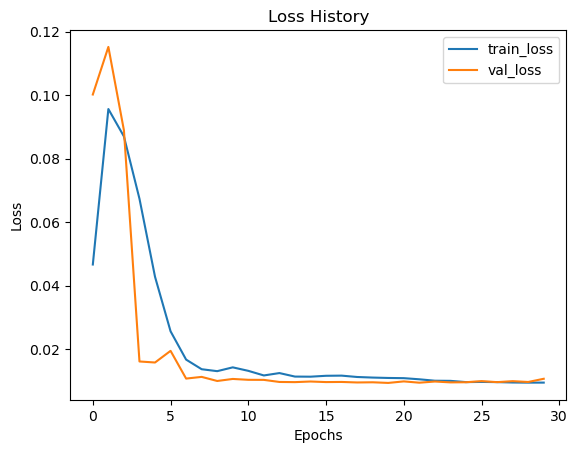

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

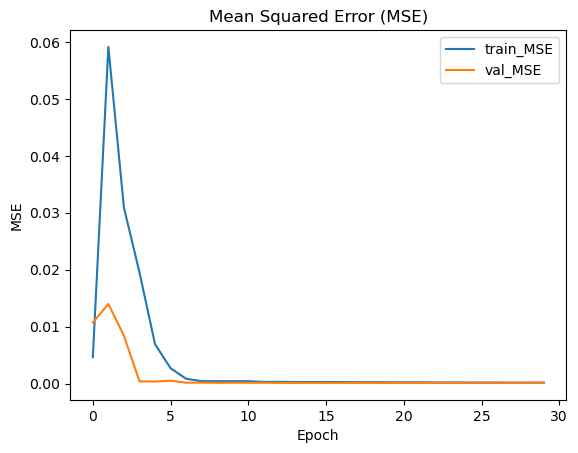

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

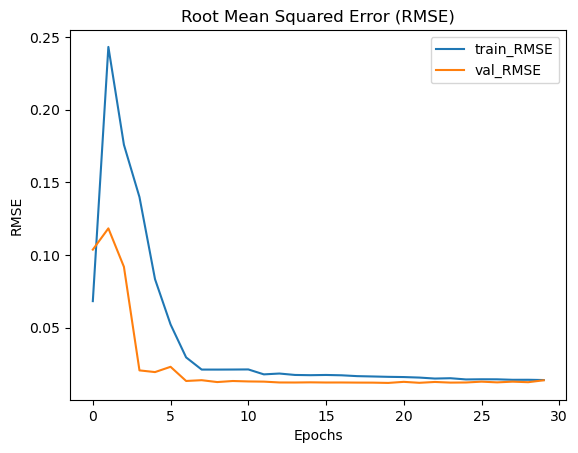

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

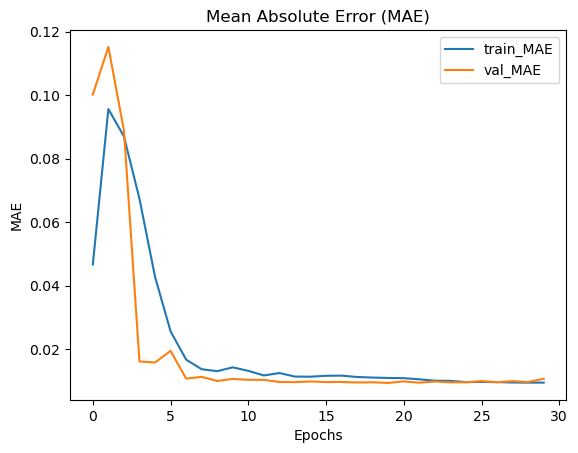

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

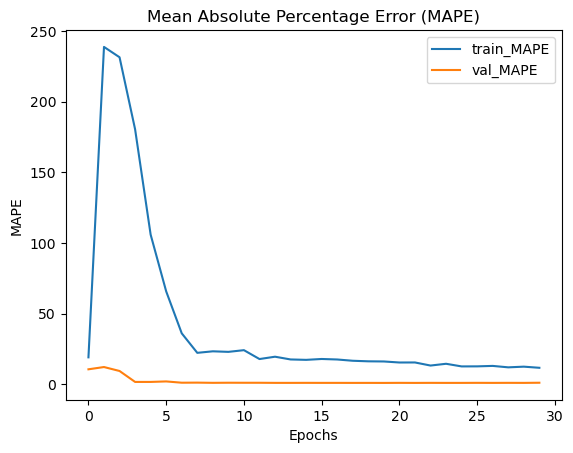

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:51:28.627310: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


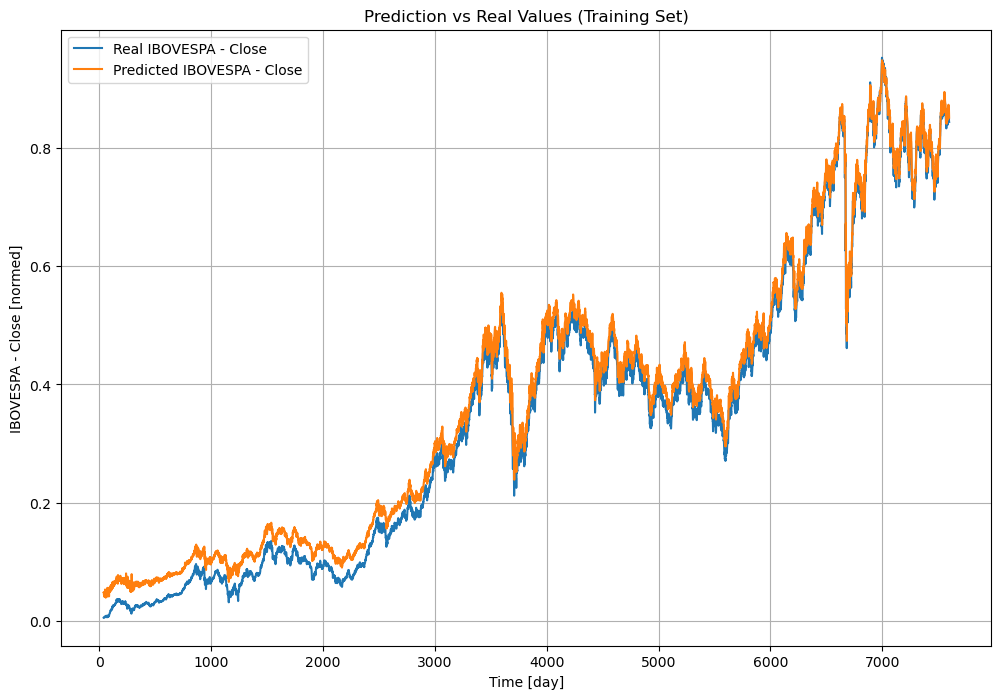

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


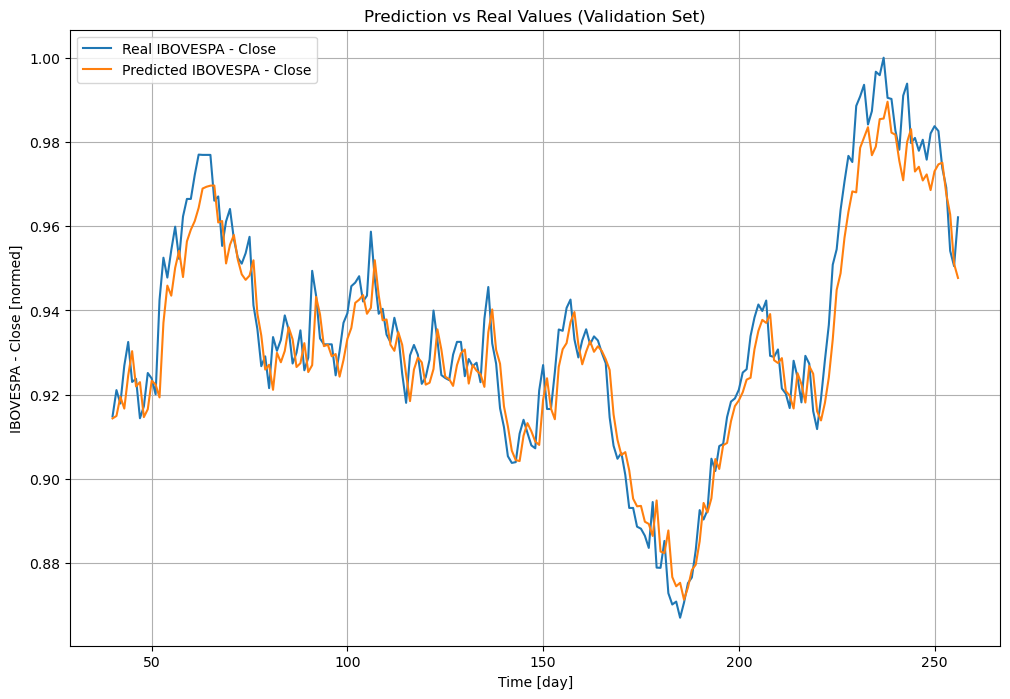

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


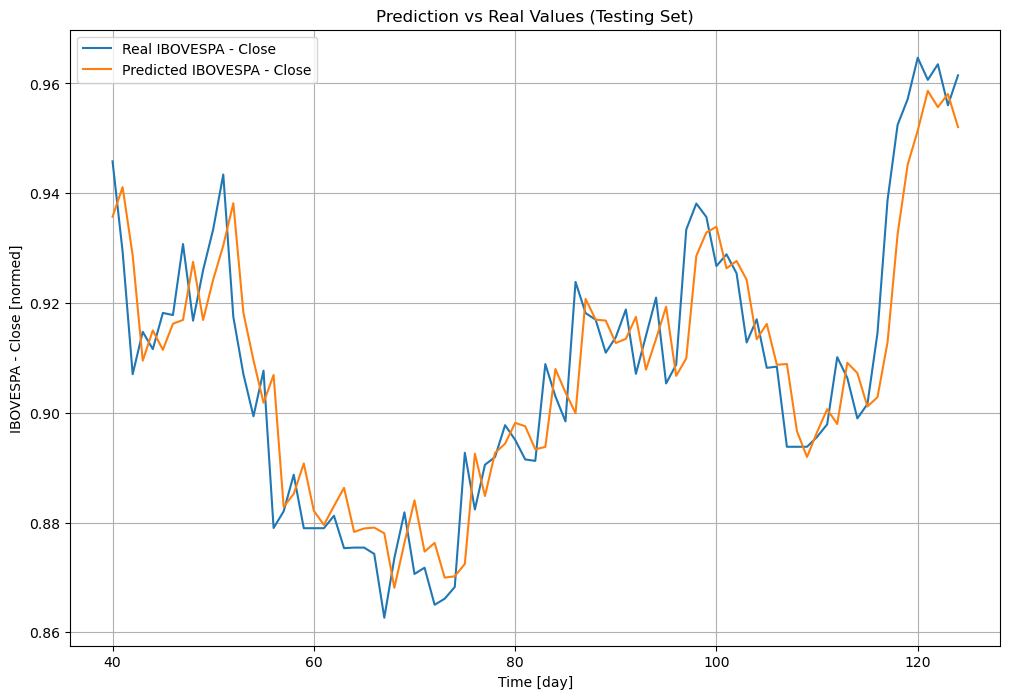

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

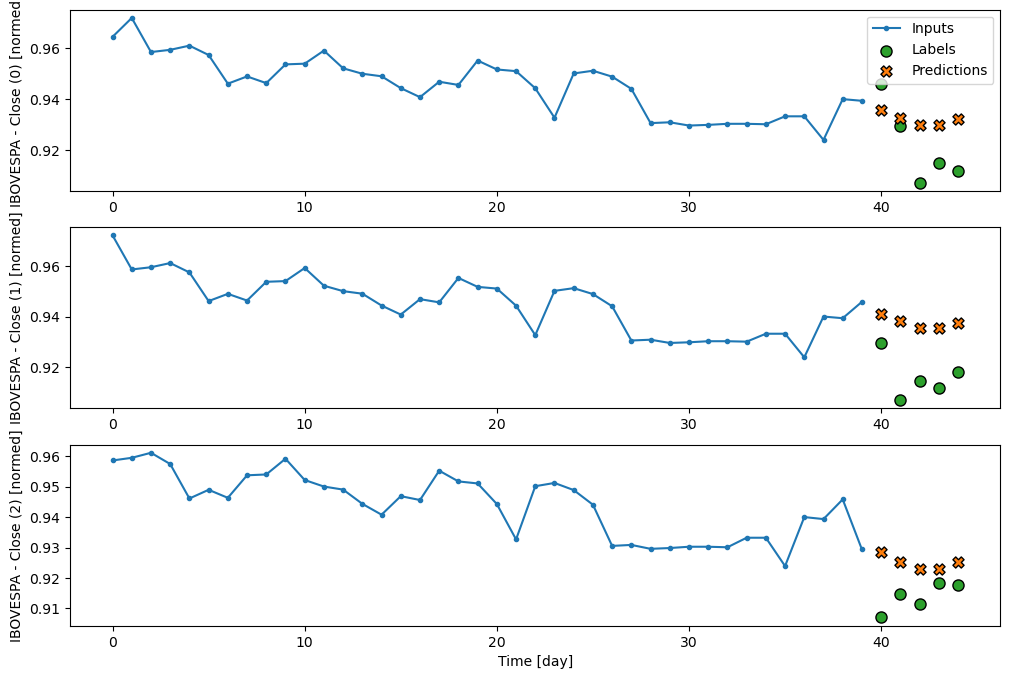

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:52s:45ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[[0.93571883, 0.93571883, 0.93571883, ..., 0.93571883,
         0.93571883, 0.93571883],
        [0.9325367 , 0.9325367 , 0.9325367 , ..., 0.9325367 ,
         0.9325367 , 0.9325367 ],
        [0.9298491 , 0.9298491 , 0.9298491 , ..., 0.9298491 ,
         0.9298491 , 0.9298491 ],
        [0.9299397 , 0.9299397 , 0.9299397 , ..., 0.9299397 ,
         0.9299397 , 0.9299397 ],
        [0.932104  , 0.932104  , 0.932104  , ..., 0.932104  ,
         0.932104  , 0.932104  ]],

       [[0.941111  , 0.941111  , 0.941111  , ..., 0.941111  ,
         0.941111  , 0.941111  ],
        [0.9381152 , 0.9381152 , 0.9381152 , ..., 0.9381152 ,
         0.9381152 , 0.9381152 ],
        [0.93552905, 0.93552905, 0.93552905, ..., 0.93552905,
         0.93552905, 0.93552905],
        [0.9354114 , 0.9354114 , 0.9354114 , ..., 0.9354114 ,
         0.9354114 , 0.9354114 ],
        [0.9376434 , 0.9376434 , 0.9376434 , ..., 0.9376434 ,
         0.9376433 , 0.9376433 ]],

       [[0.928673  , 0.928673  , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')